<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!pip install jupyterthemes --q

# Basic Library Imports

In [91]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import shapiro,normaltest,pearsonr,chi2_contingency,spearmanr,f_oneway,yeojohnson
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [92]:
from jupyterthemes import jtplot
jtplot.style(theme = 'grade3', context = 'notebook', ticks = True, grid = True)

In [93]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [94]:
data.rename(columns={column:column.strip() for column in data.columns},inplace=True)

### Variable Descriptions
#### Format: variable (type) - description

* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

* measles (Ratio) - number of reported Measles cases per 1000 population

* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

* gdp (Ratio) - Gross Domestic Product per capita

* population (Ratio) - population of a country

* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling (Ratio) - average number of years of schooling of a population - ICOR measures how good a country is at utilizing its resources.

# 1) Basic Analysis

In [95]:
data.sample(5)

Country  Year      Status  Life expectancy  \
1401                Kuwait  2008  Developing             73.8   
2550  Syrian Arab Republic  2002  Developing             72.8   
790                Ecuador  2011  Developing             75.3   
469               Cambodia  2010  Developing             66.6   
1618                  Mali  2015  Developing             58.2   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
1401             88.0              1     0.03             2078.392748   
2550            135.0              9     1.25               91.703568   
790             131.0              7     3.99              344.741216   
469             192.0             14     2.20               56.884165   
1618            266.0             52      NaN                0.000000   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
1401         99.0        0  67.5                  1   99.0               1.93   
2550          8.0      538  45.3                 11   86.0               4.94   
790          88.0      257  51.4                  8   85.0               5.92   
469          89.0     1156  16.4                 16   88.0               5.95   
1618         64.0      215  23.8                 84   66.0                NaN   

      Diphtheria  HIV/AIDS           GDP  Population  thinness  1-19 years  \
1401        99.0       0.1  55571.998600         NaN                   3.3   
2550        84.0       0.1   1263.134550    178791.0                   6.6   
790         88.0       0.1   5223.351763  15177355.0                   1.3   
469         89.0       0.5    785.692884    143874.0                  11.0   
1618        64.0       1.5    729.725338   1746795.0                   7.7   

      thinness 5-9 years  Income composition of resources  Schooling  
1401                 3.1                            0.787       13.8  
2550                 6.5                            0.596       10.2  
790                  1.2                            0.710       13.2  
469                 11.3                            0.519       10.6  
1618                 7.5                            0.438        8.4

In [96]:
data.shape

(2938, 22)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [98]:
data.isna().sum()/data.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [99]:
data.describe().T \
.style \
.background_gradient(cmap='Oranges', axis=0)

## 1.1) Observations
  - Null values
  - Multicolinearity


# EDA

In [100]:
numericalFeatures = [column for column in data.columns if (data[column].dtype == int or data[column].dtype == float) and (column != 'Year')]
categoricalFeatures = [column for column in data.columns if column not in numericalFeatures]

## Univariant Analysis

### Shapiro-wilk Test
**for Normality Test of Numeric Features**

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

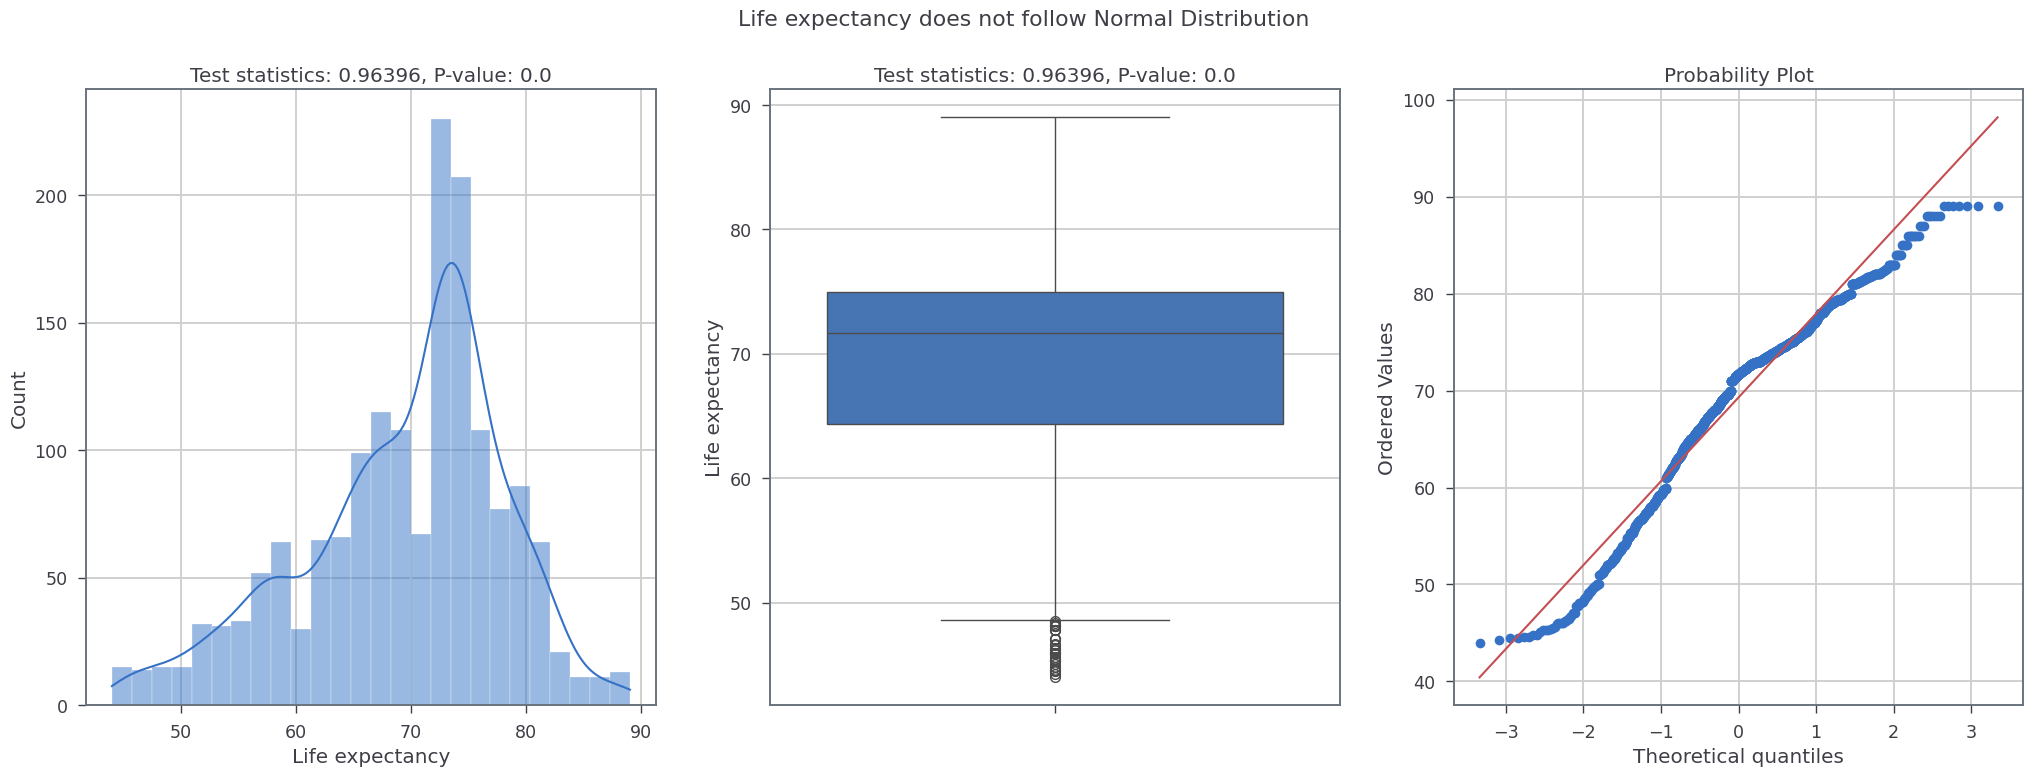

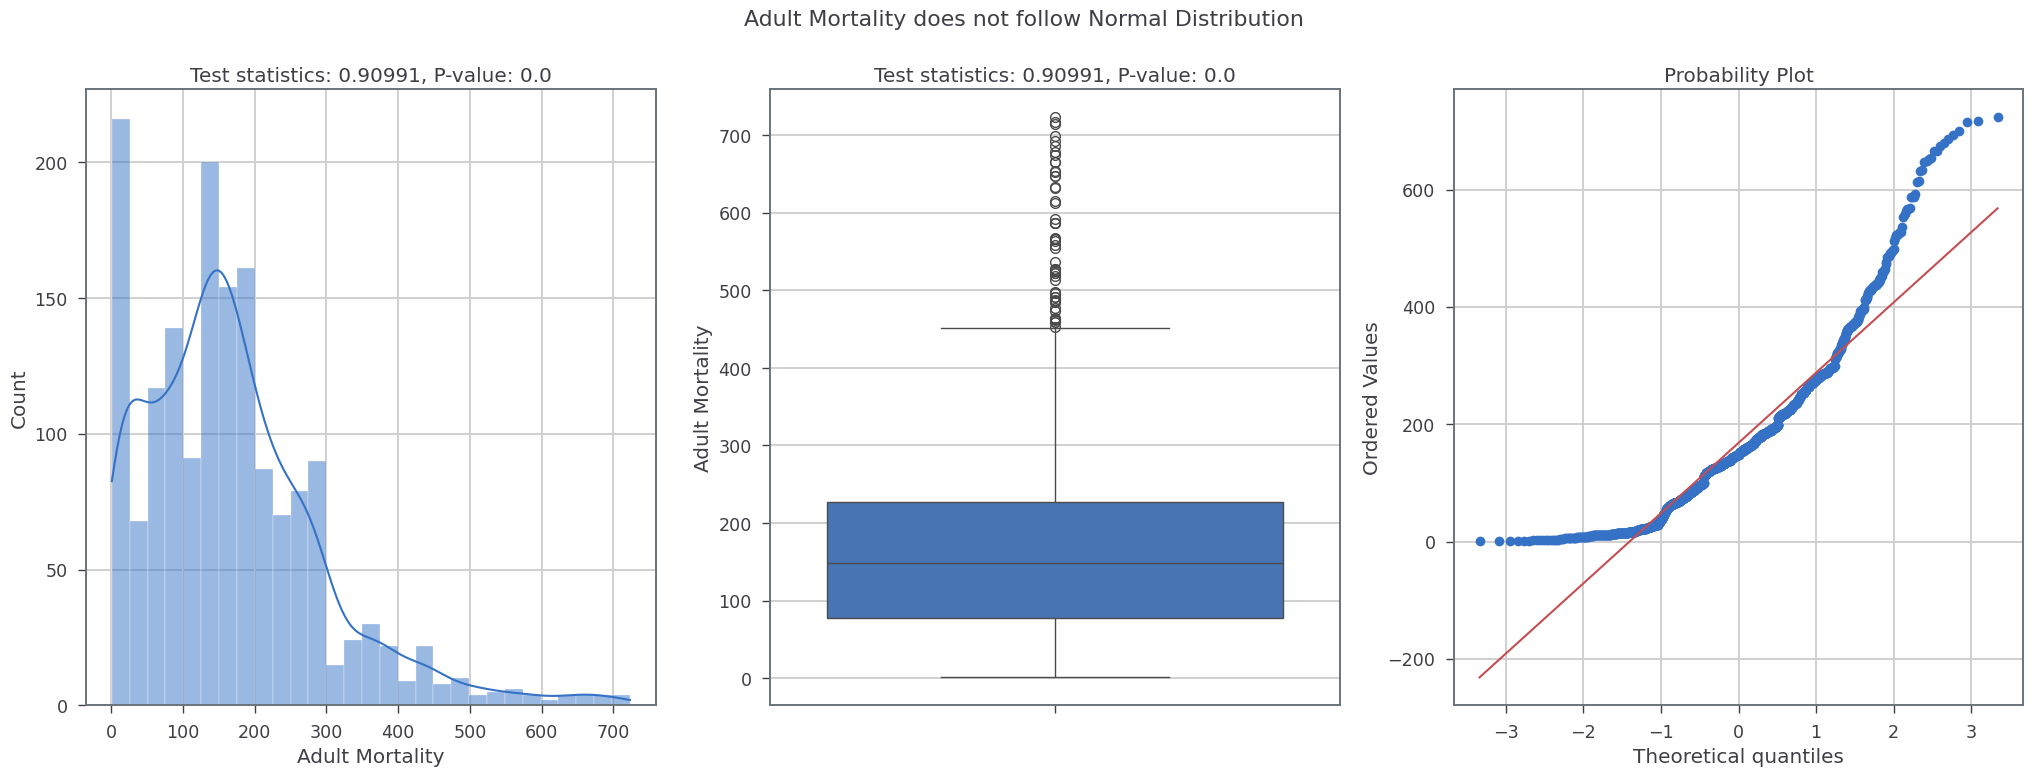

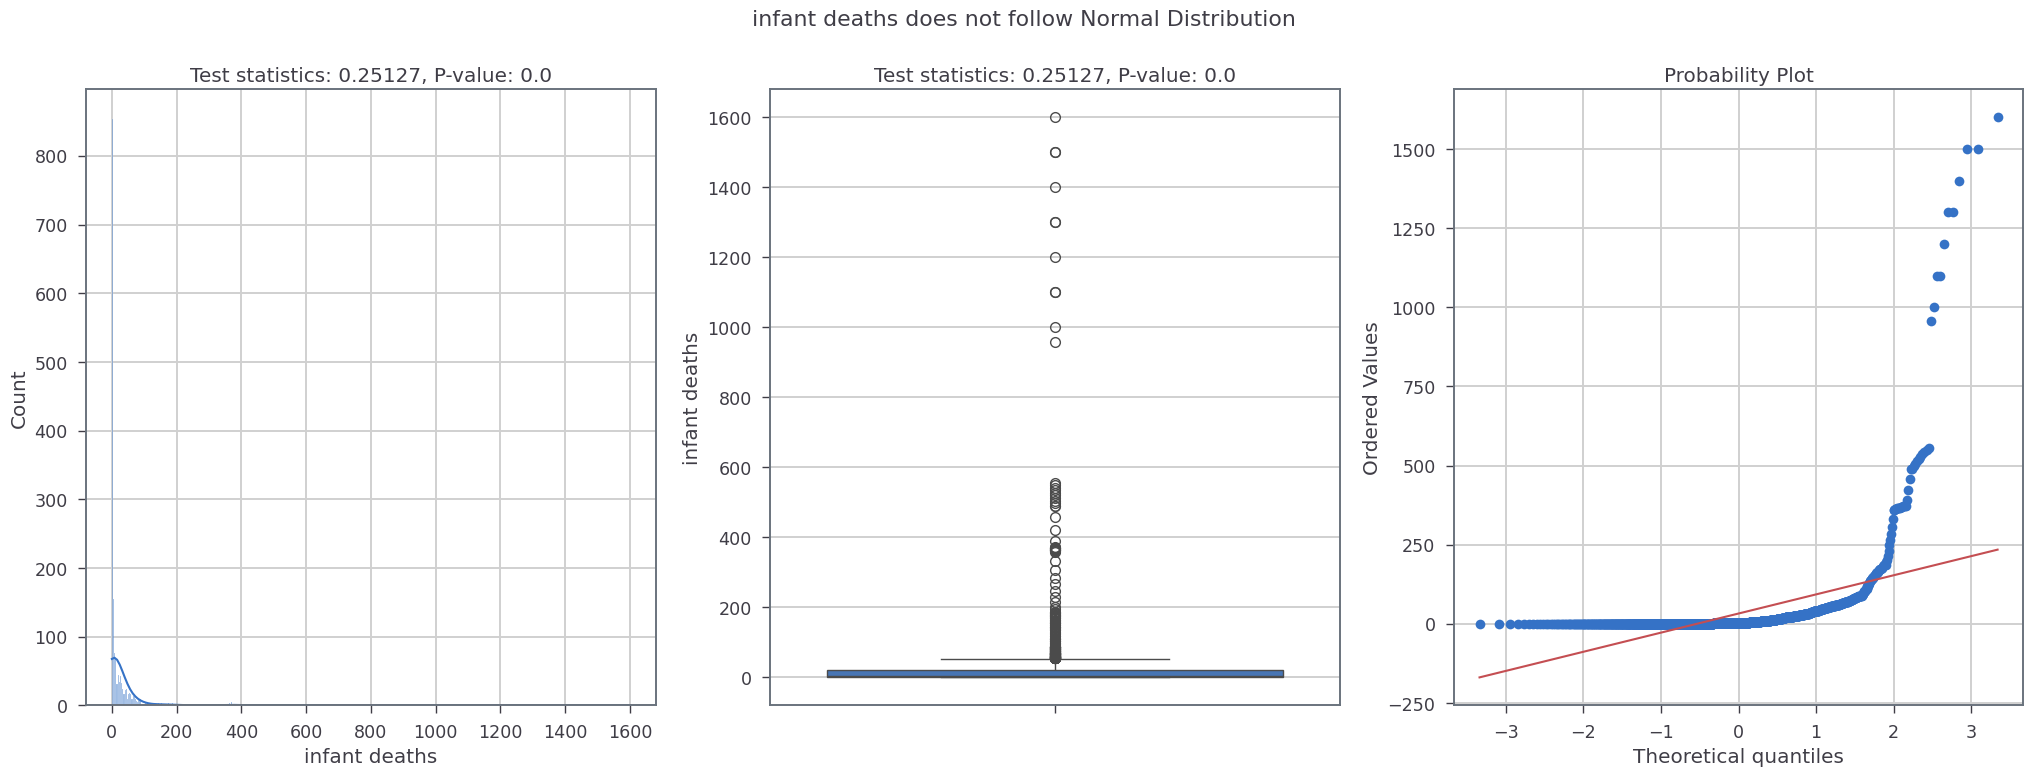

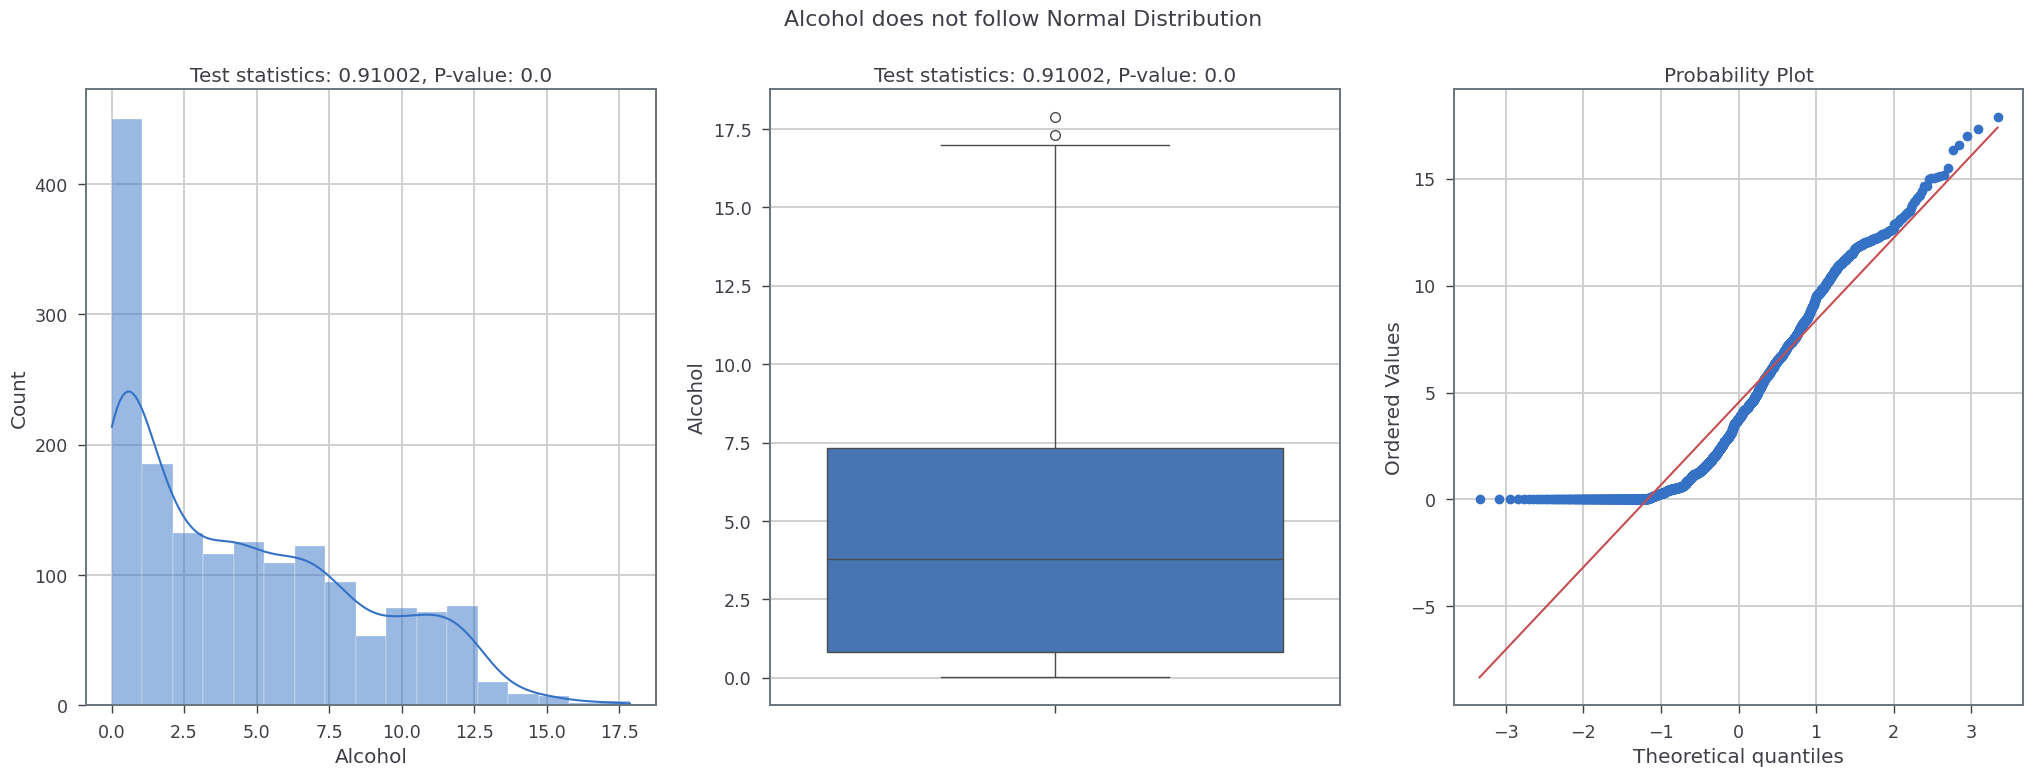

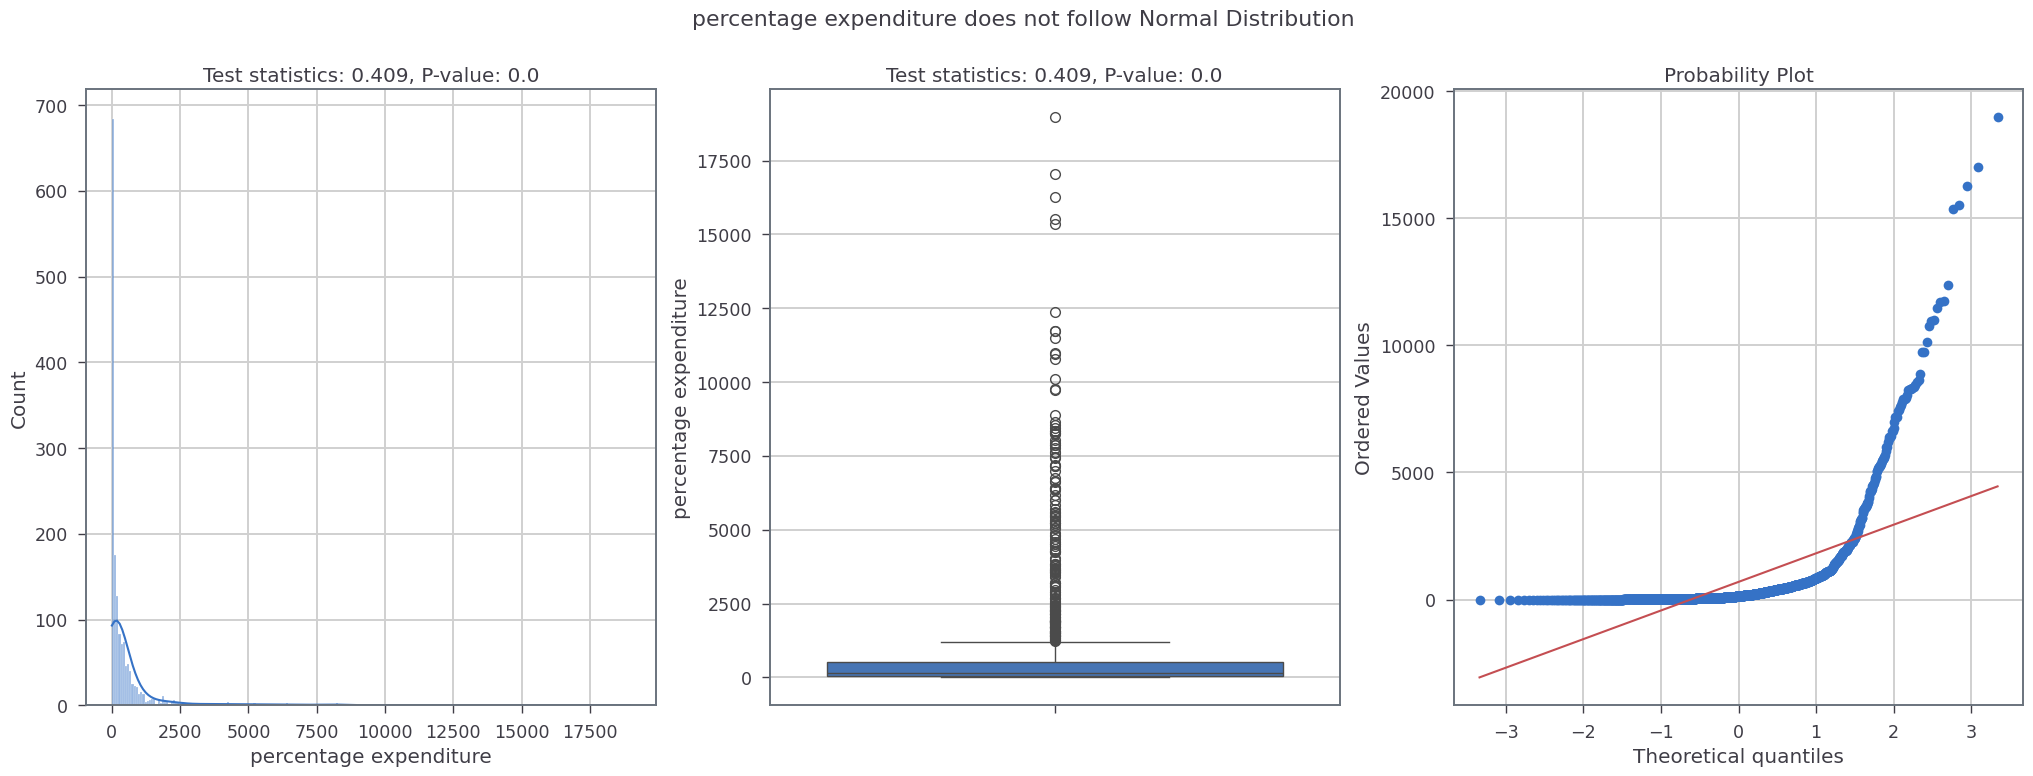

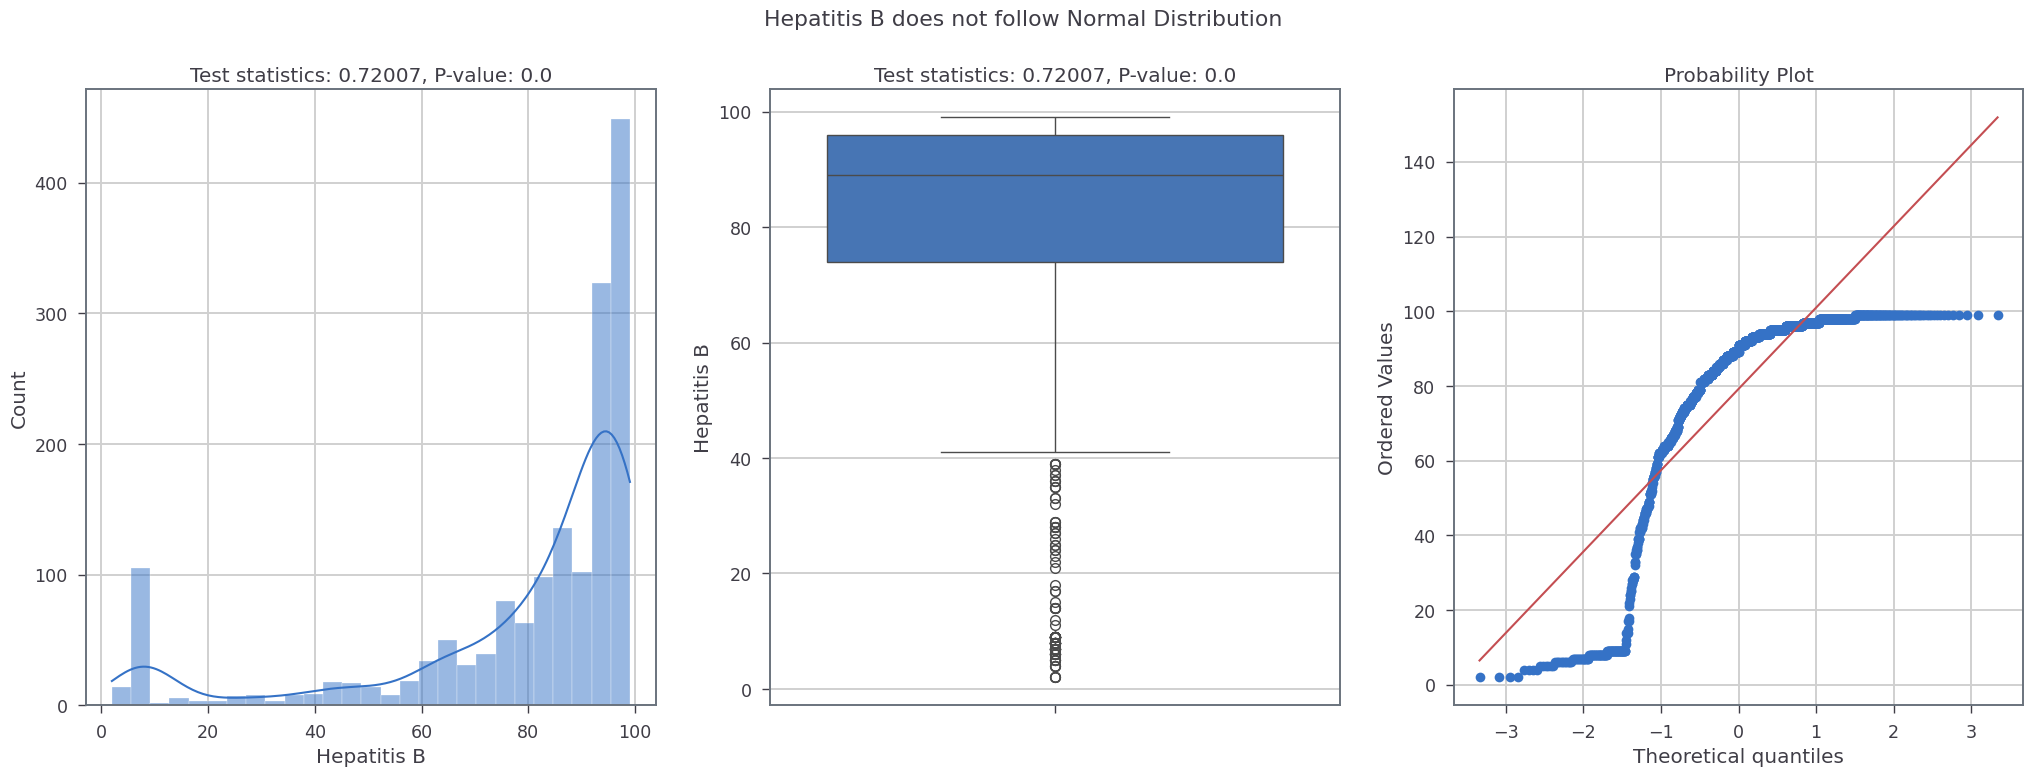

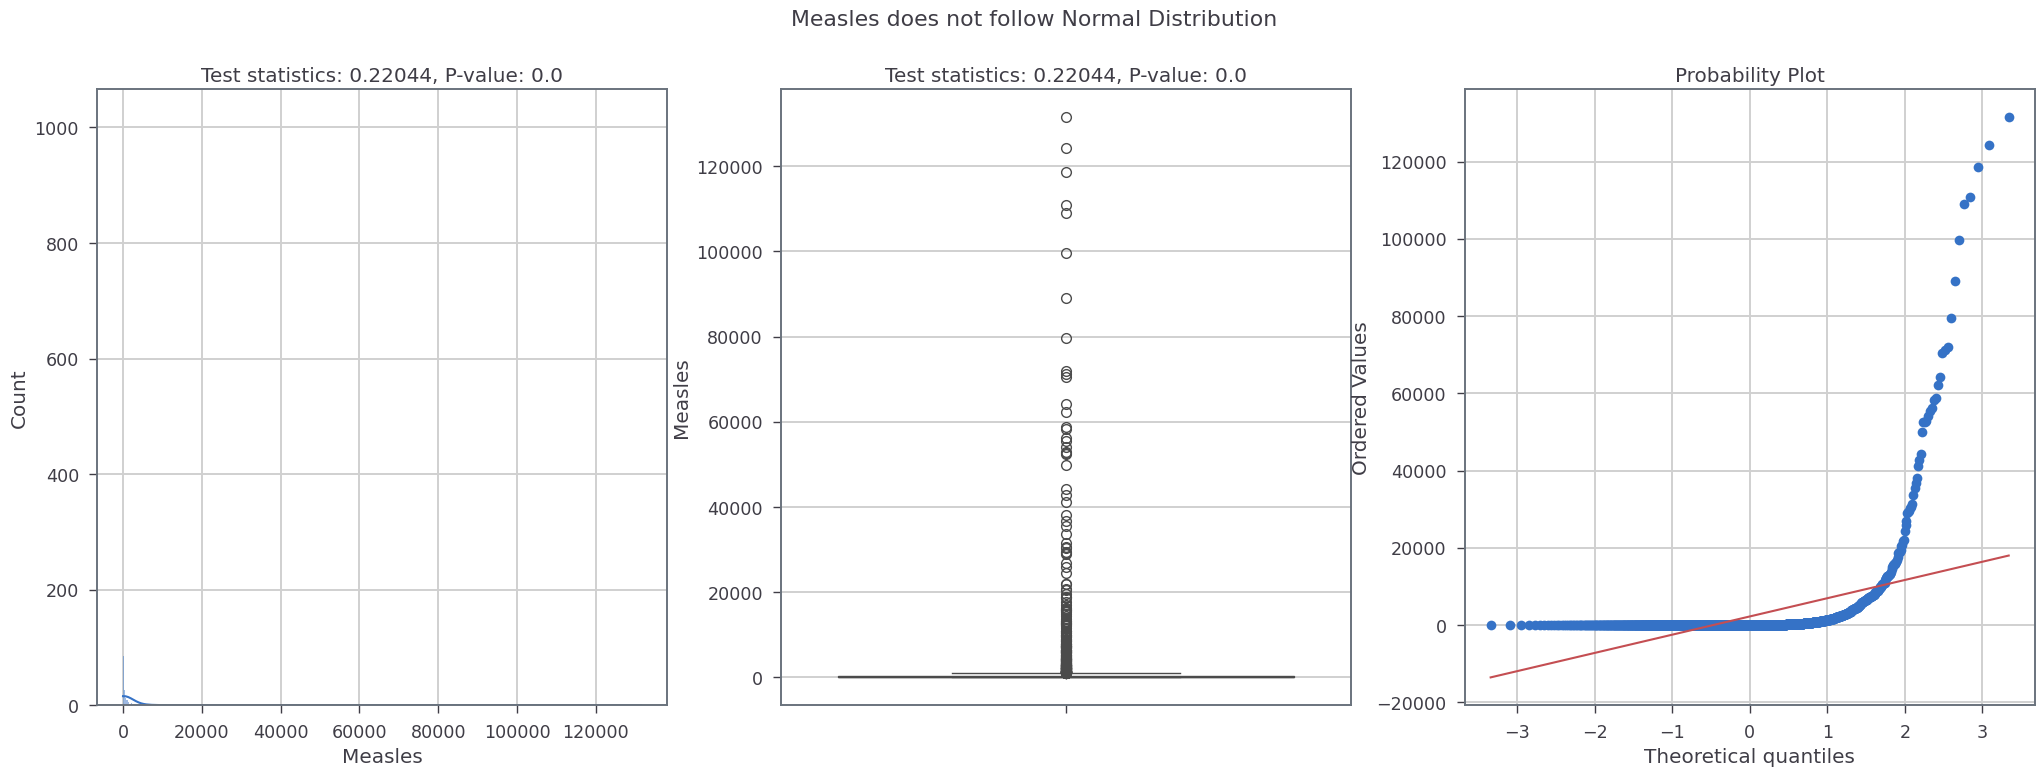

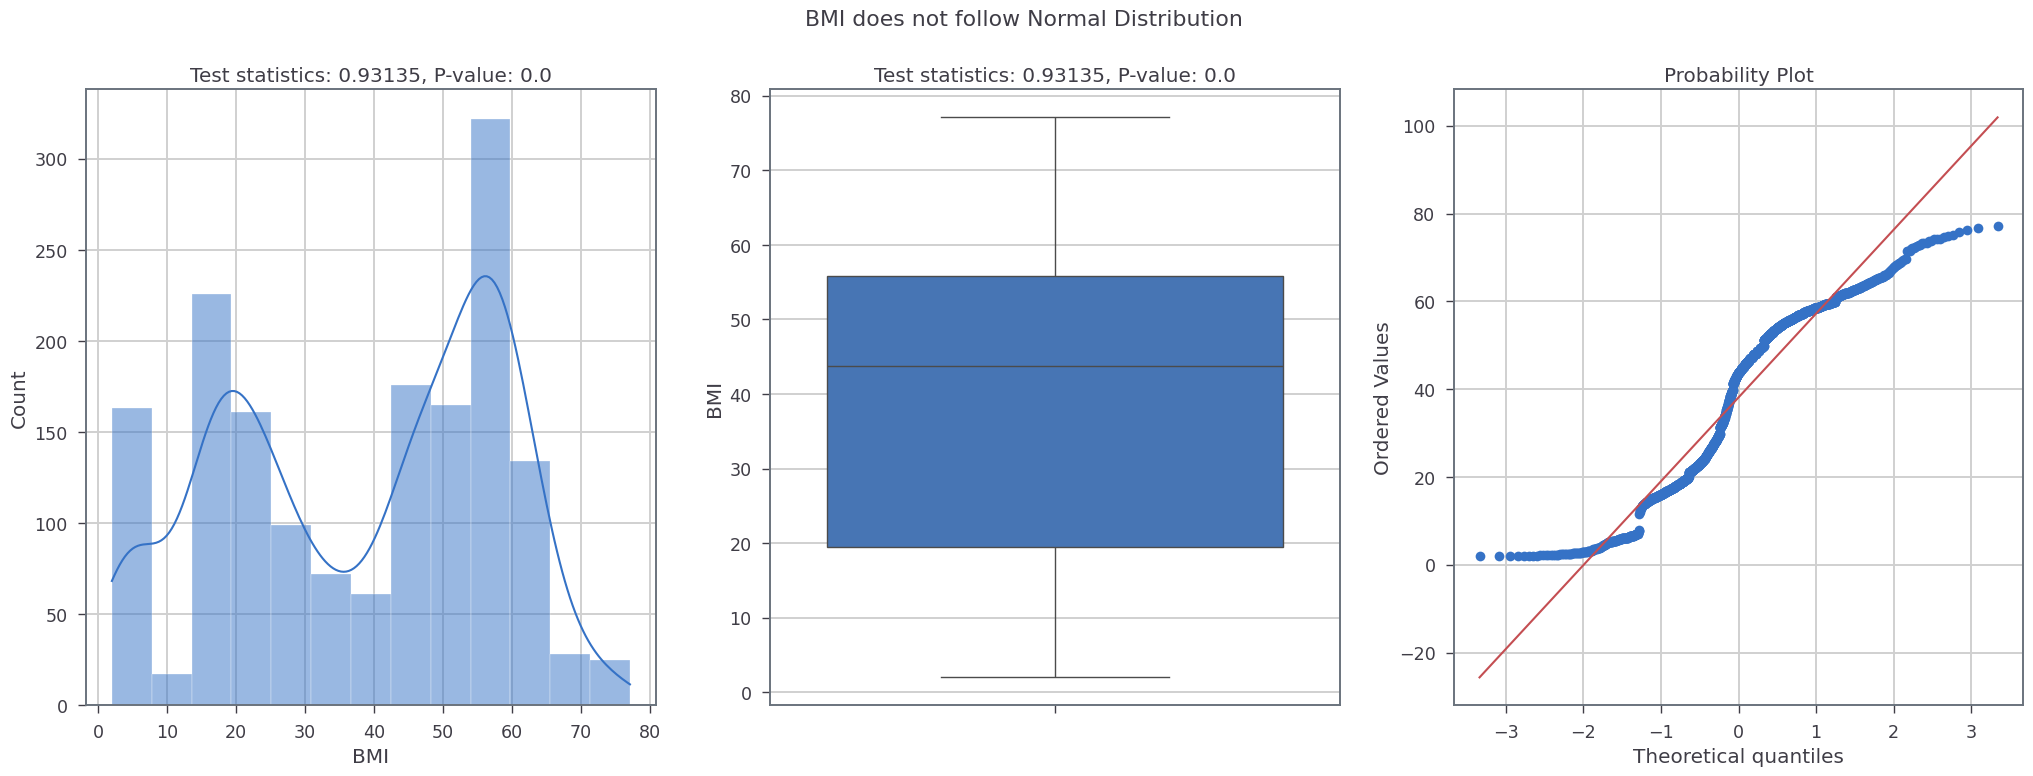

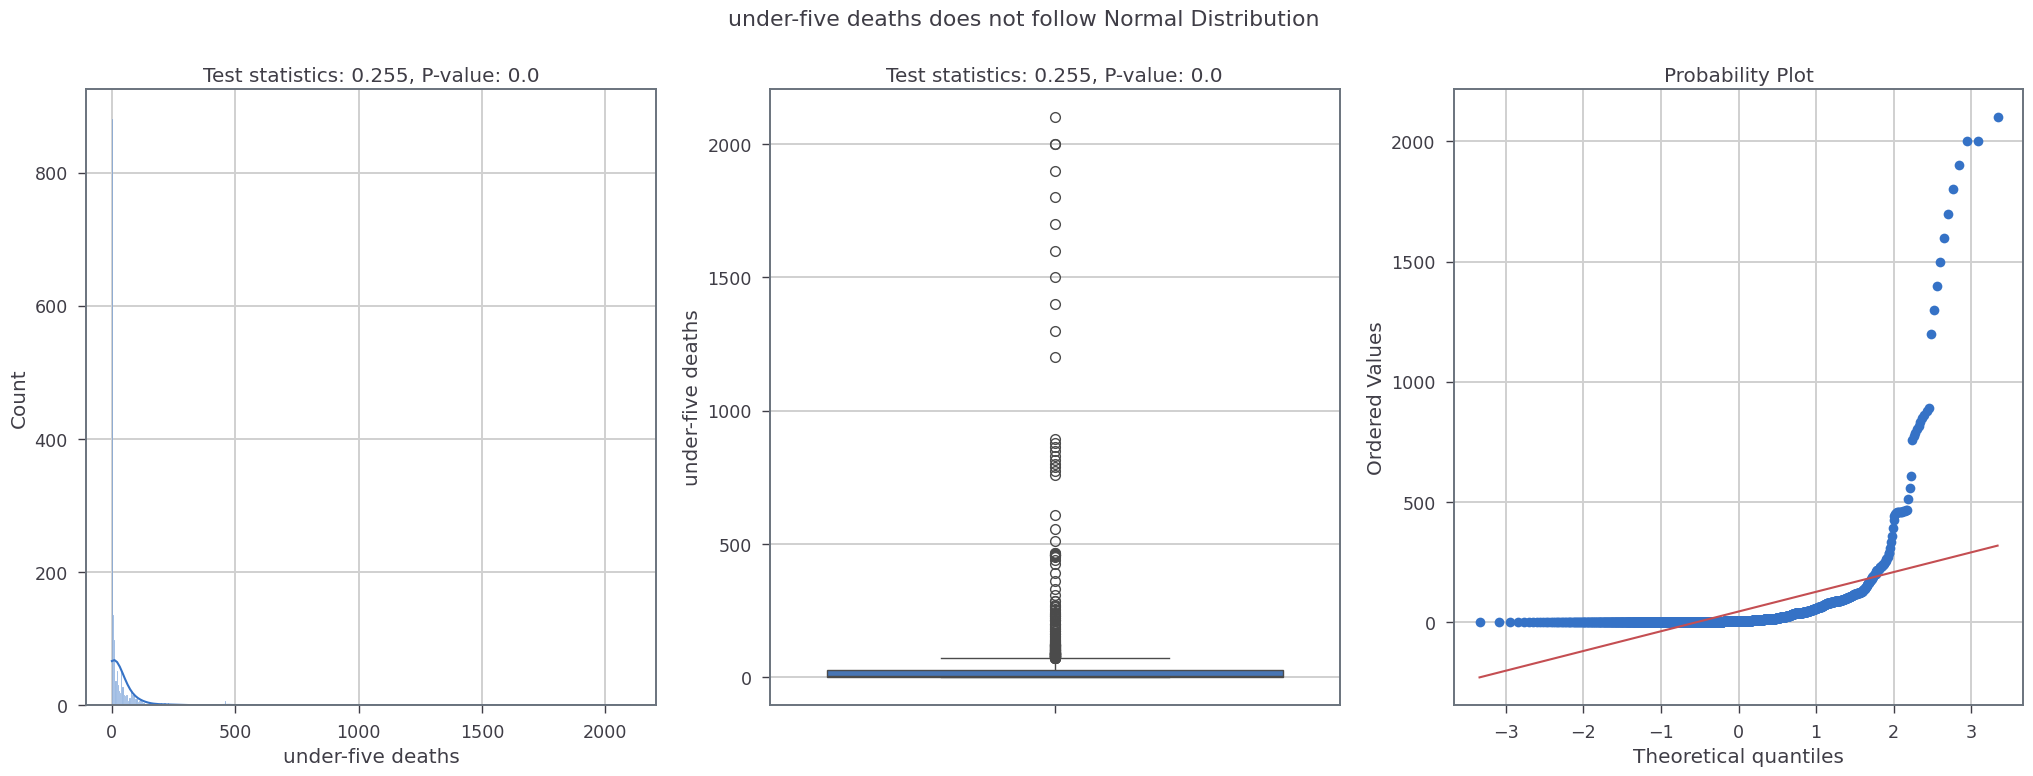

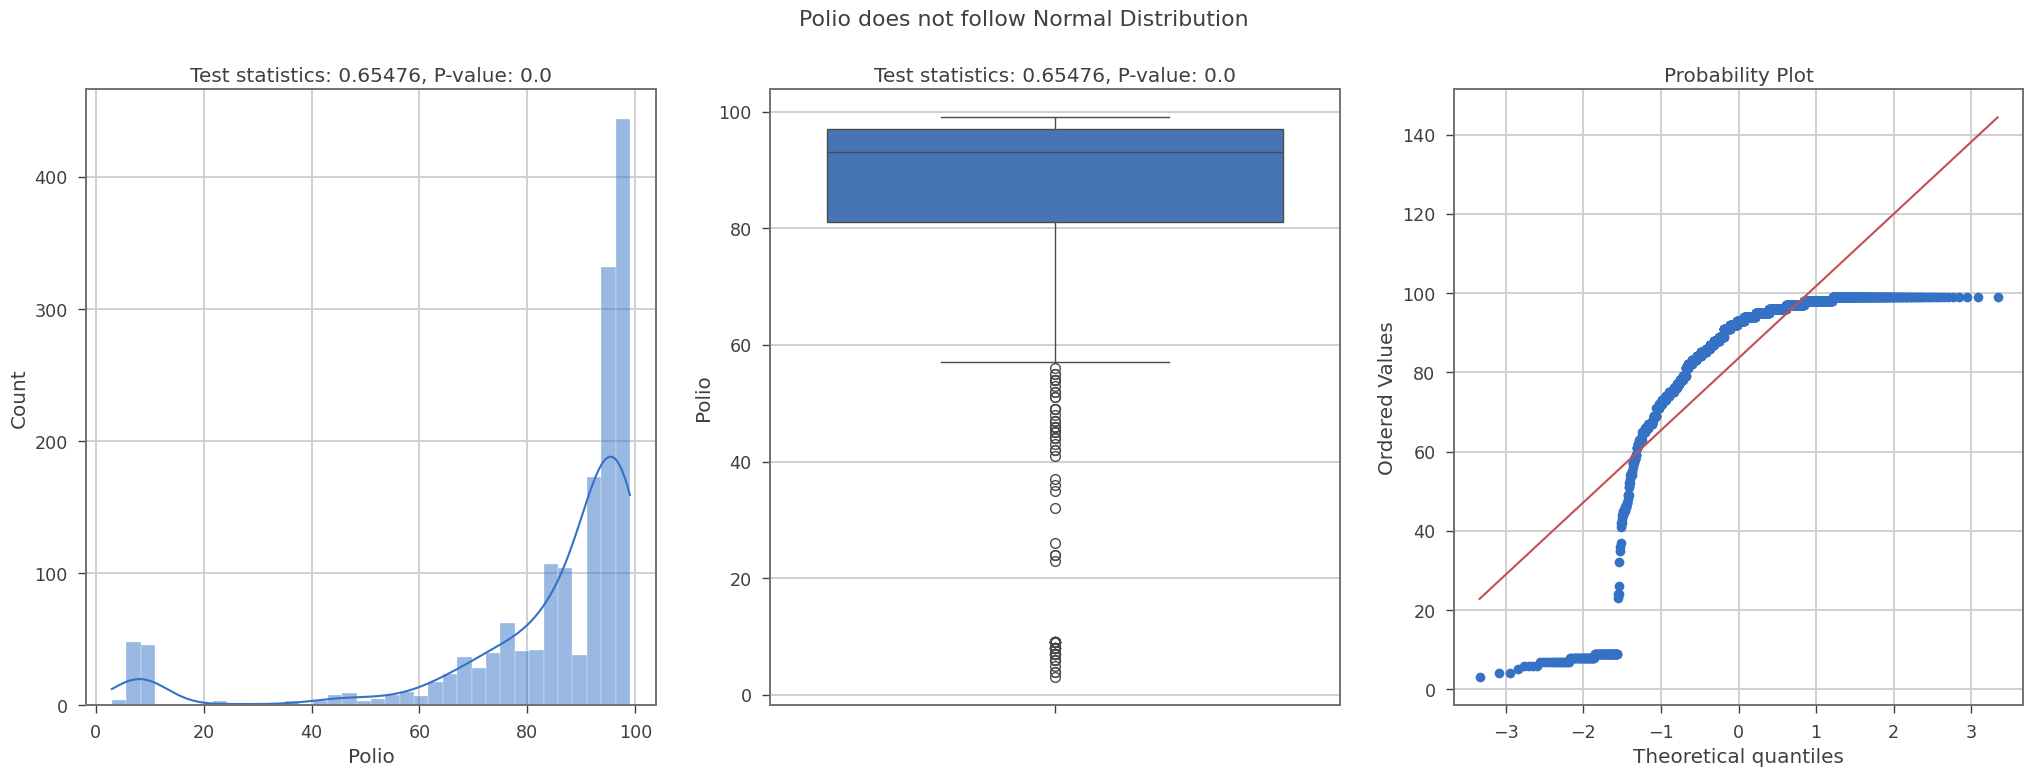

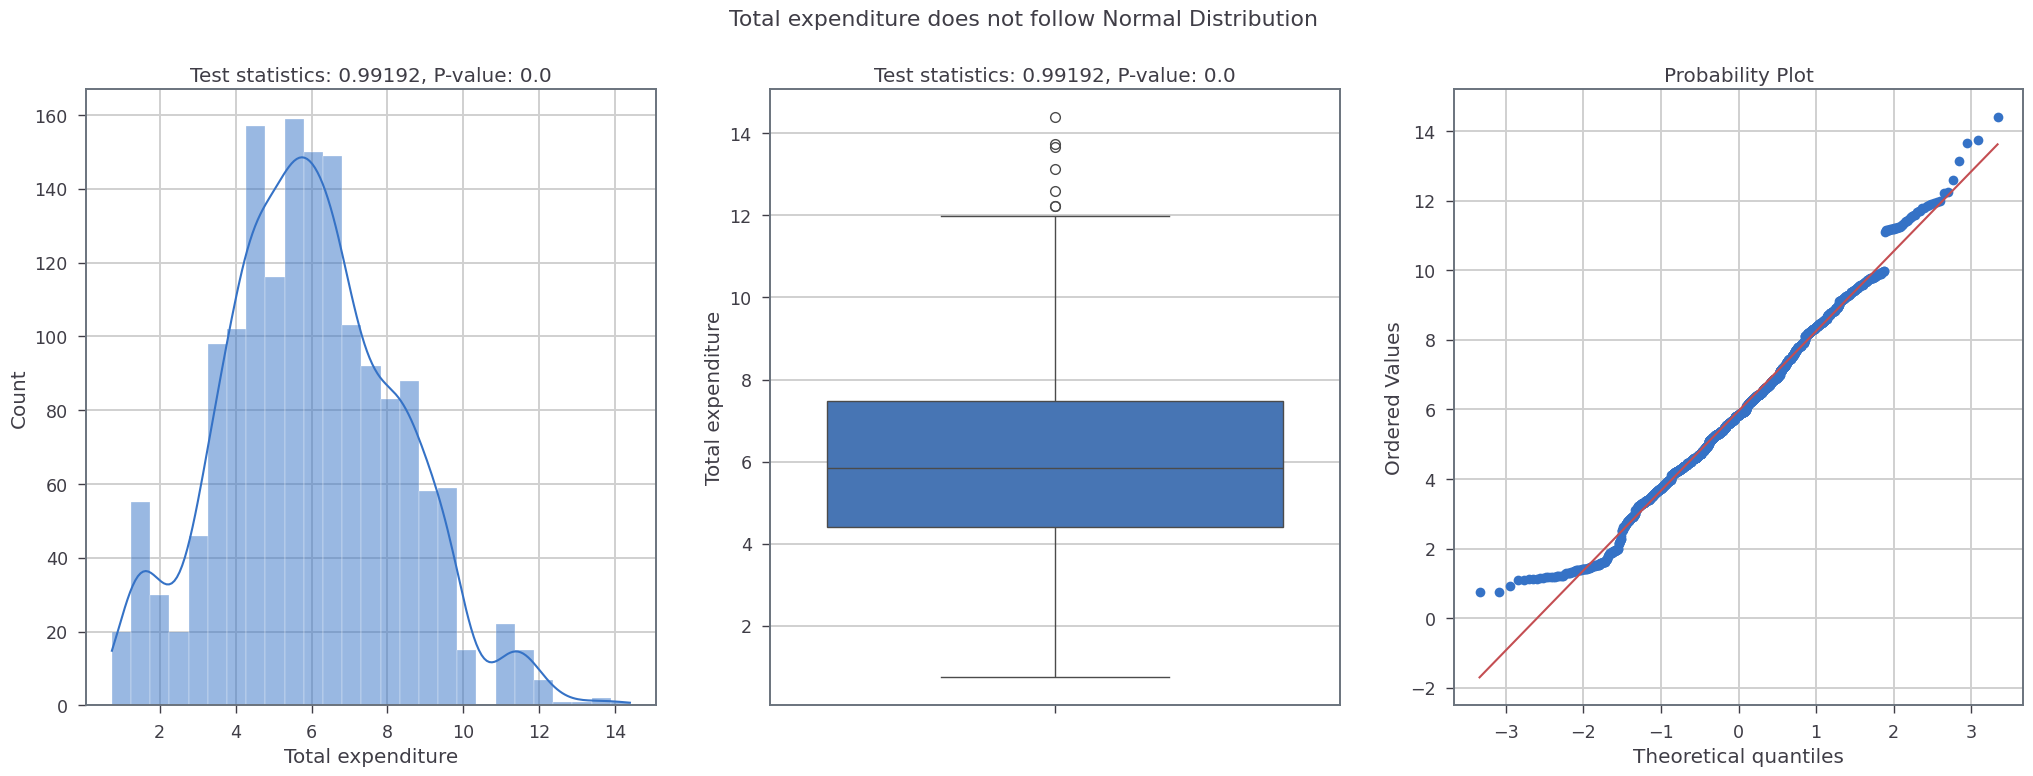

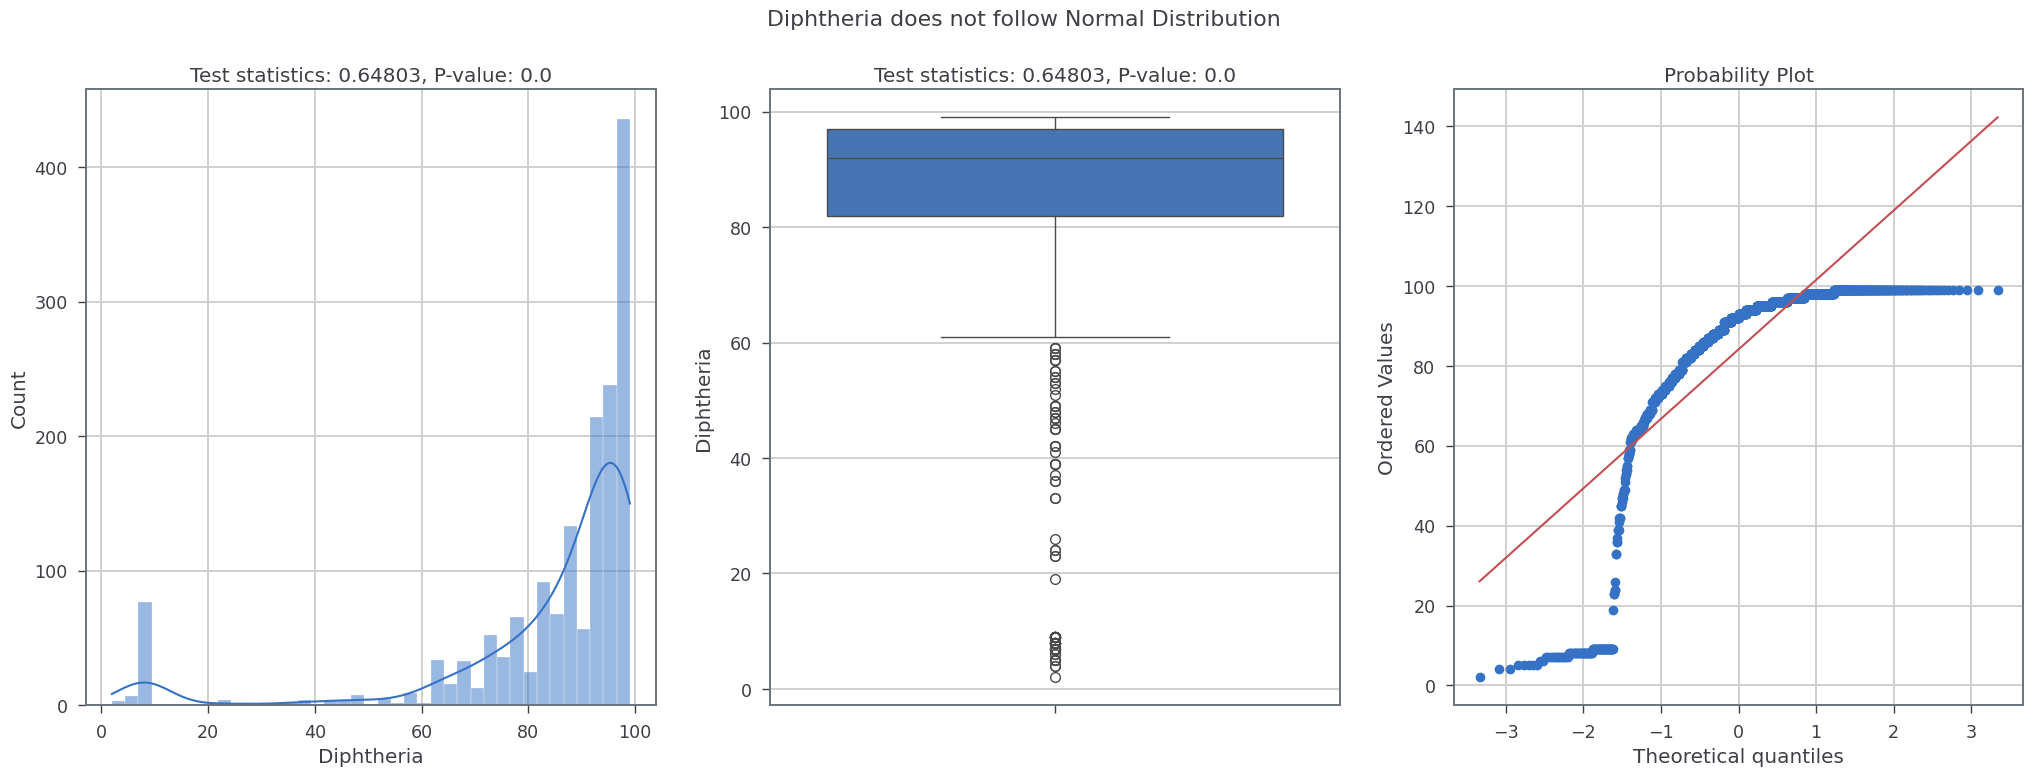

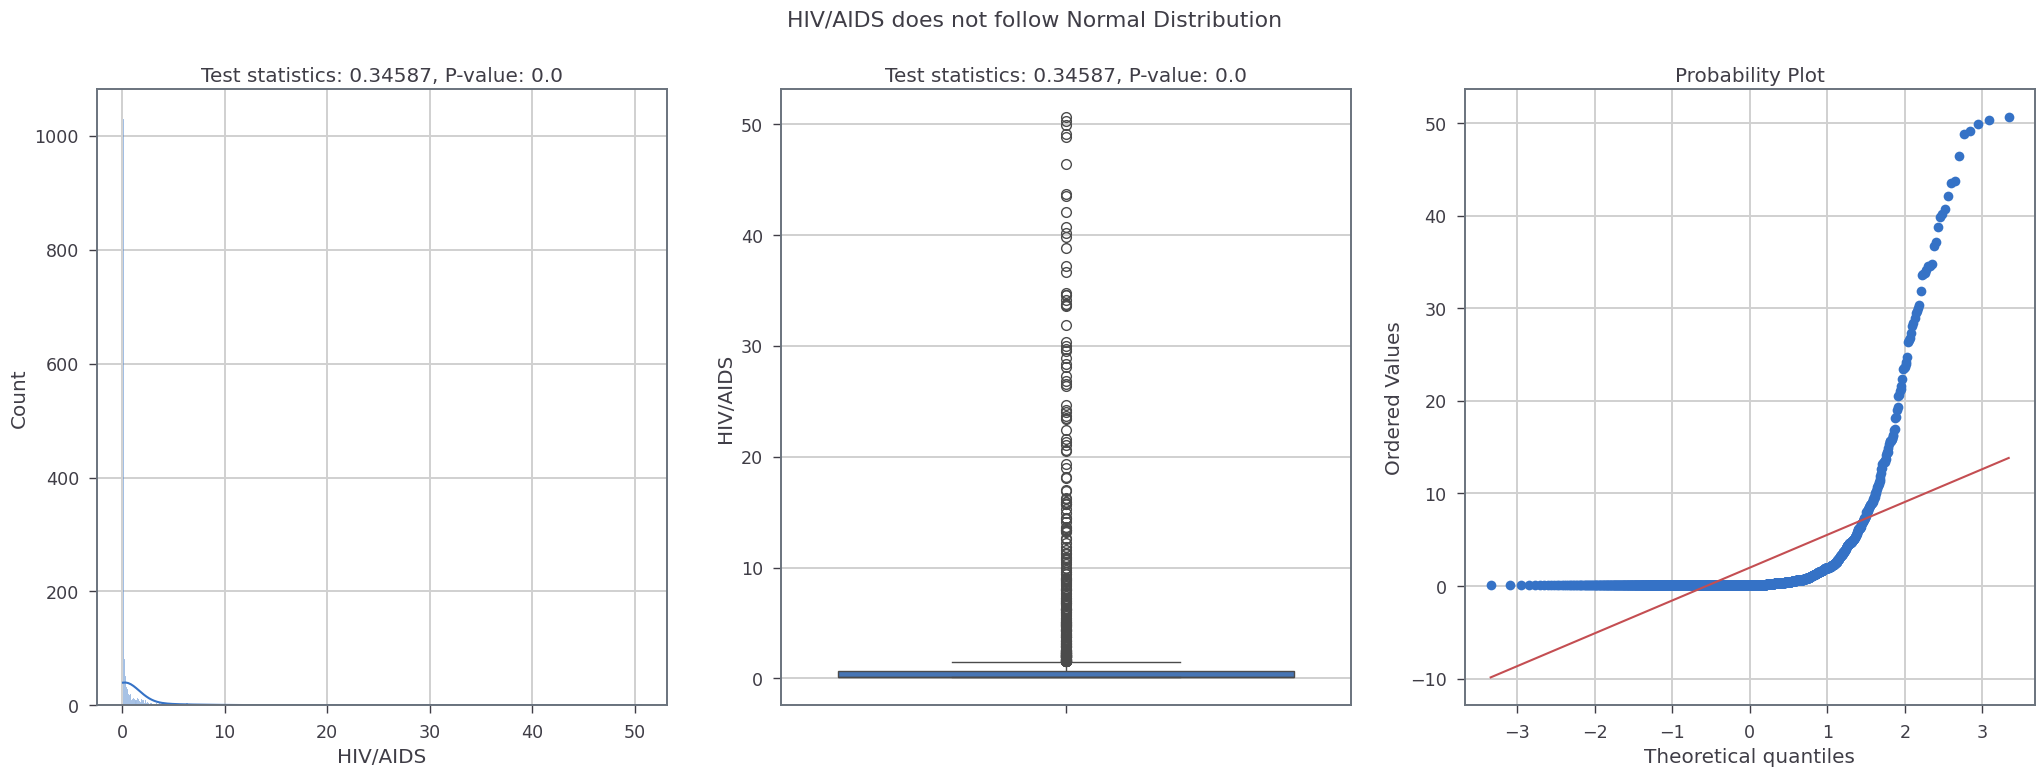

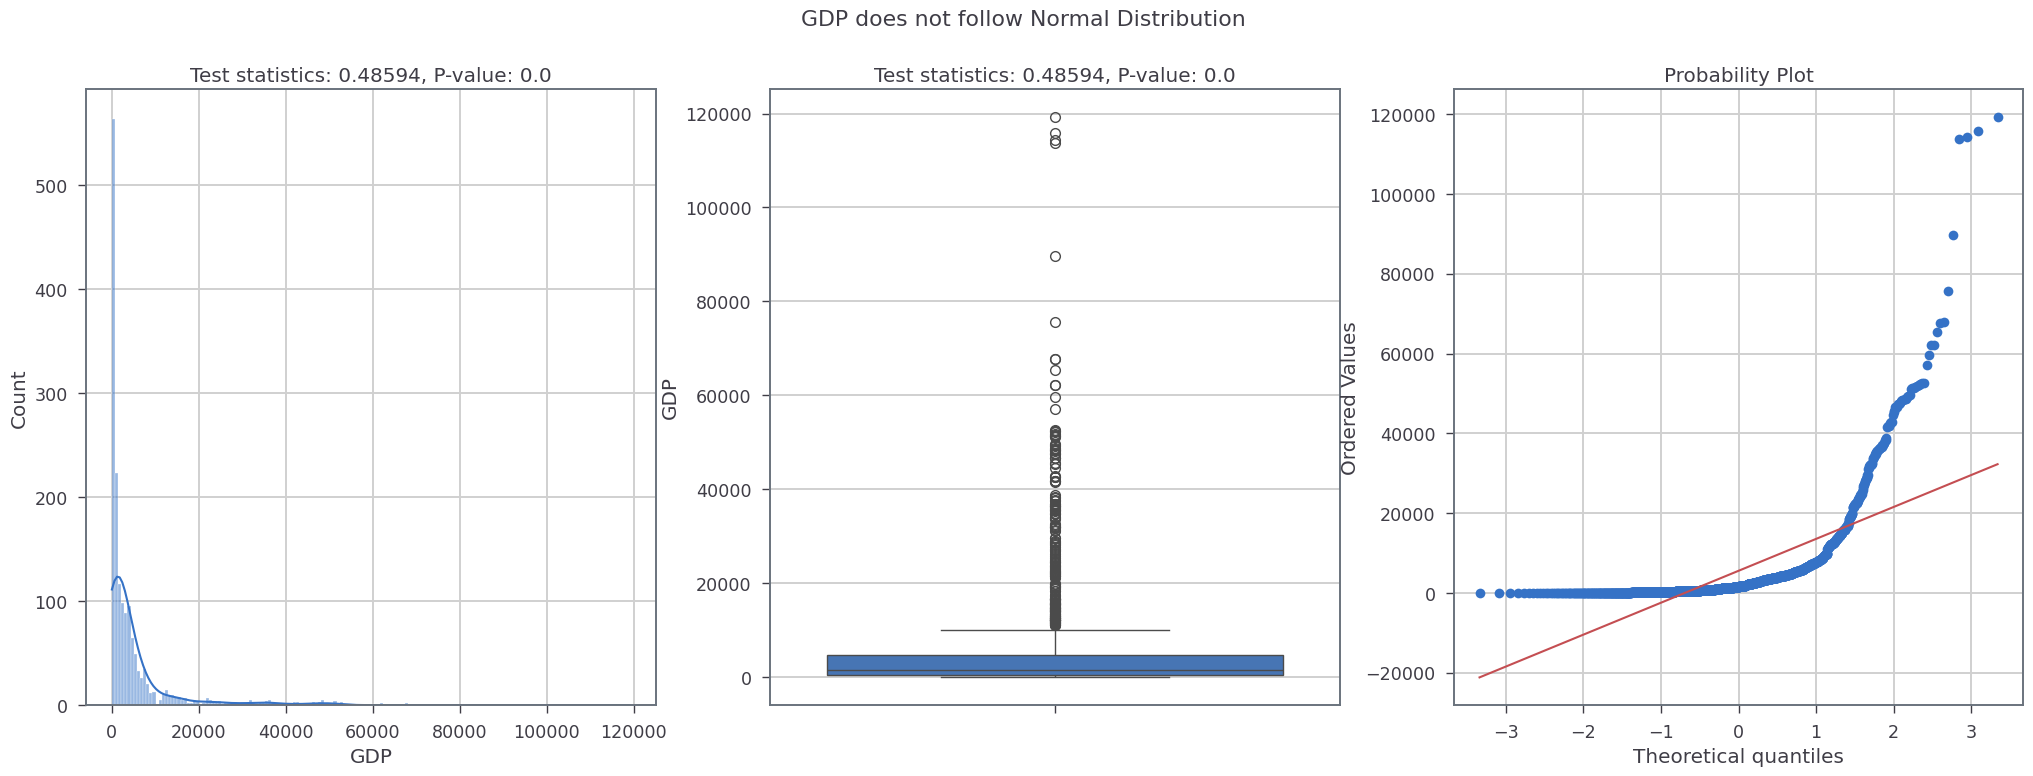

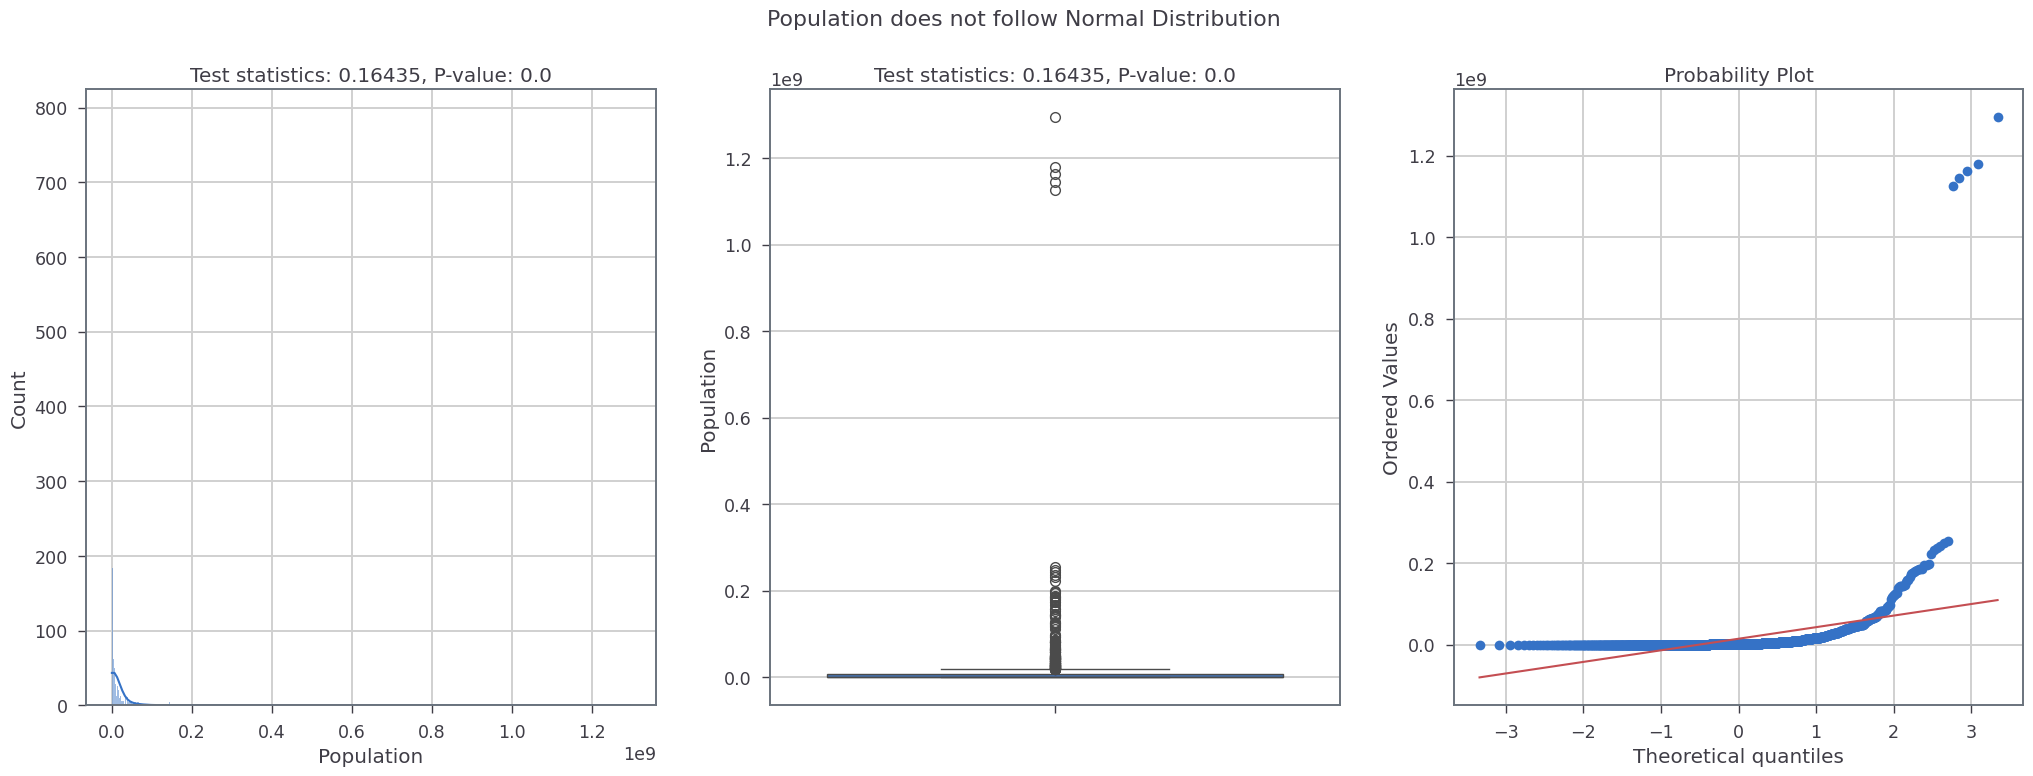

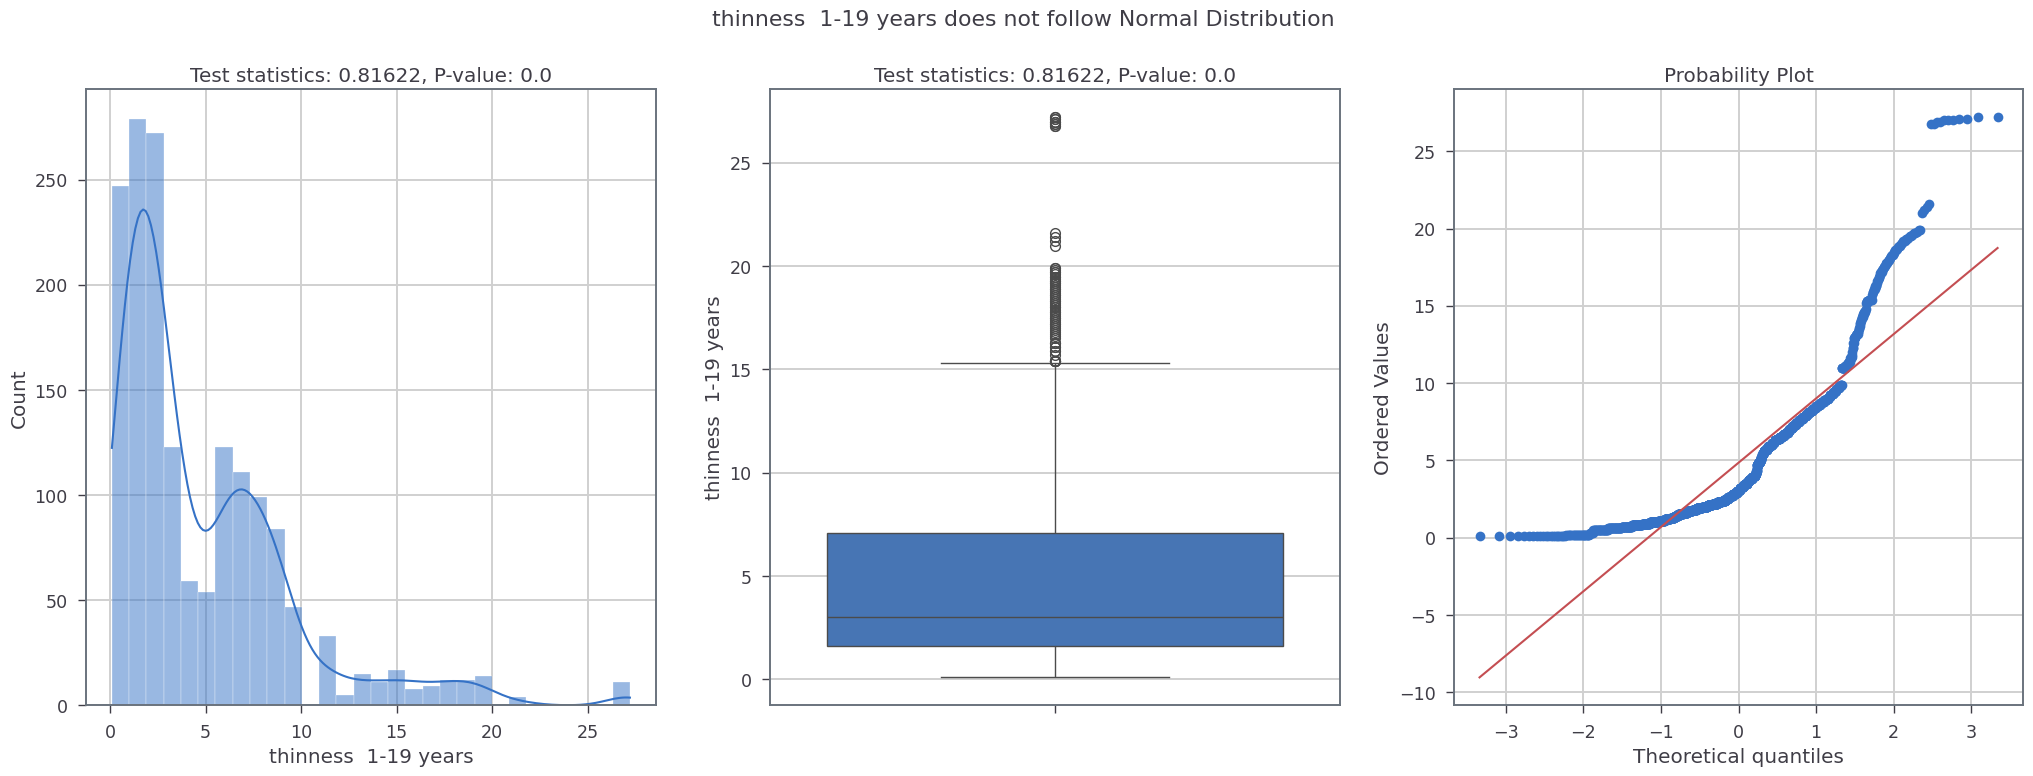

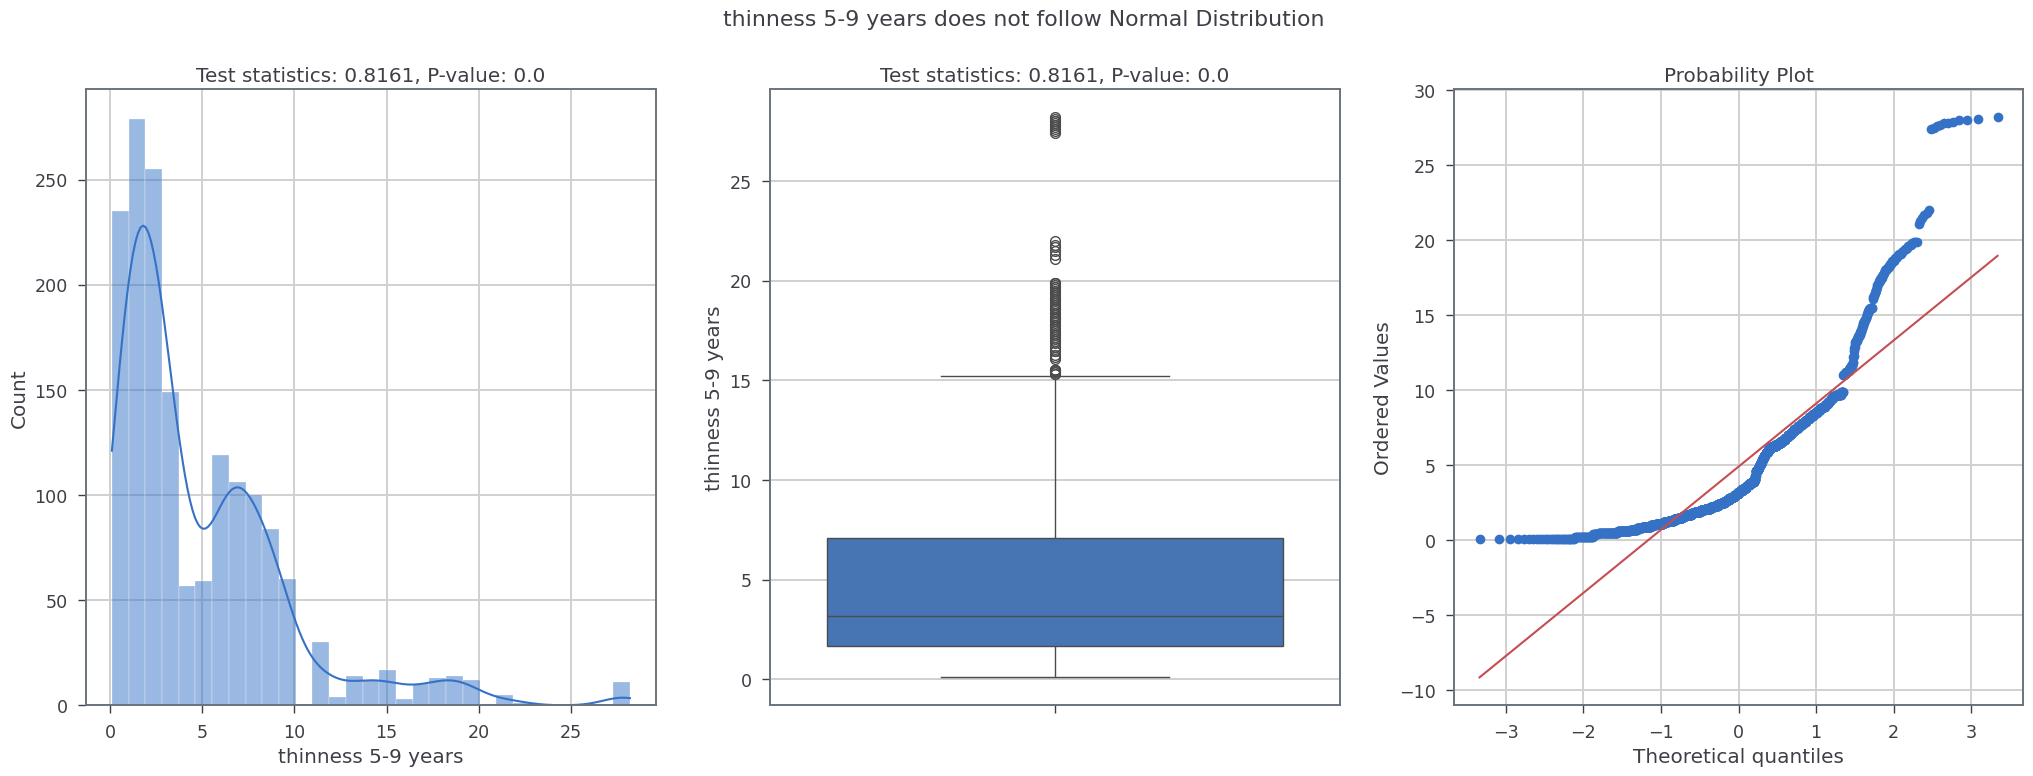

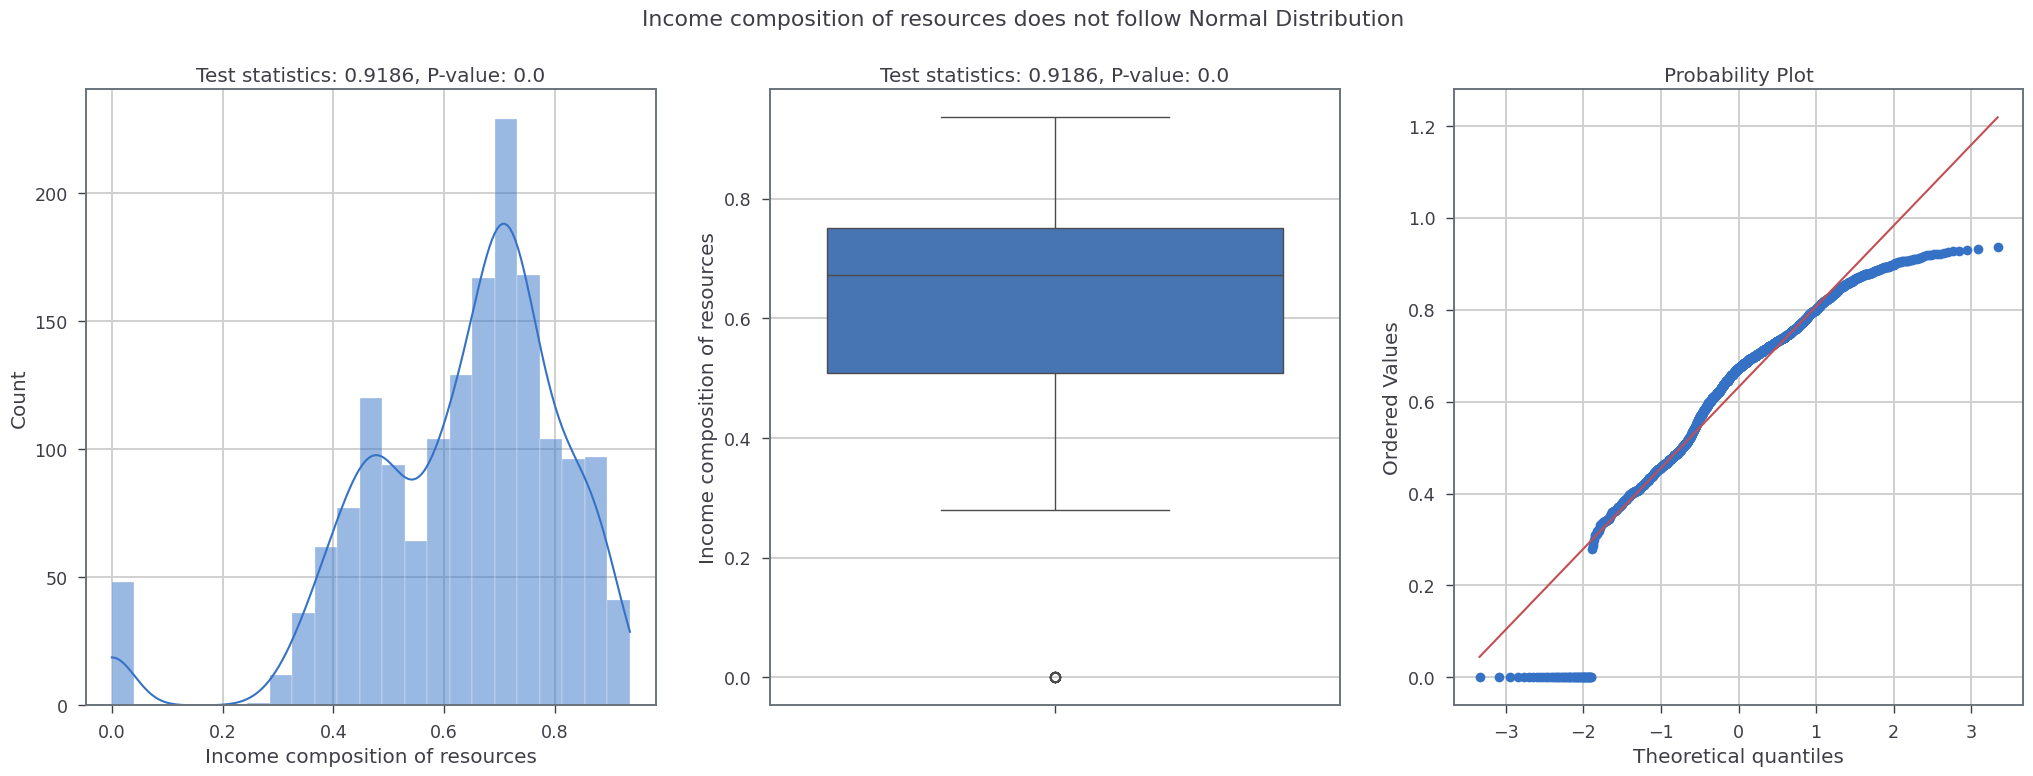

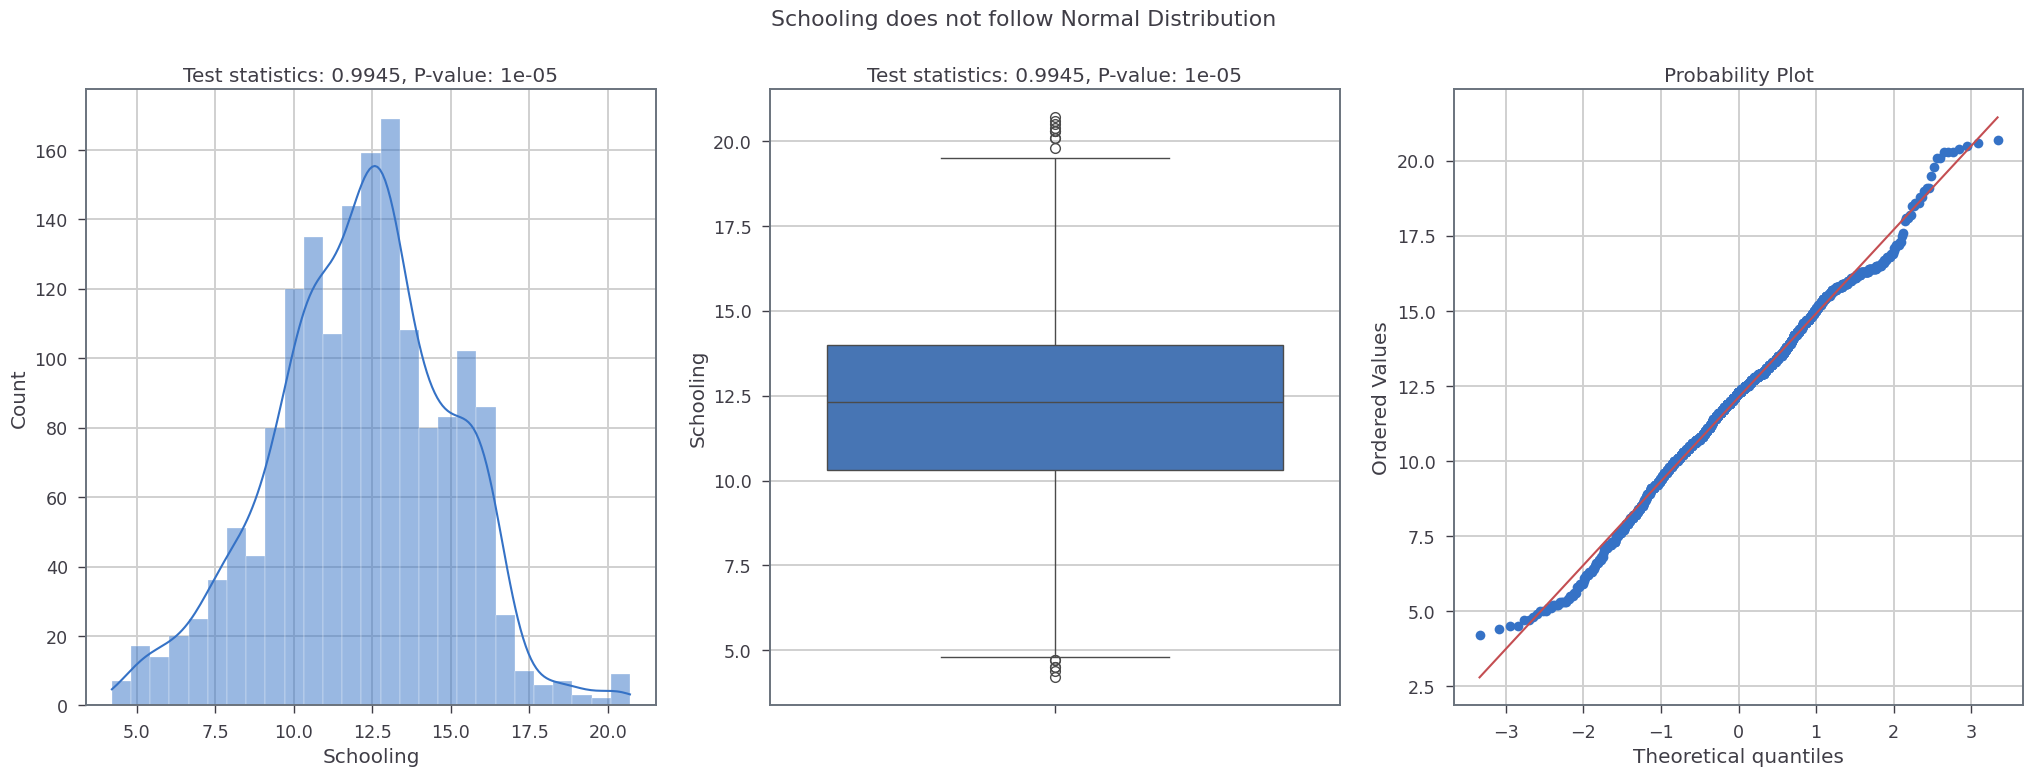

In [101]:
def plotNormalityTest(feature=None,new_data=None):
  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = shapiro(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

### D'Agostino's K^2 Test

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

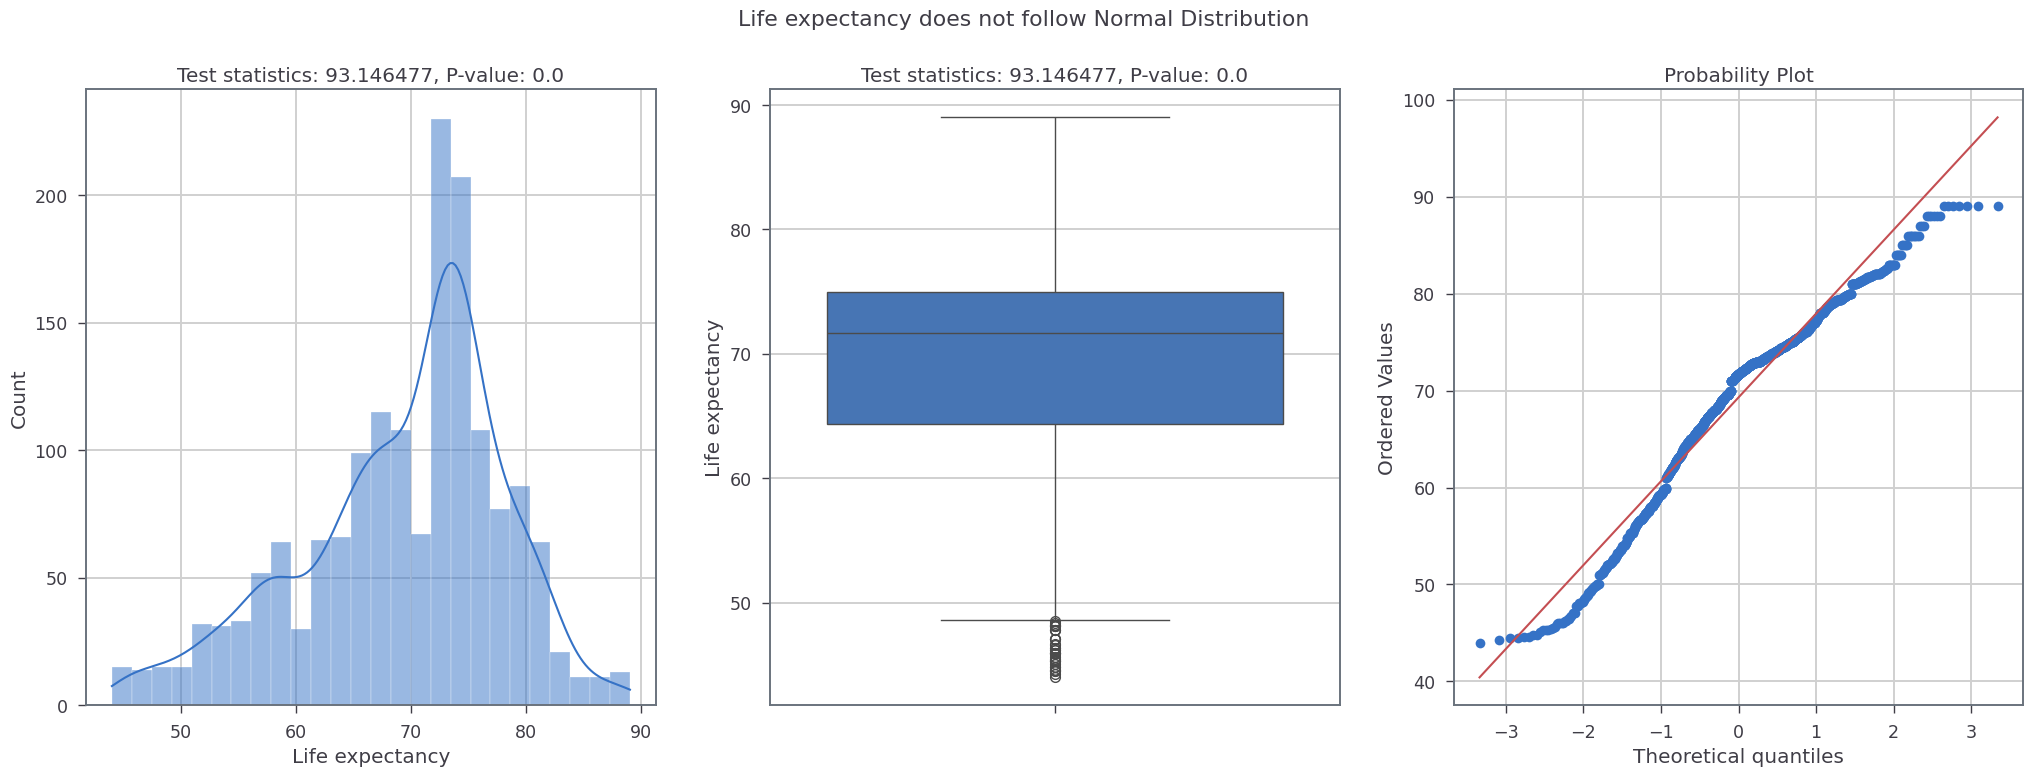

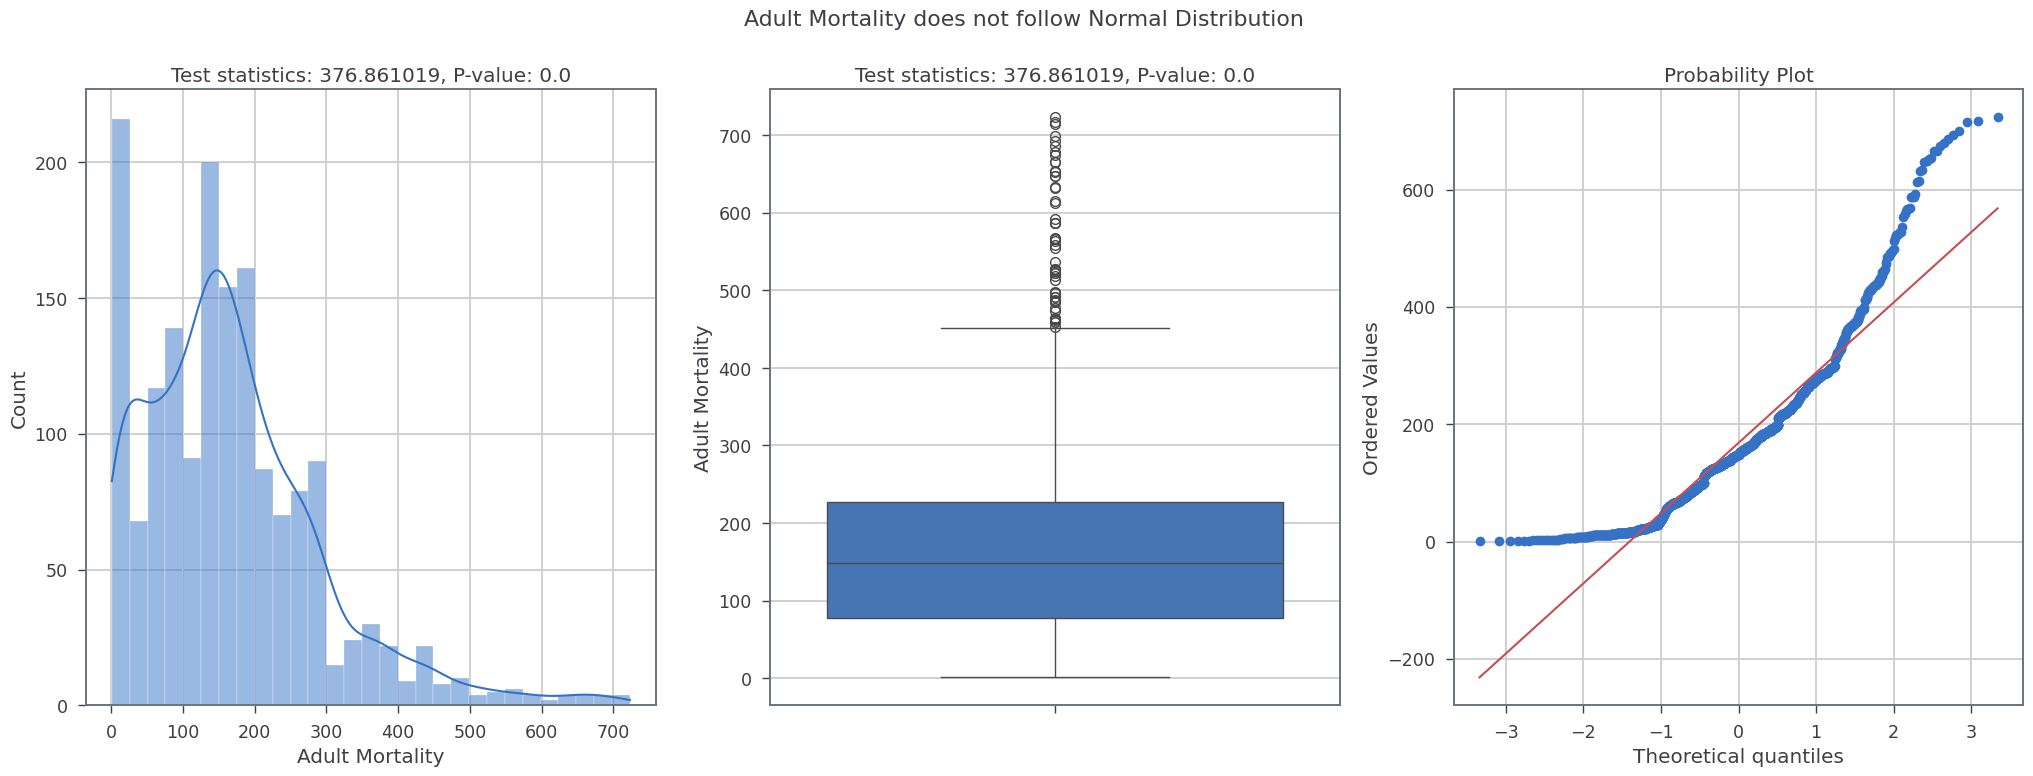

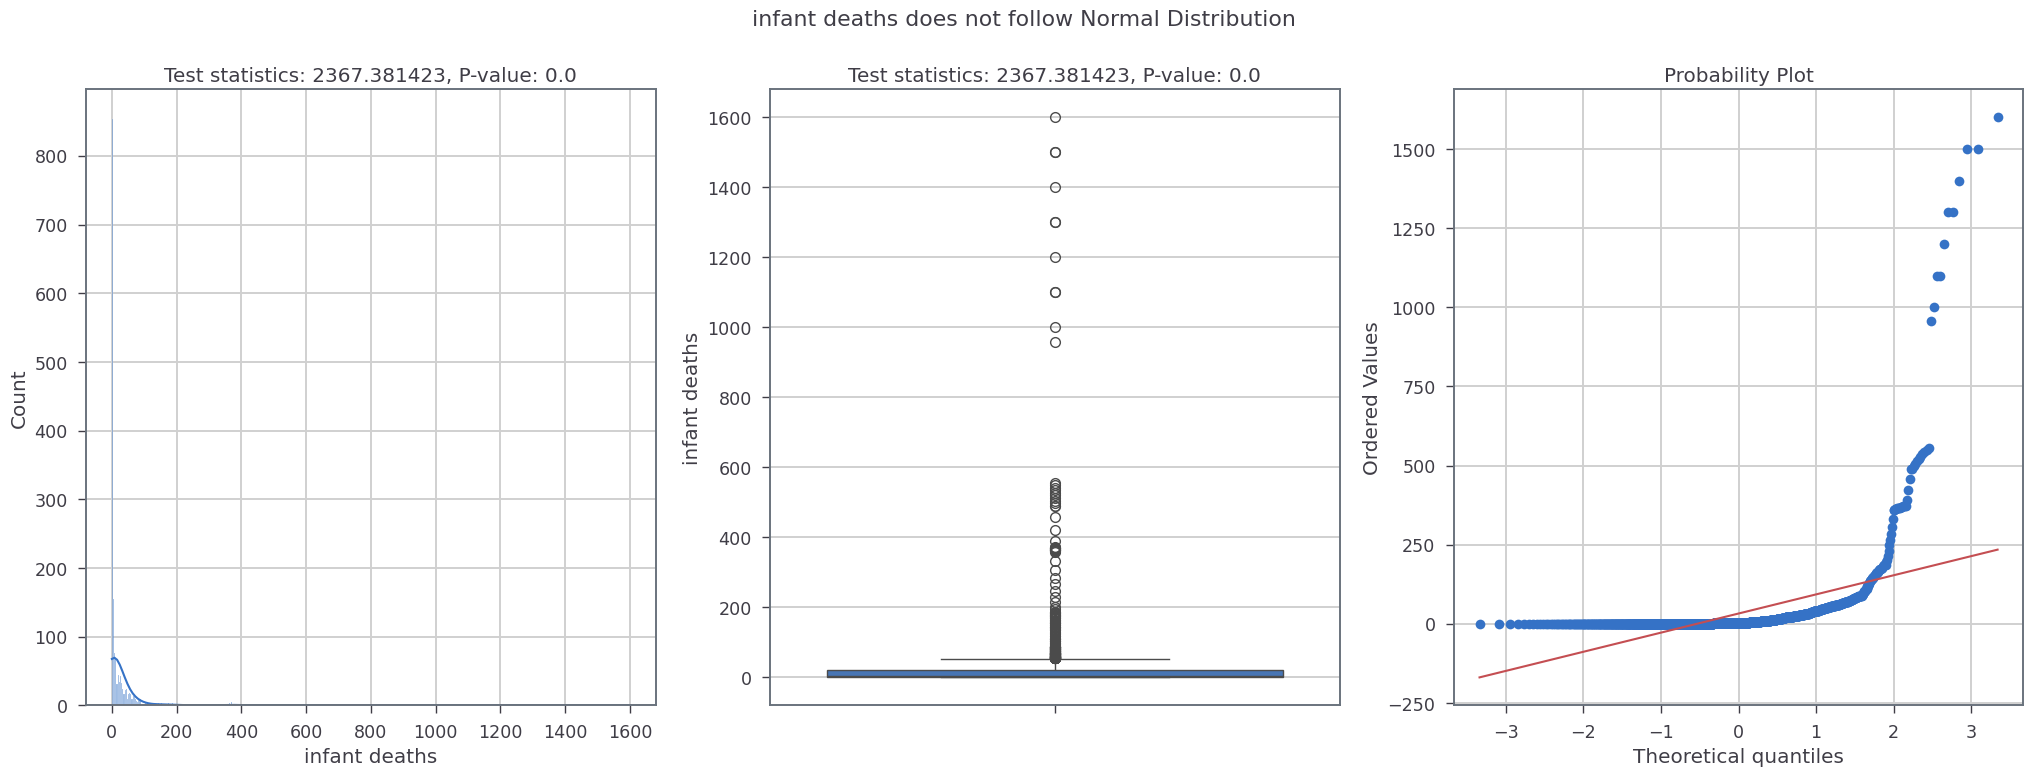

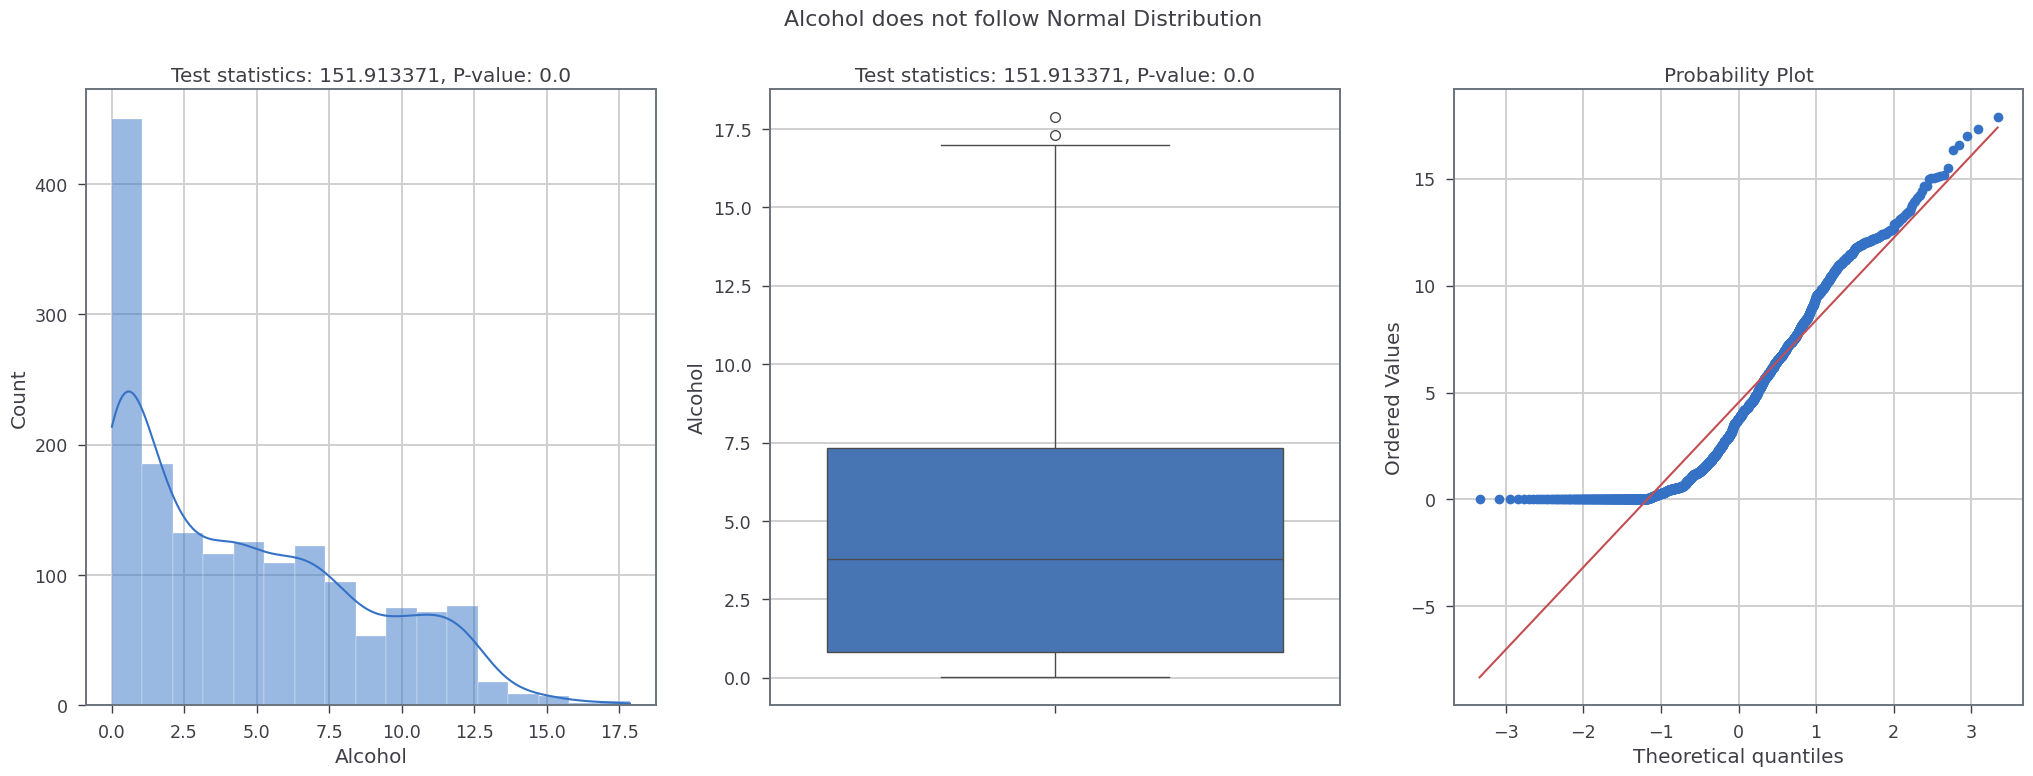

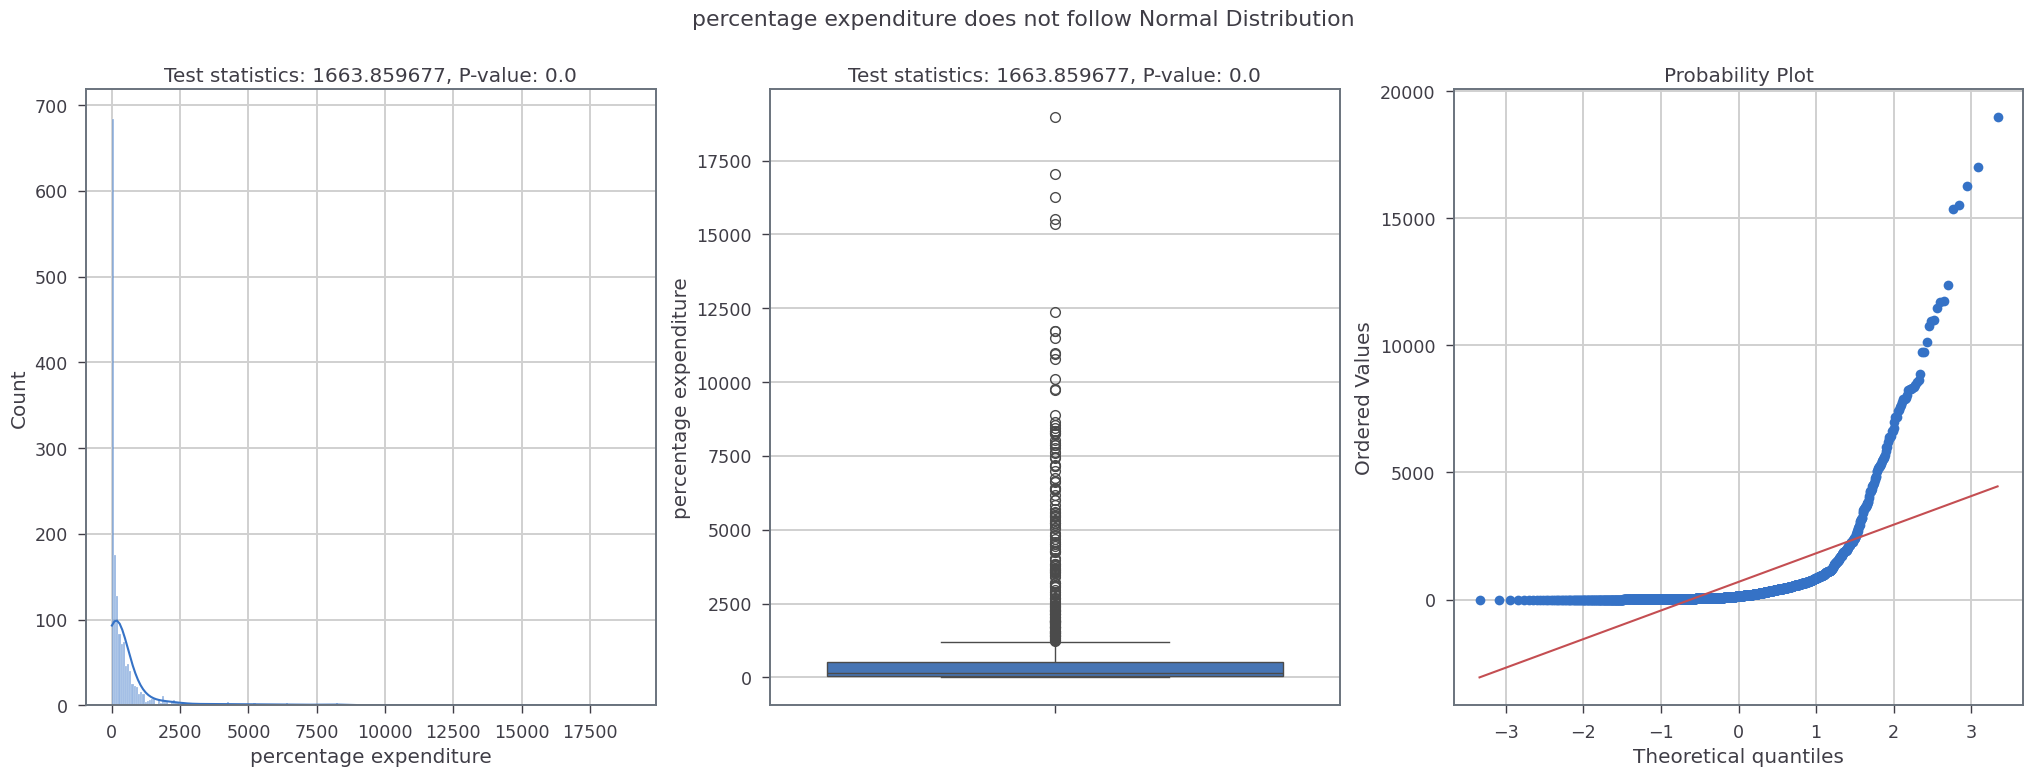

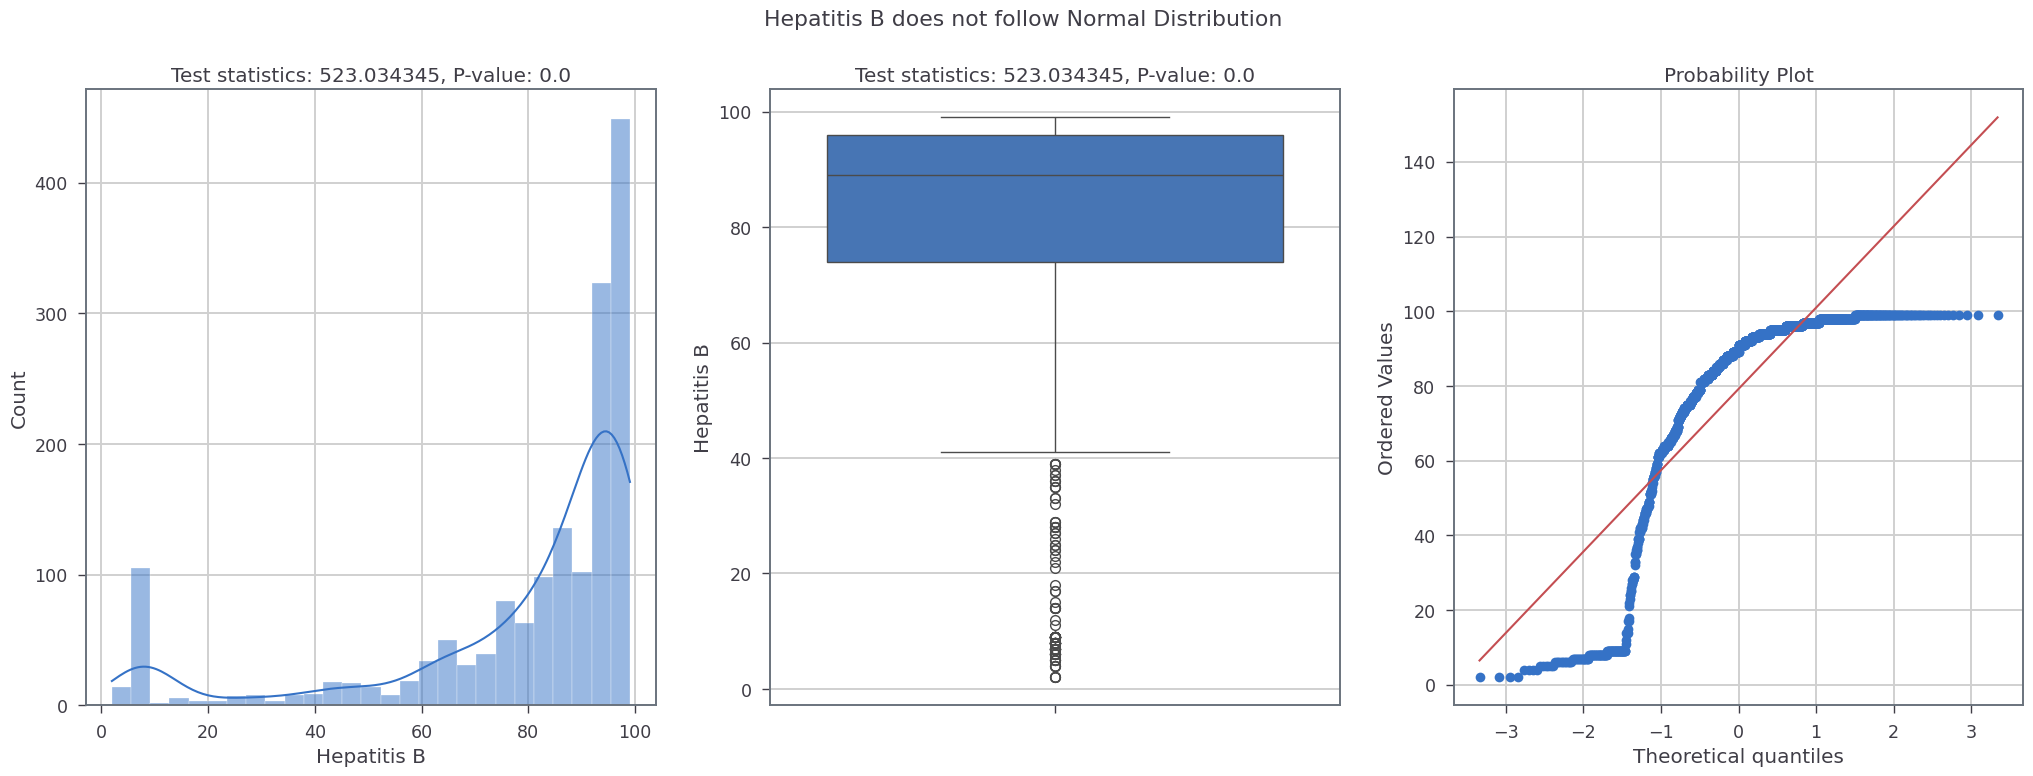

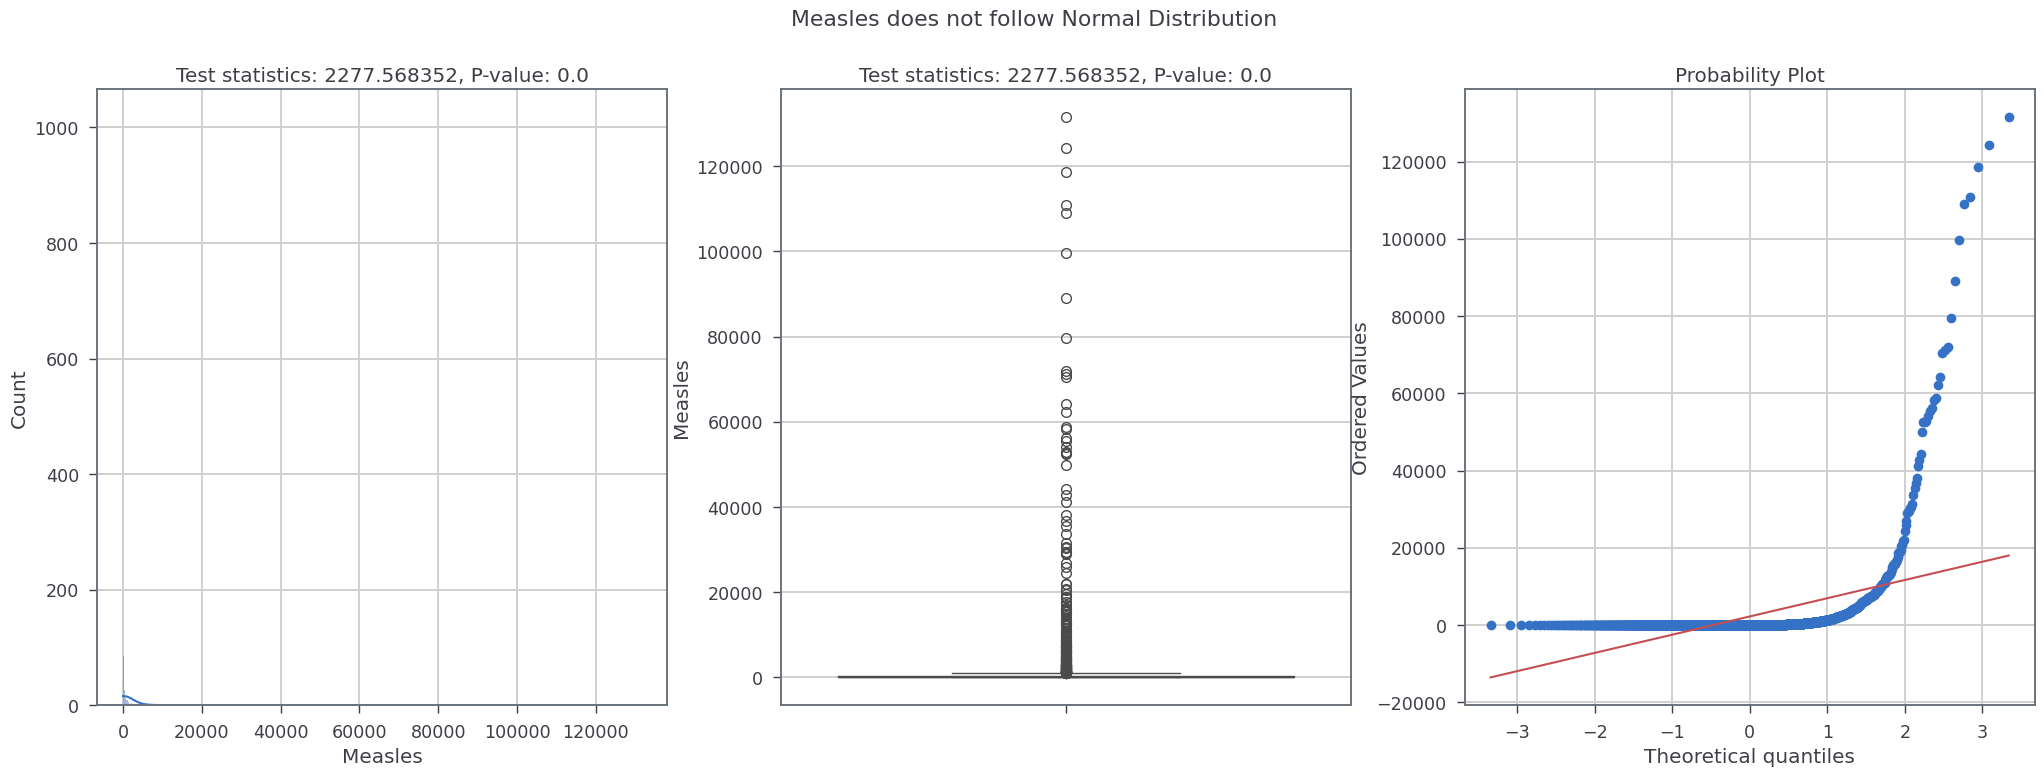

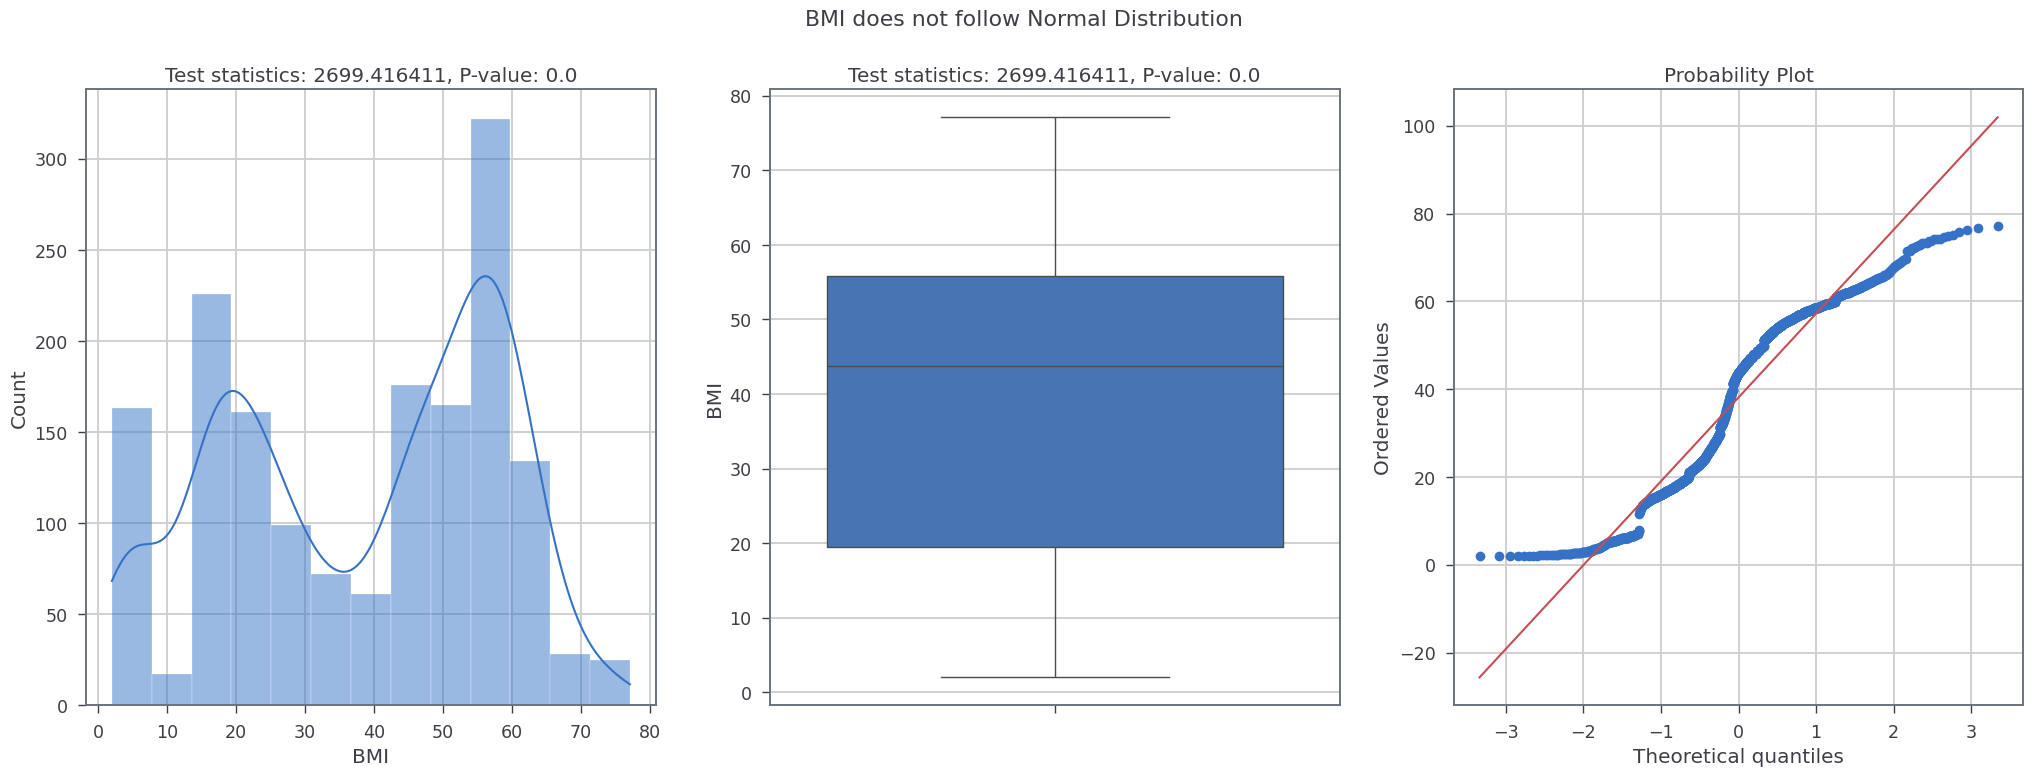

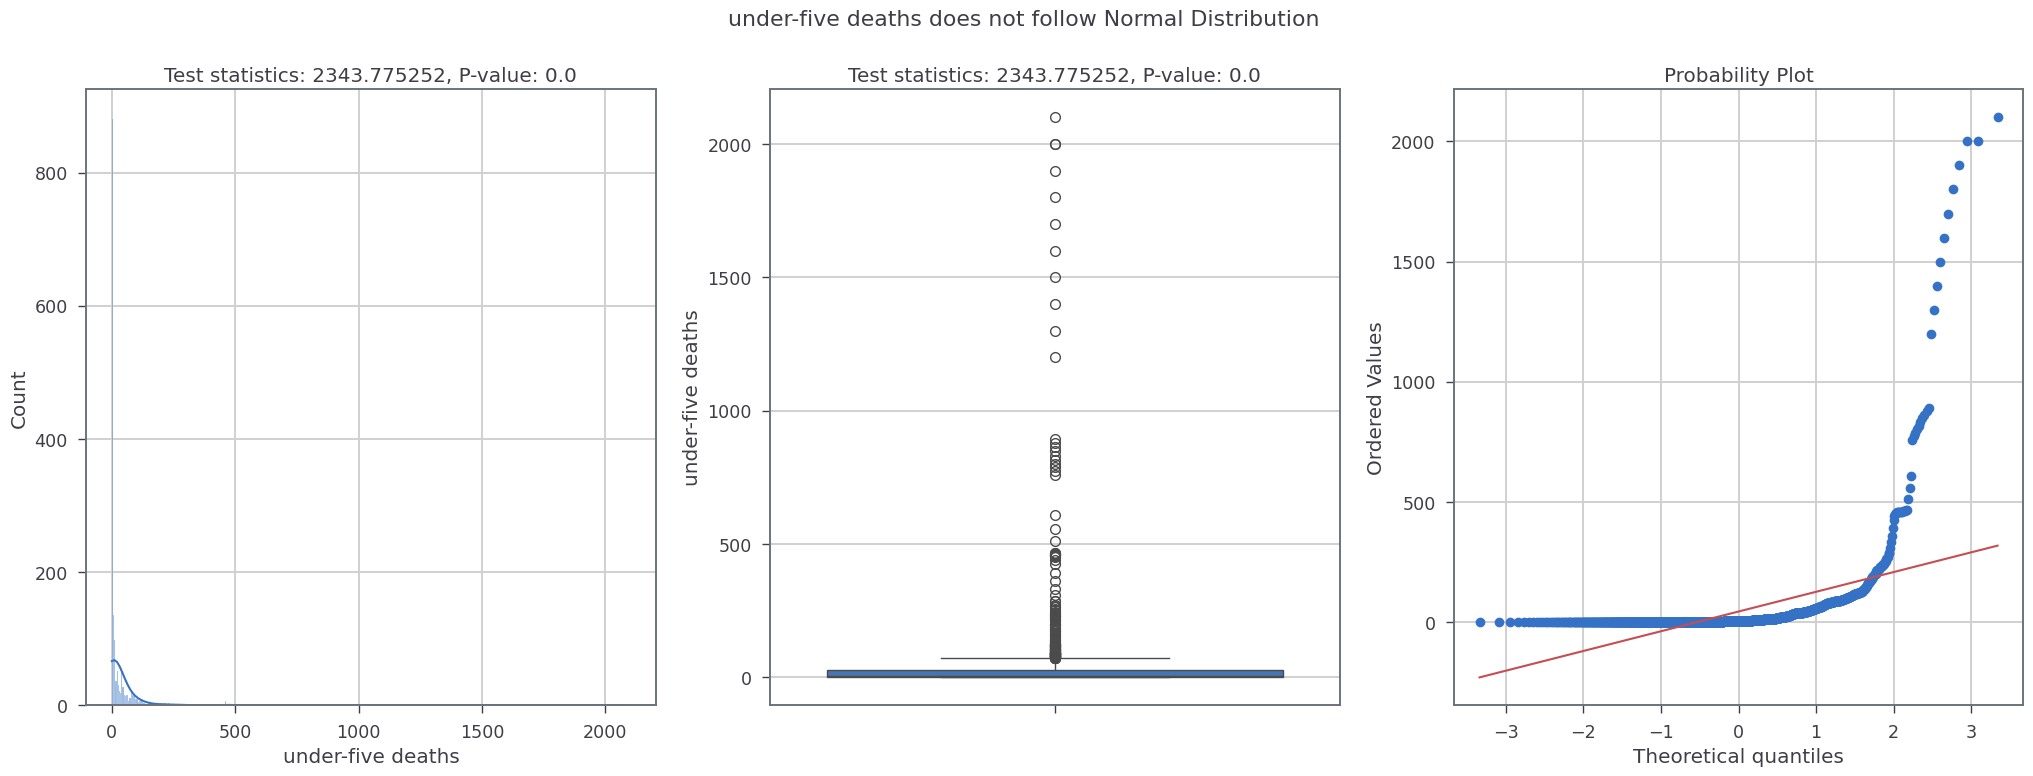

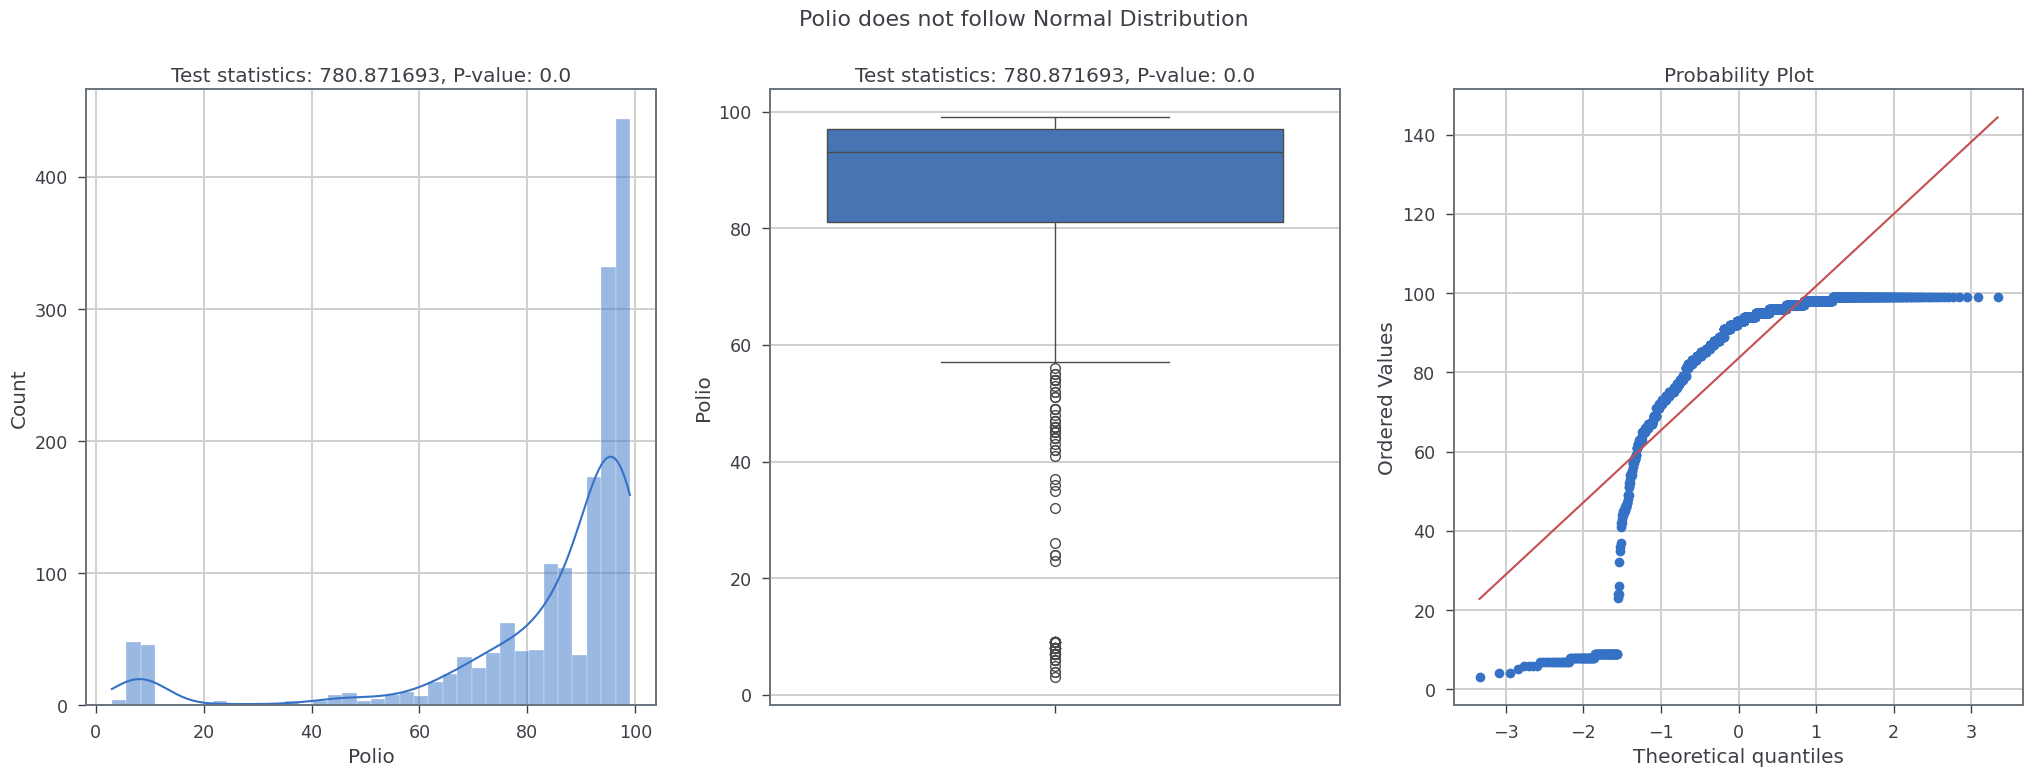

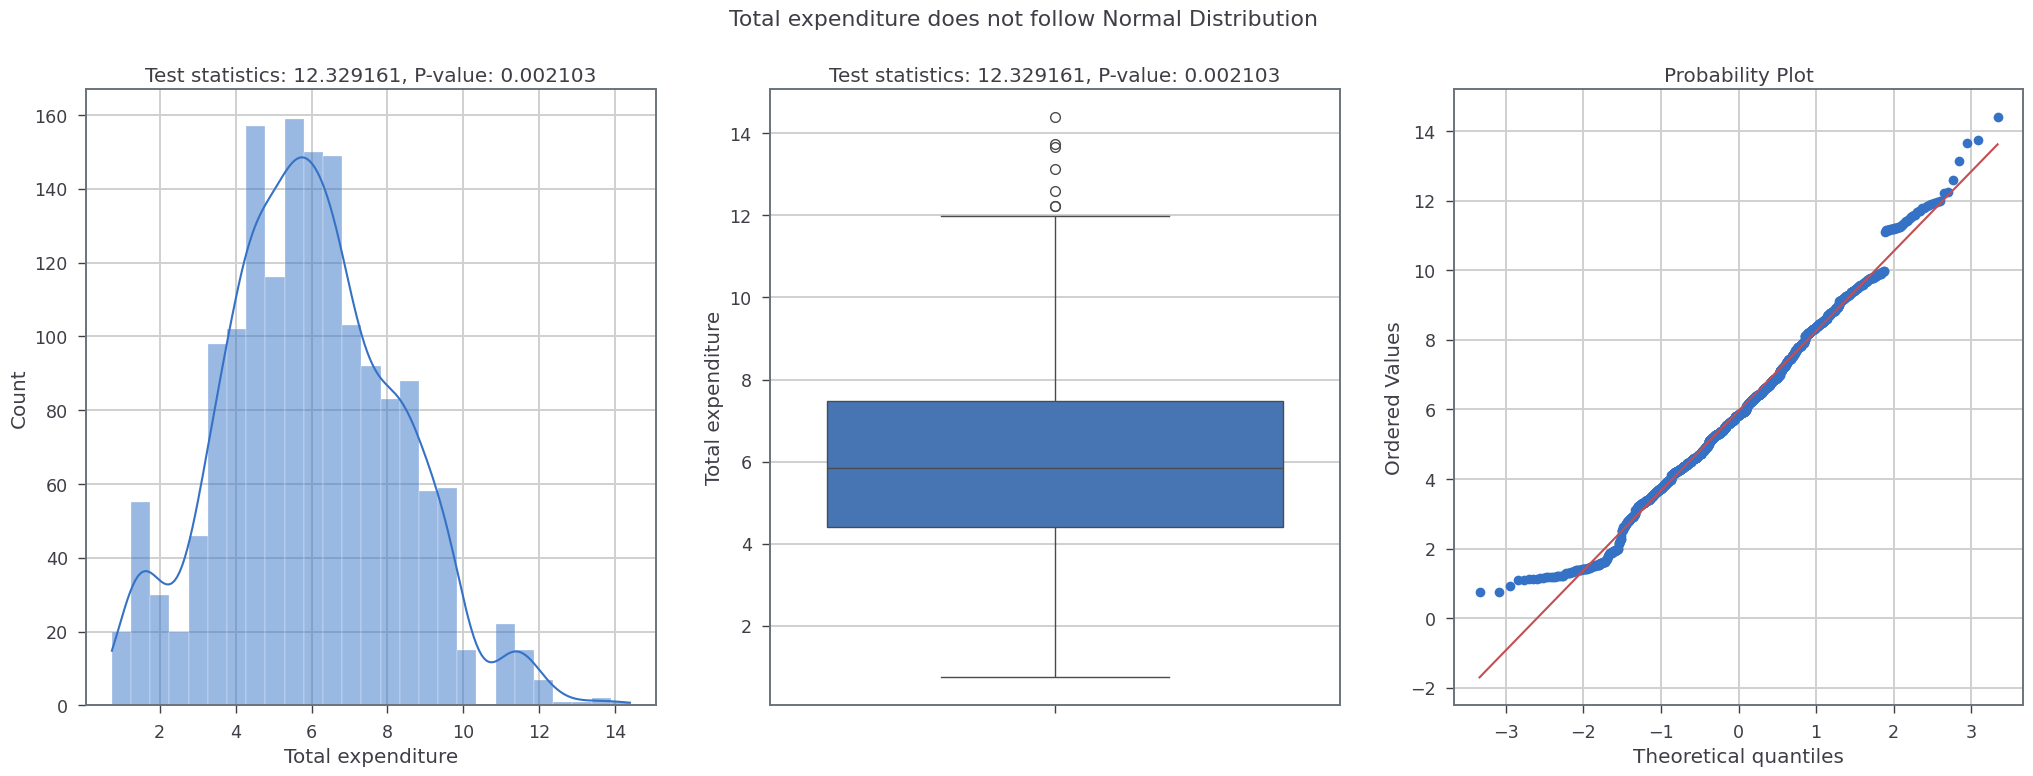

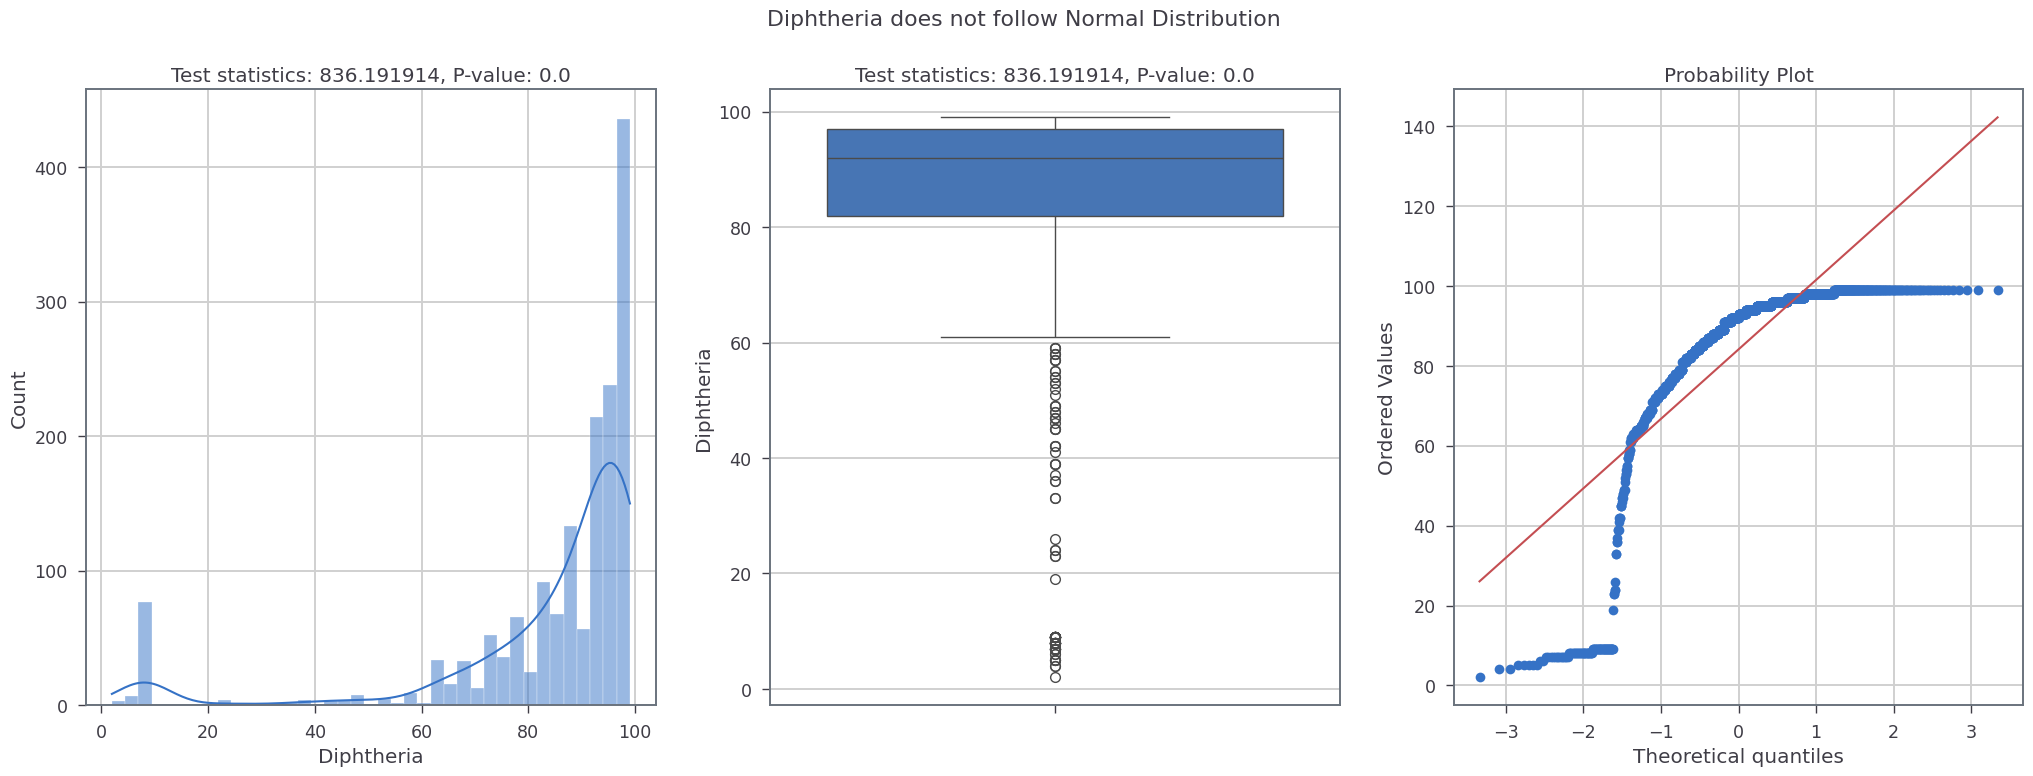

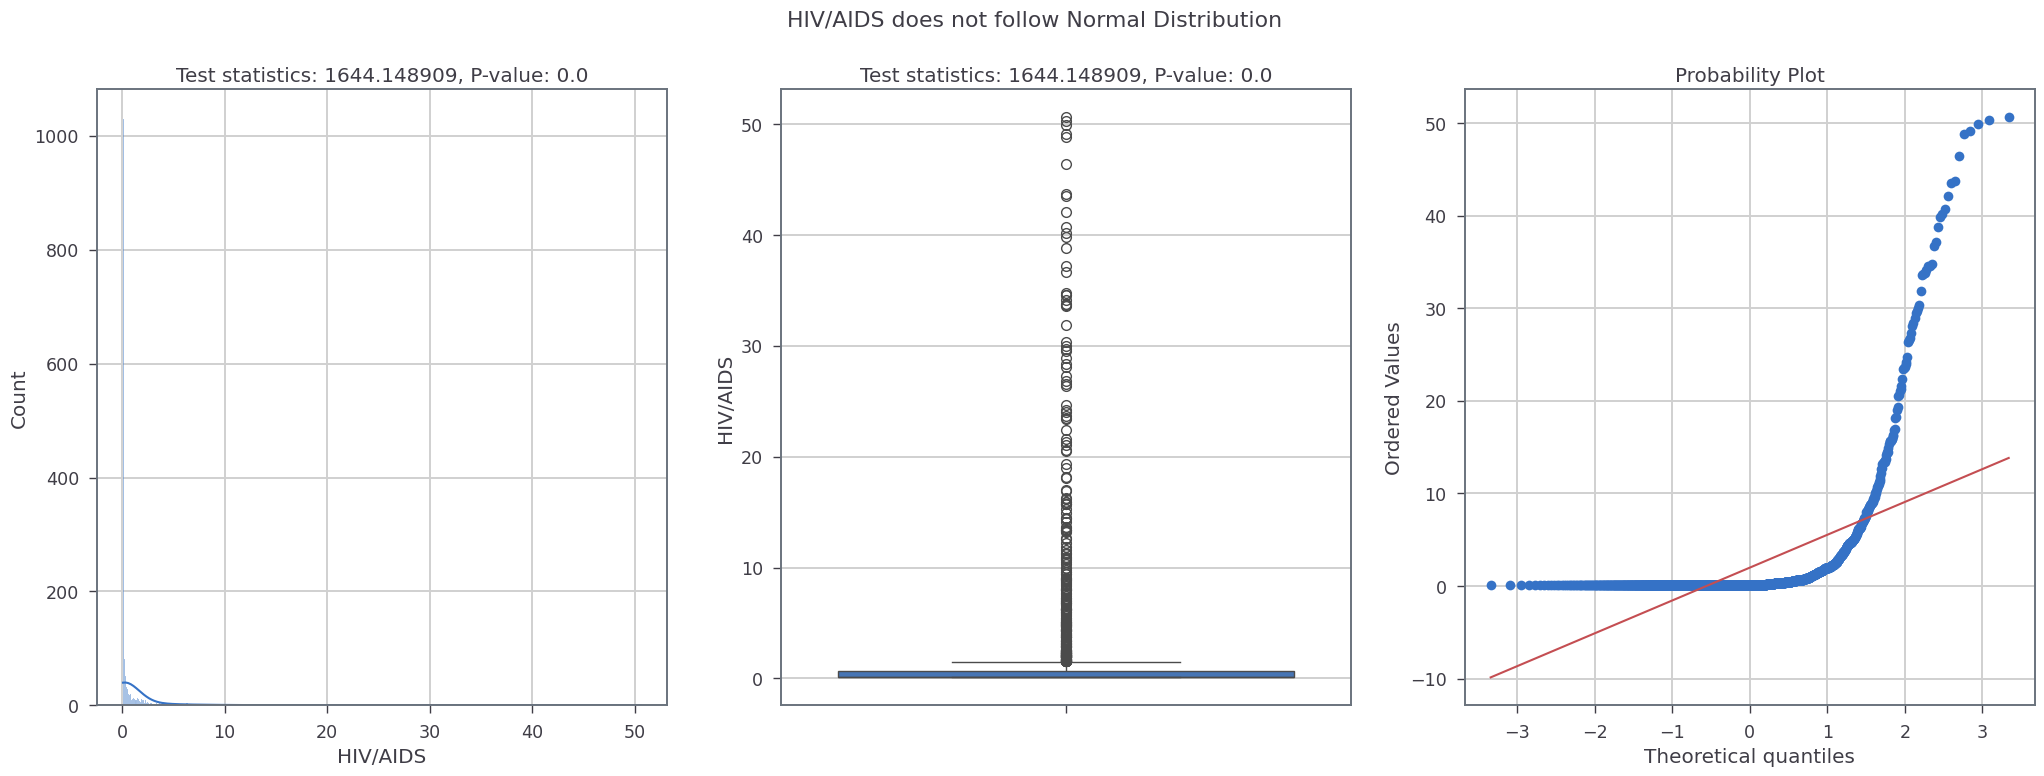

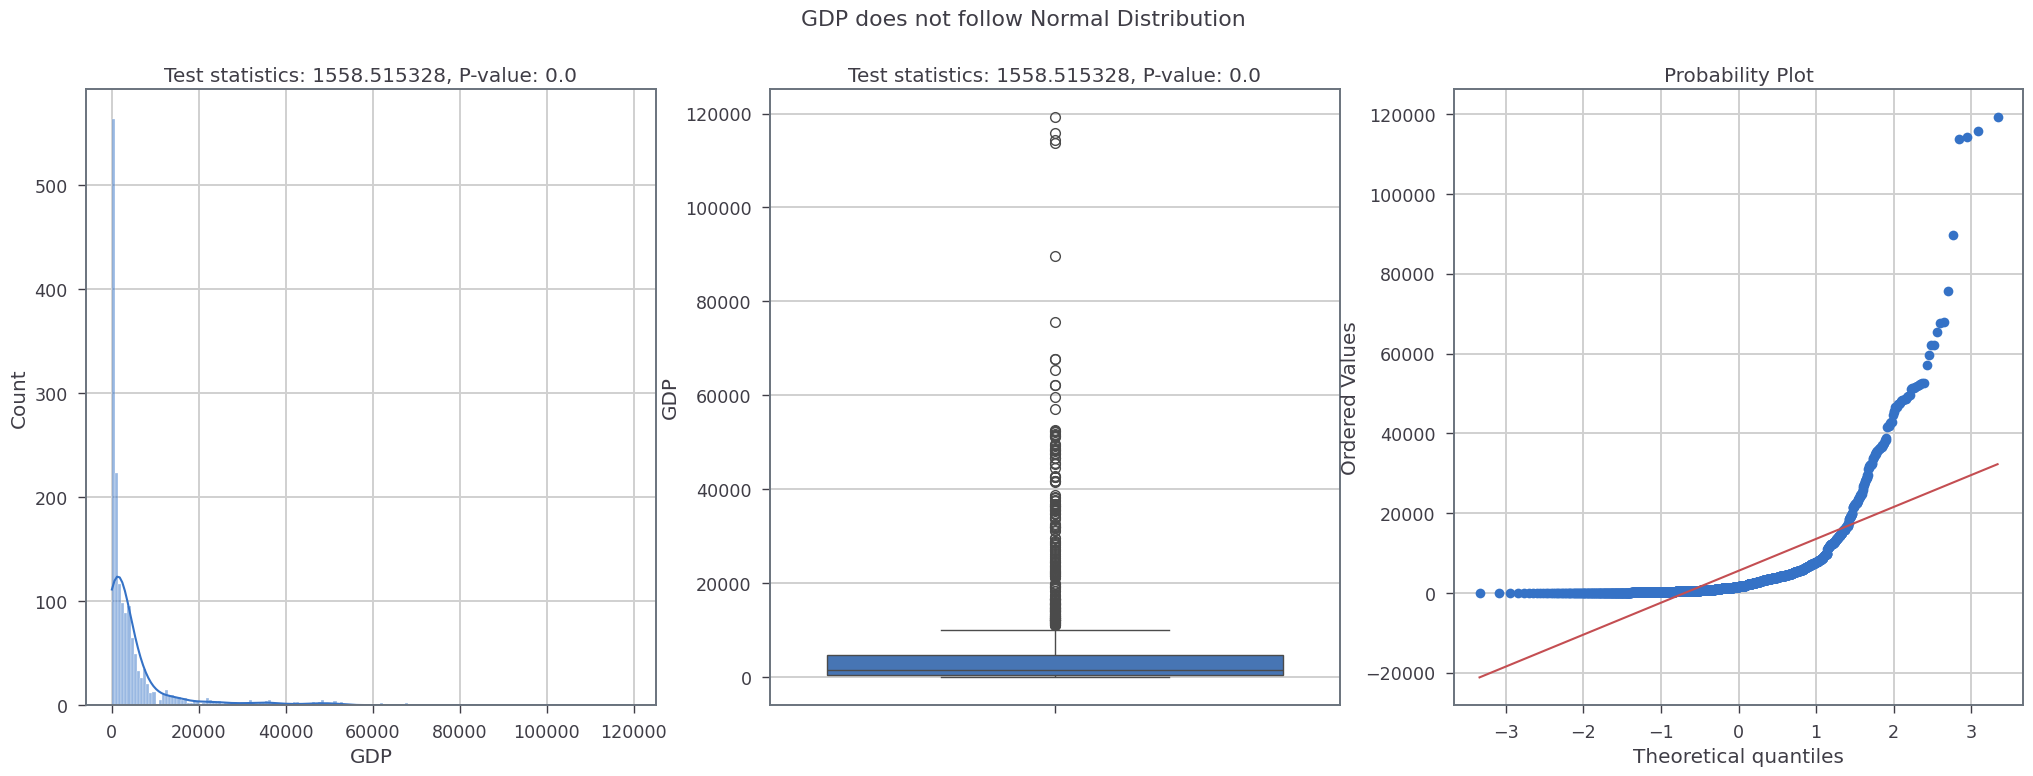

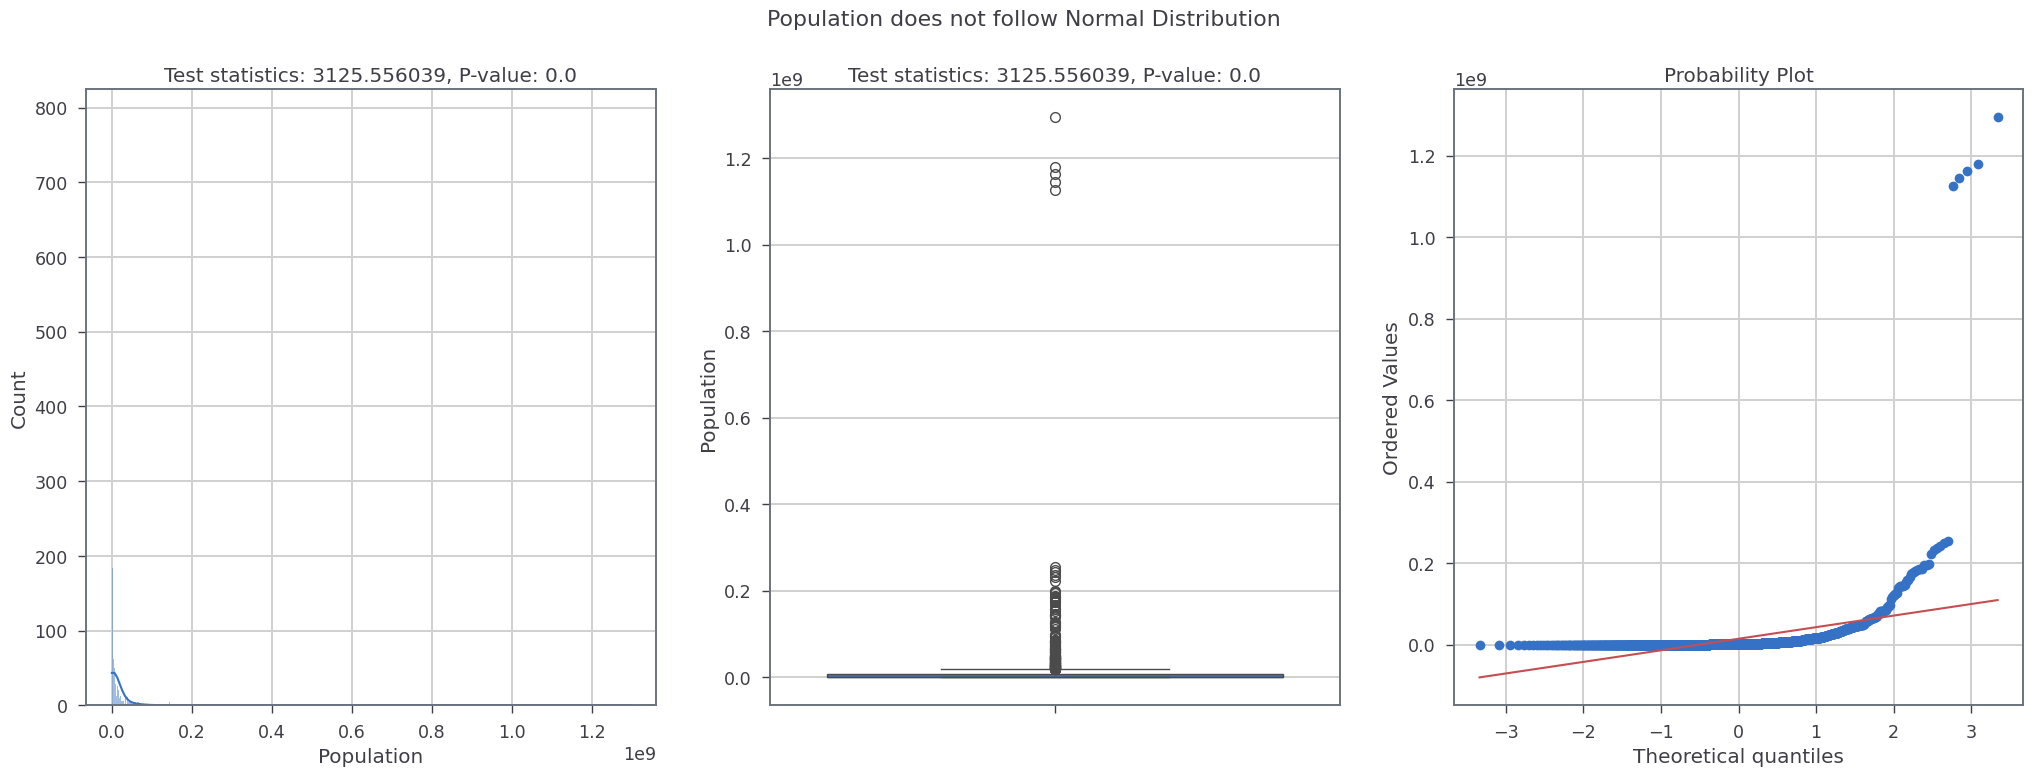

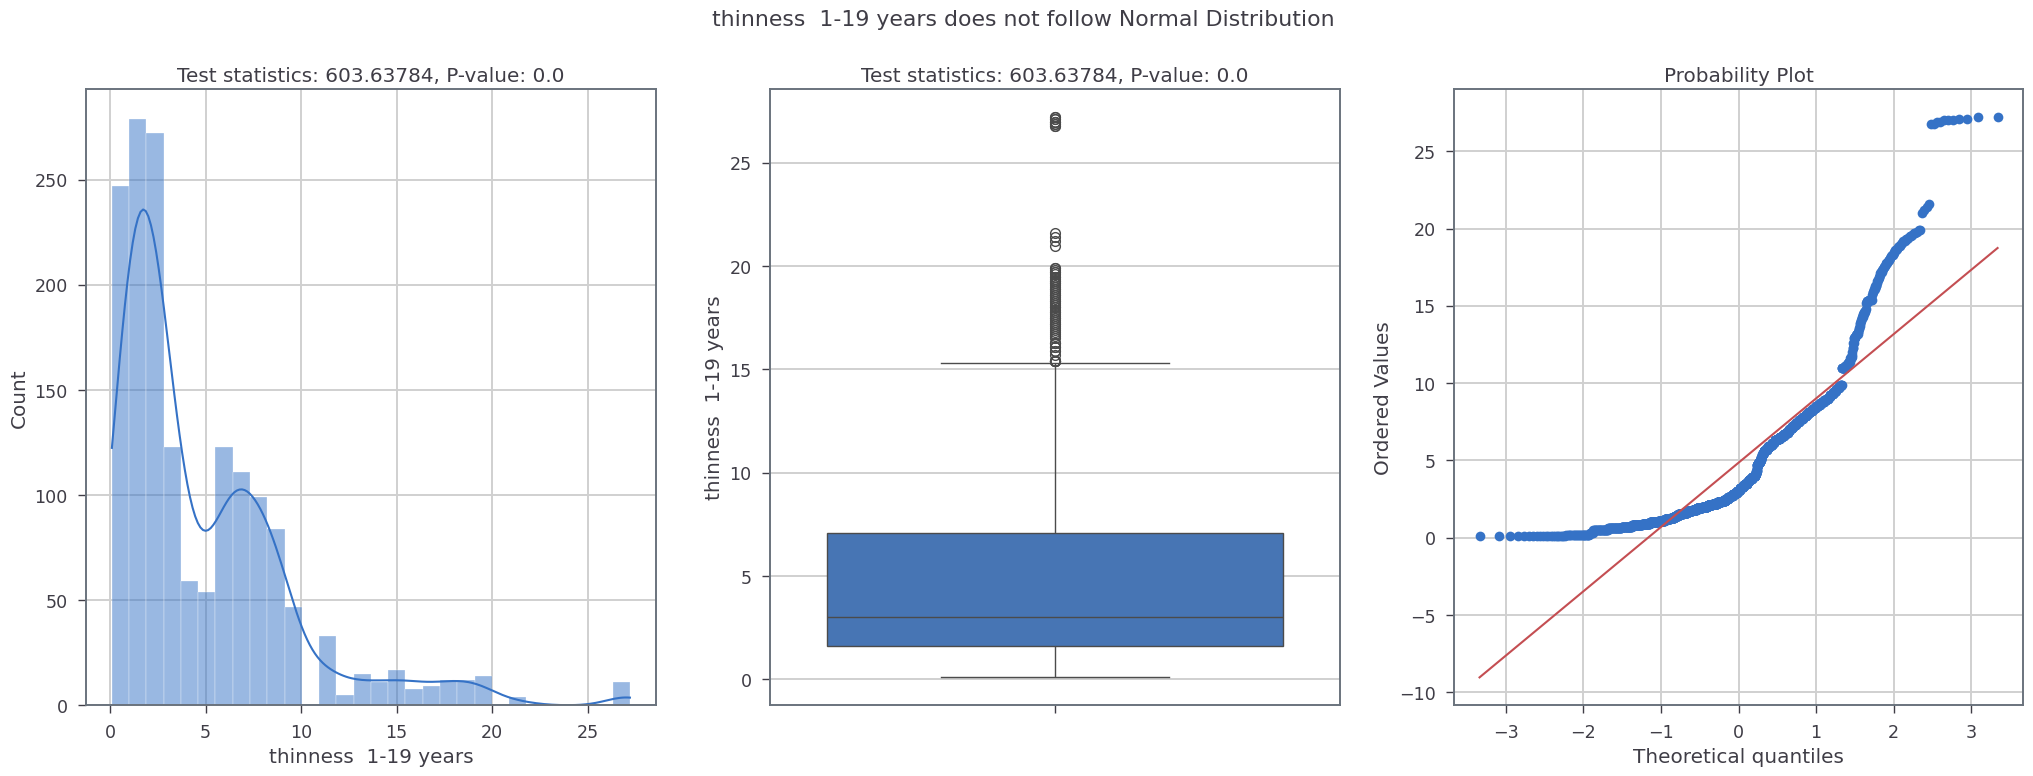

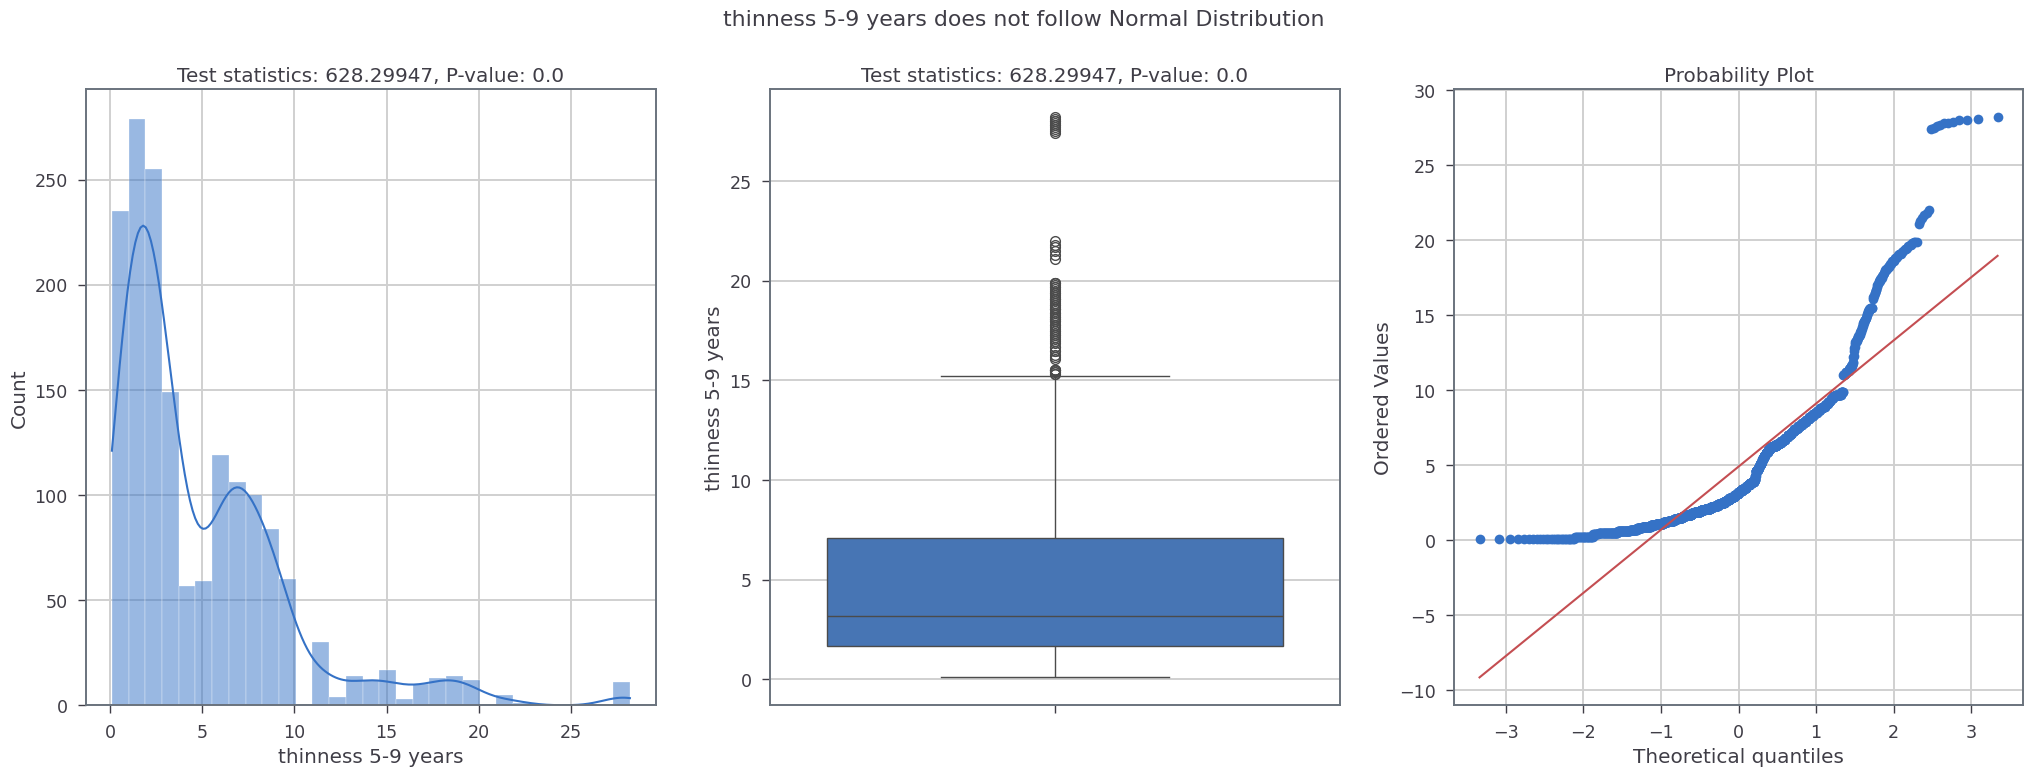

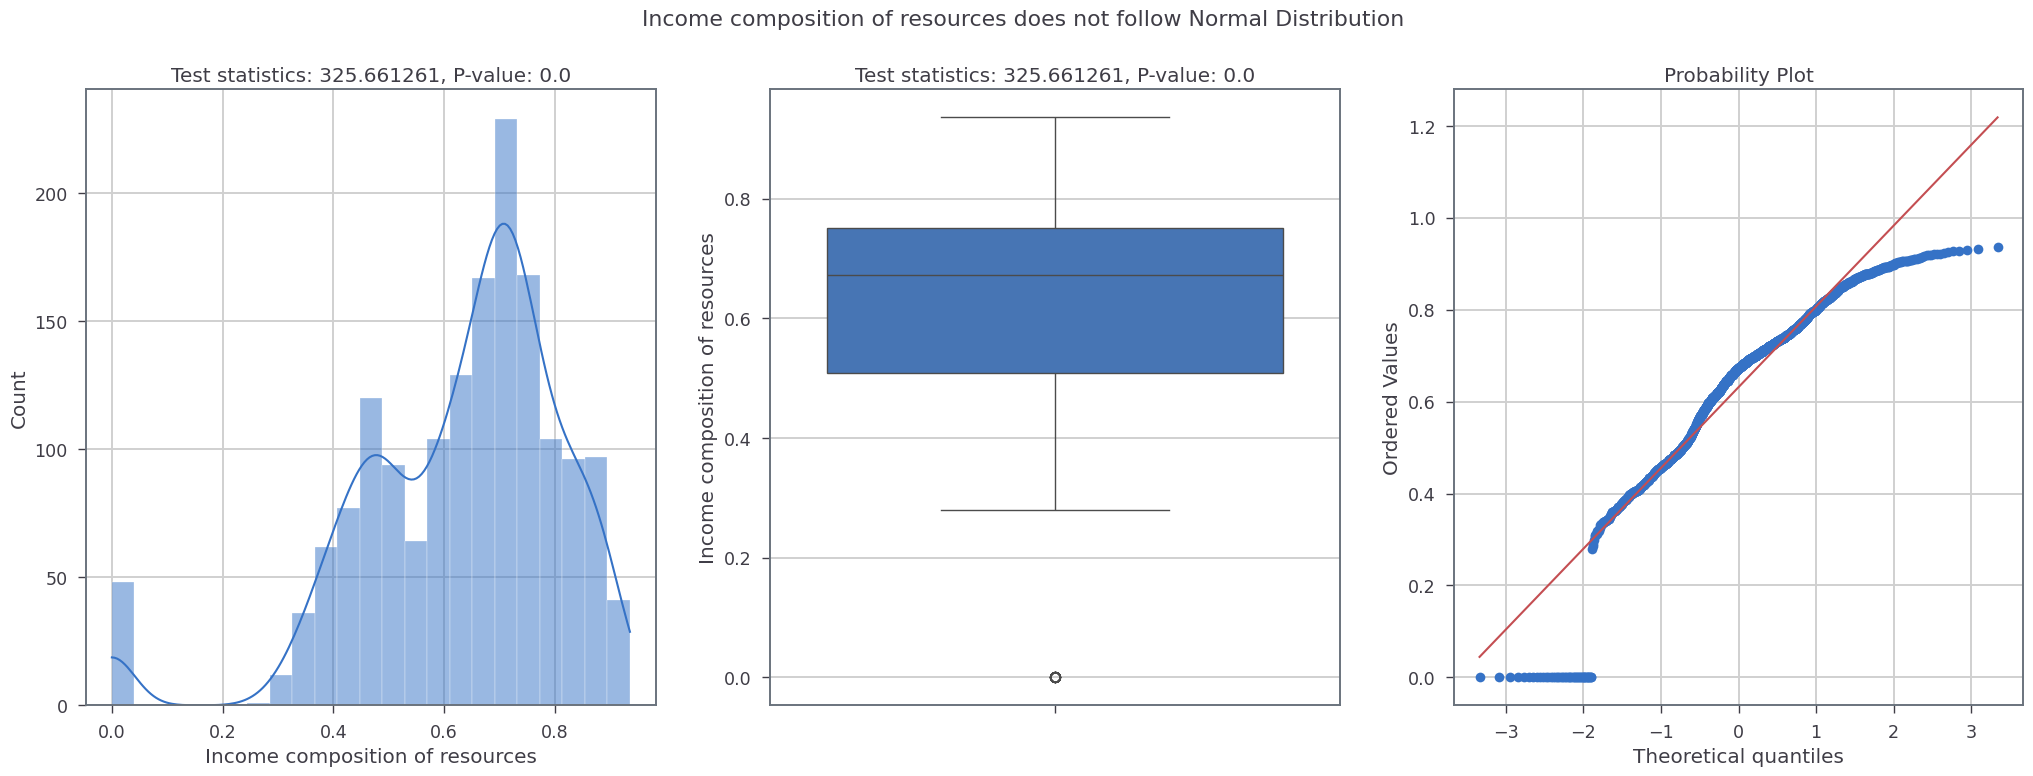

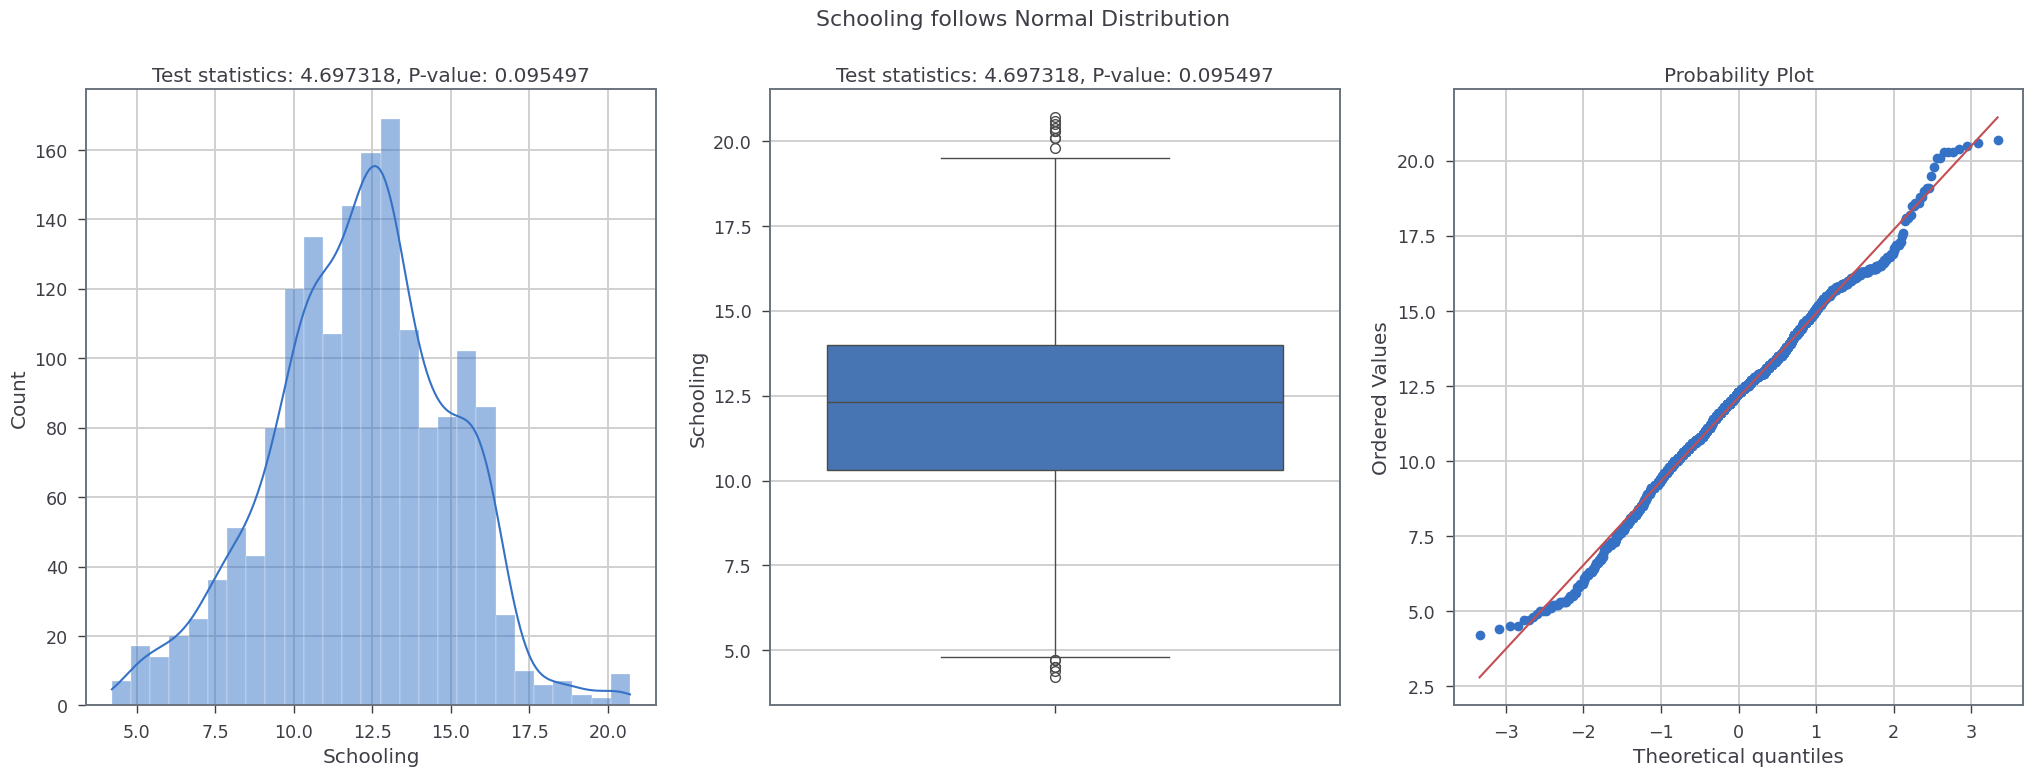

In [102]:

def plotNormalityTest(feature=None,new_data=None):

  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = normaltest(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

#### Observation
  - Skewed (Not following the normal Distribution)
  - Outliers


## Multi-variant Analysis

### Multicolinearity

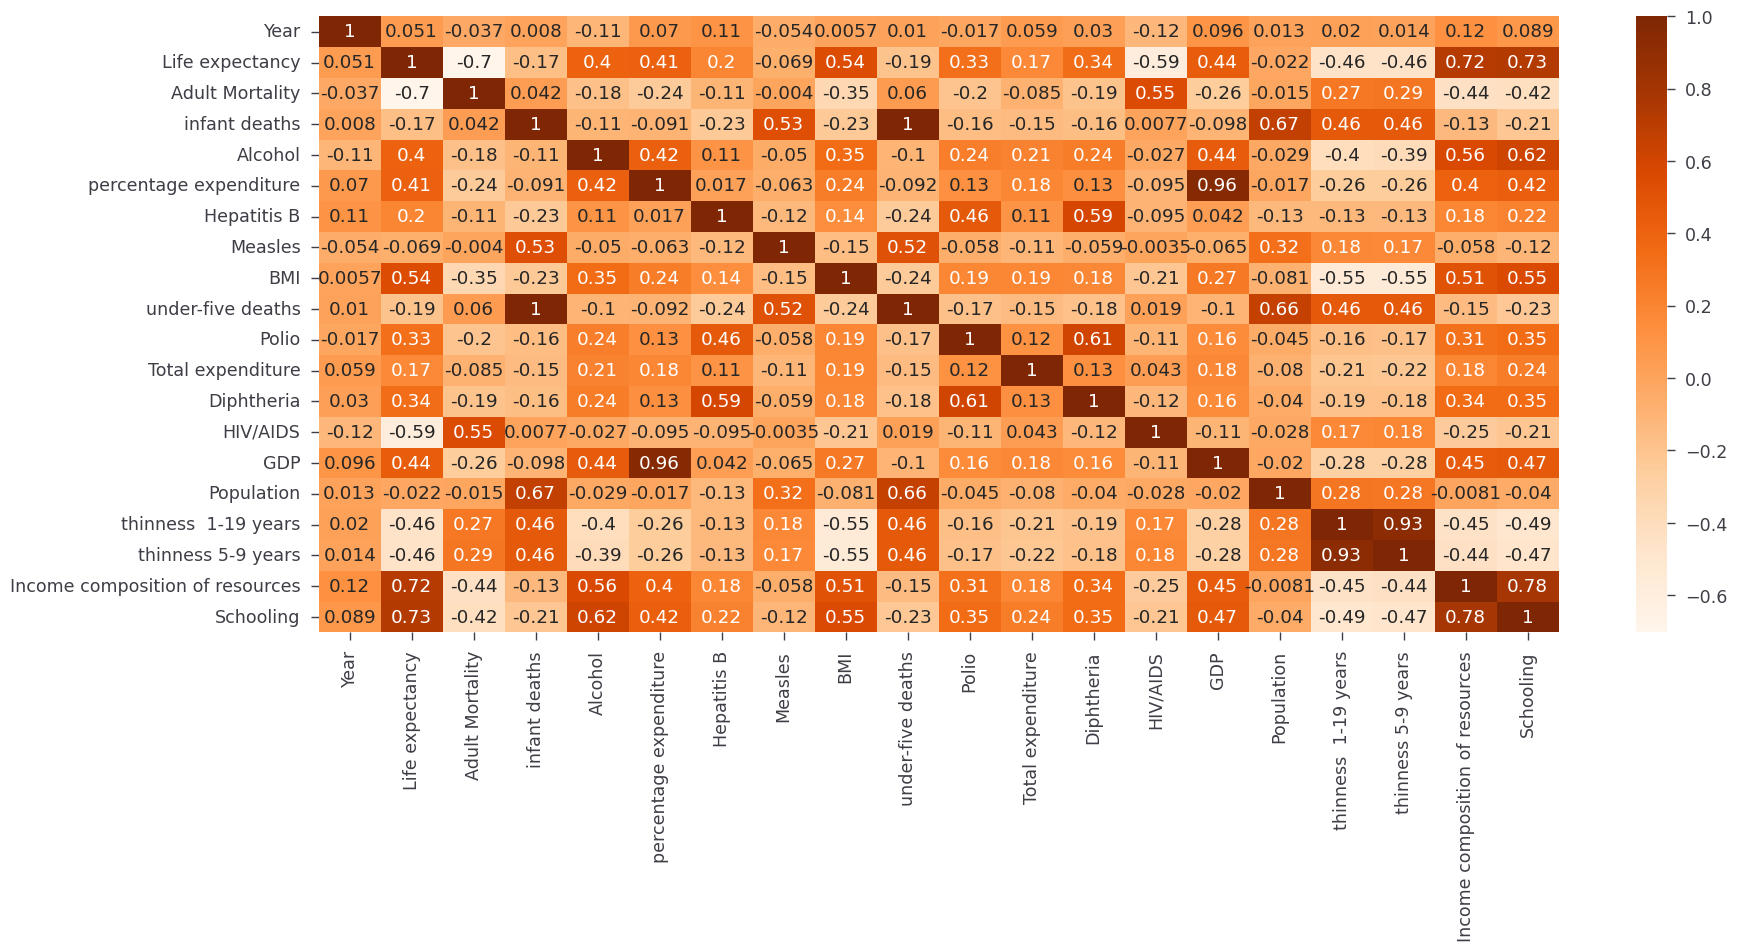

In [103]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(numeric_only=True,method='pearson'),annot=True,cmap='Oranges')
plt.show()

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

https://www.datasklr.com/ols-least-squares-regression/multicollinearity

In [104]:
vif_data = data.select_dtypes(exclude='object').dropna().drop('Life expectancy',axis=1)
total_columns = vif_data.shape[1]
columns_to_be_dropped = []

for indx in range(0, len(vif_data.columns)):
    vif_value = variance_inflation_factor(vif_data.values, indx)
    print(vif_data.columns[indx], '---', vif_value)
    if vif_value > 7:
        columns_to_be_dropped.append(vif_data.columns[indx])

Year --- 69.40270227960978
Adult Mortality --- 5.039779805474789
infant deaths --- 227.67379896006122
Alcohol --- 4.403198876187918
percentage expenditure --- 14.87479675894806
Hepatitis B --- 17.478070677644347
Measles --- 1.5876008952278955
BMI --- 8.492877049414473
under-five deaths --- 216.99376606384968
Polio --- 25.445367759387107
Total expenditure --- 8.63239576985633
Diphtheria --- 33.93855879966995
HIV/AIDS --- 1.6429252382760486
GDP --- 16.693718966276187
Population --- 2.0274716241610906
thinness  1-19 years --- 16.06548782840675
thinness 5-9 years --- 16.024454709525365
Income composition of resources --- 38.375959641936944
Schooling --- 69.66715563609422


In [105]:
columns_to_keep = data.columns.difference(columns_to_be_dropped)

<Axes: >

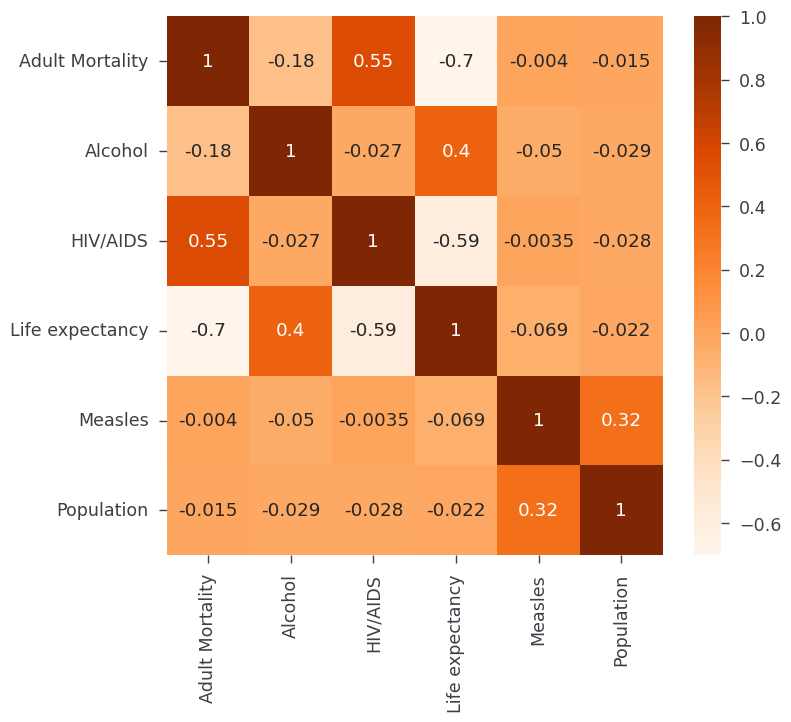

In [106]:
sns.heatmap(data[columns_to_keep].select_dtypes(exclude='object').corr(),annot=True,cmap='Oranges')

### Hypotheses for Pearson Correlation Coefficient

In hypothesis testing with Pearson's correlation coefficient \( r \), we typically consider the following hypotheses:

- **Null Hypothesis (\( H_0 \)):**
  The null hypothesis states that there is no significant linear relationship between the two variables being studied.
  \[ H_0: r = 0 \]

- **Alternative Hypothesis (\( H_1 \)):**
  The alternative hypothesis contradicts the null hypothesis and suggests that there is a significant linear relationship between the two variables.
  \[ H_1: r \neq 0 \]
  (Or depending on the research question, it could be one-tailed, either positive or negative.)

When conducting hypothesis testing using Pearson's correlation coefficient, we aim to determine whether the observed correlation coefficient is significantly different from zero. If the p-value associated with the correlation coefficient is smaller than a predetermined significance level (often denoted as \( \alpha \)), typically 0.05, then we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is evidence of a significant linear relationship between the variables. Otherwise, if the p-value is greater than \( \alpha \), we fail to reject the null hypothesis, suggesting insufficient evidence to claim a significant linear relationship.


In [107]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [108]:
def pearsonrTestPlot(feature,target,new_data):
  new_data = new_data.dropna()
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  pearsonr_statistics,pearsonr_p_value = pearsonr(new_data[feature], new_data[target])
  spearmanr_statistics,spearmanr_p_value = spearmanr(new_data[feature], new_data[target])
  if pearsonr_p_value < 0.05 and spearmanr_p_value < 0.05:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)
  else:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)

  # Plot a scatter plot in the first subplot (ax[0])
  ax[0].scatter(new_data[feature], new_data[target])
  ax[0].set_xlabel(f'{feature}')
  ax[0].set_ylabel(f'{target}')

  # Using Seaborn to create a regression plot in the second subplot (ax[1])
  sns.regplot(data=new_data, x=new_data[feature], y=new_data[target], ax=ax[1])
  ax[1].set_xlabel(f'{feature}')
  ax[1].set_ylabel(f'{target}')

  plt.show()
  print('\n\n')

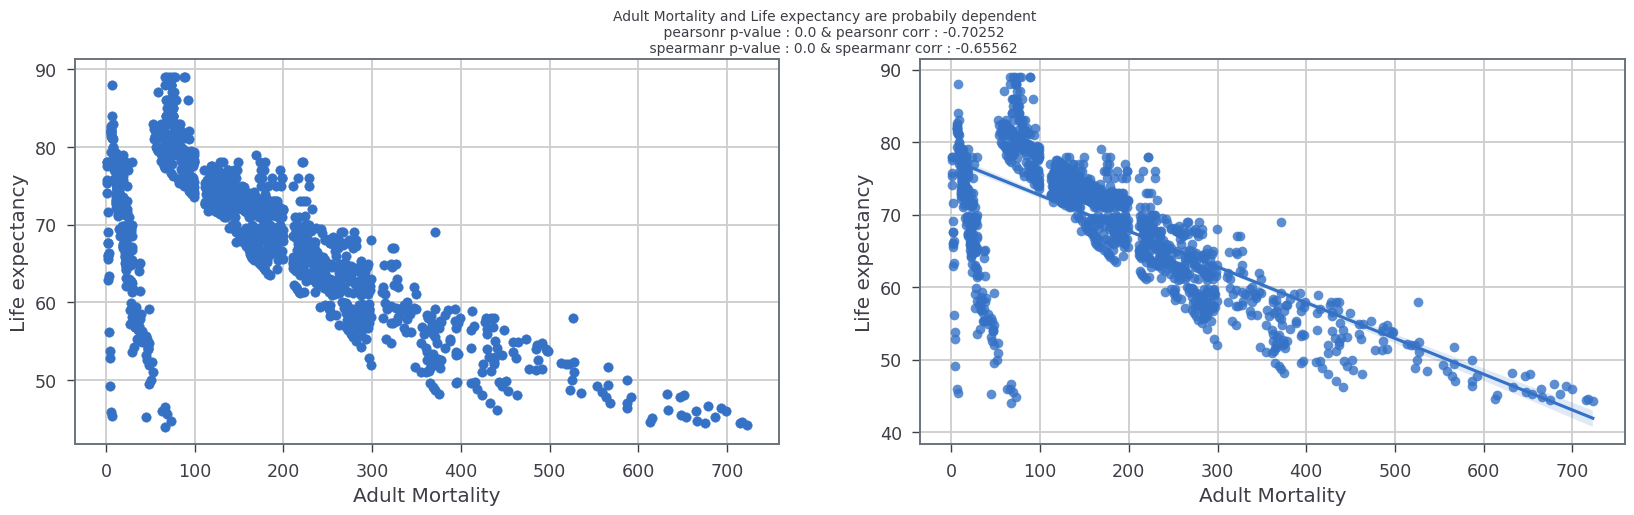

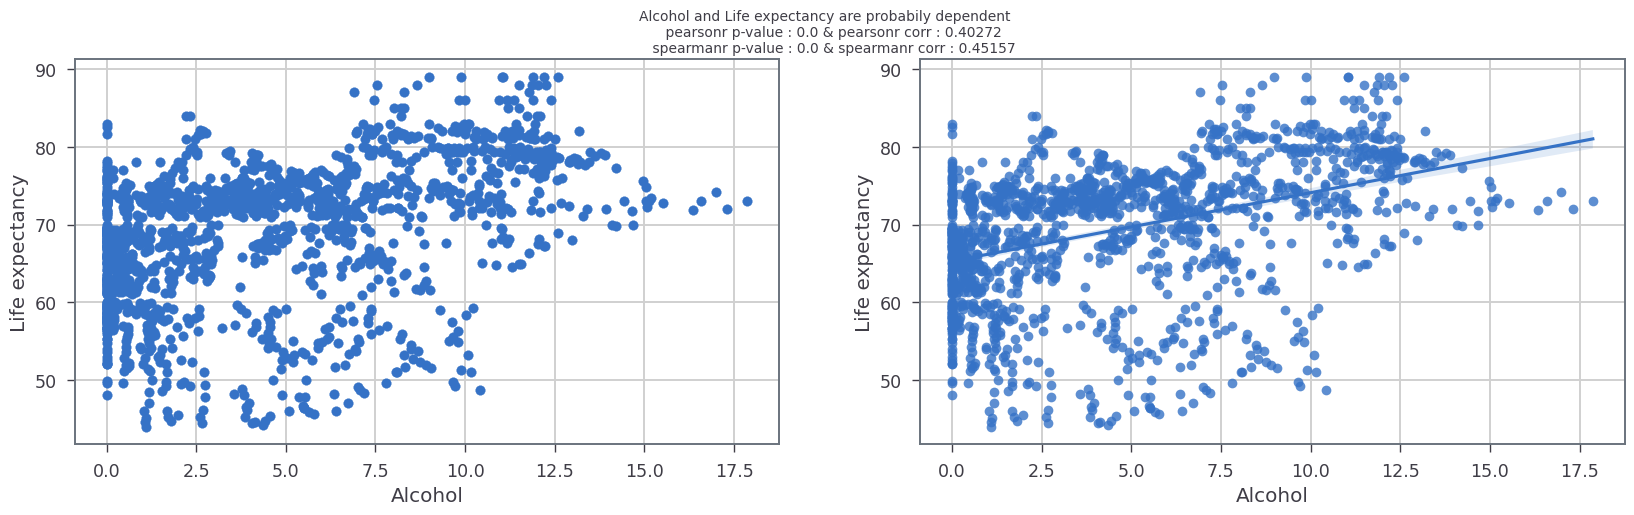

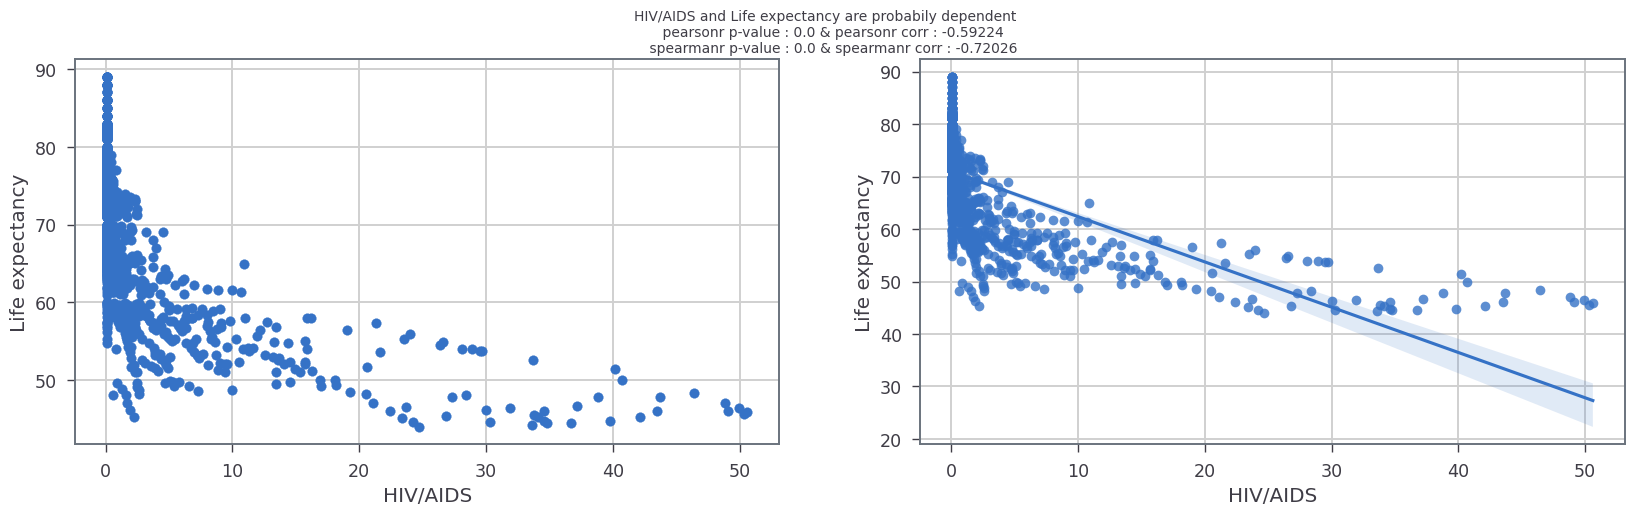

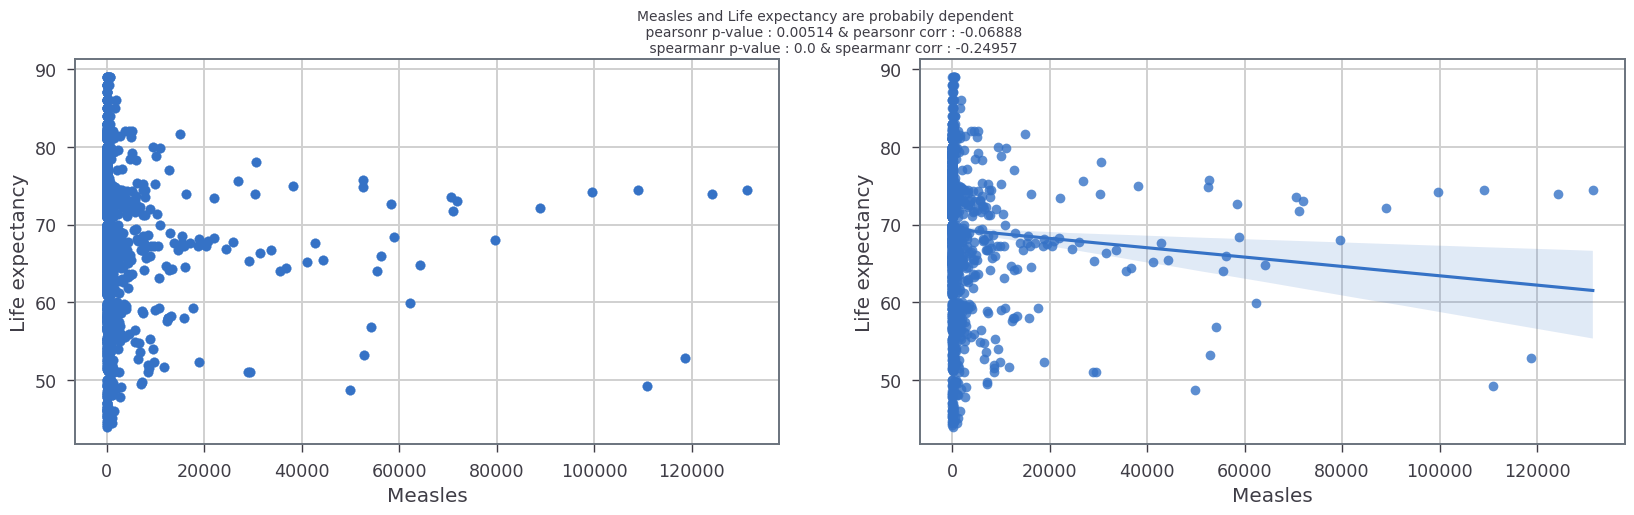

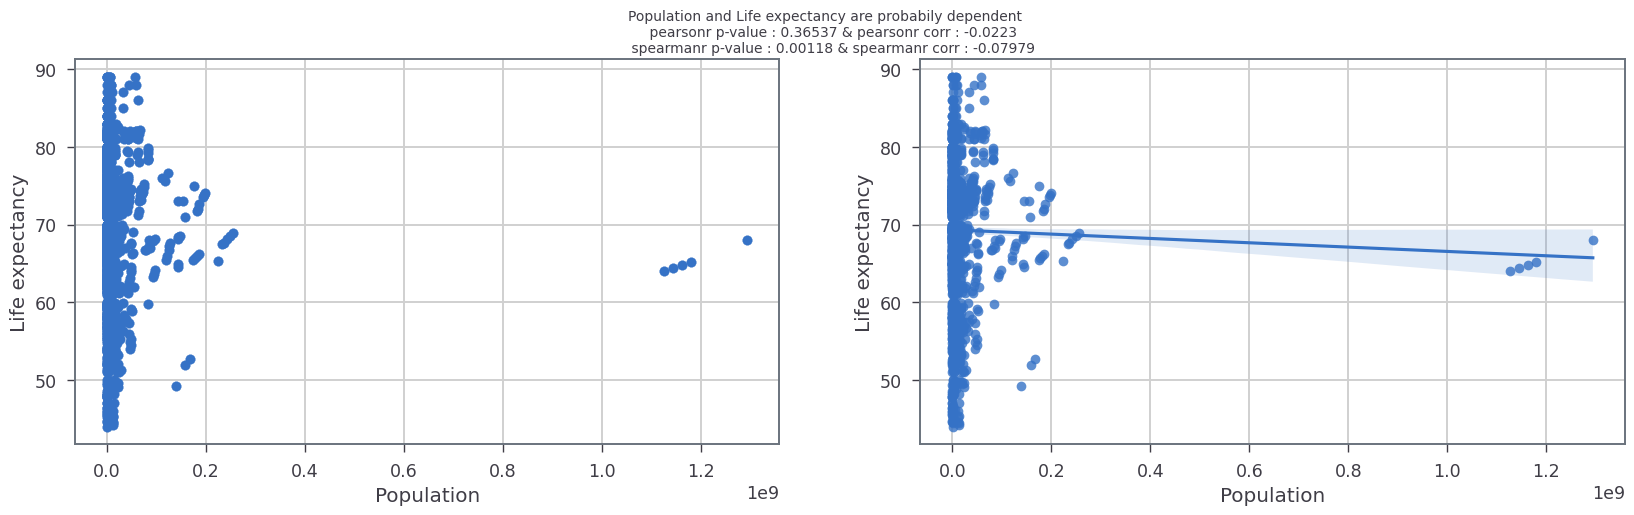

In [109]:
for feature in data[columns_to_keep].select_dtypes(exclude='object'):
  if feature != 'Life expectancy':
    pearsonrTestPlot(feature,'Life expectancy',data)

#### Observation

In [110]:
def getLifeExpectancyCountryPerYear(asc=True):
  Years_list = sorted(data['Year'].unique())
  # This part is to find the highest or lowest life expectany country of each year

  listOfLifeExpectancyValues = list()

  for year in Years_list:
    value = data.query(f"Year == {year}") \
    .groupby(['Country','Year']).agg({'Life expectancy':'min'}) \
    .reset_index() \
    .sort_values(by='Life expectancy',ascending=asc) \
    .iloc[0]

    listOfLifeExpectancyValues.append(value)
    lifeExpectancyCountryPerYear = pd.concat(listOfLifeExpectancyValues,axis=1).T

    # This part will plot the graph that shows the life expectancy

  fig, ax = plt.subplots(figsize=(20, 8))
  if asc:
    fig.suptitle('Countries with least life expectancy ("Life Expectancy Over Years")' )
  else:
    fig.suptitle('Countries with highest life expectancy ("Life Expectancy Over Years")')

  # Plot the life expectancy over years
  ax.plot(lifeExpectancyCountryPerYear['Year'],
            lifeExpectancyCountryPerYear['Life expectancy'],
            marker='o',
            linestyle='-')

  for i, txt in enumerate(lifeExpectancyCountryPerYear['Country']):
        plt.annotate(txt,
        (lifeExpectancyCountryPerYear['Year'].iloc[i],
          lifeExpectancyCountryPerYear['Life expectancy'].iloc[i]),
                    textcoords="offset points", xytext=(0,10),
                    ha='center',rotation=15)  # Add text annotation

  ax.set_xlabel('Year')
  ax.set_ylabel('Life Expectancy')
  ax.grid(True)

  plt.show()

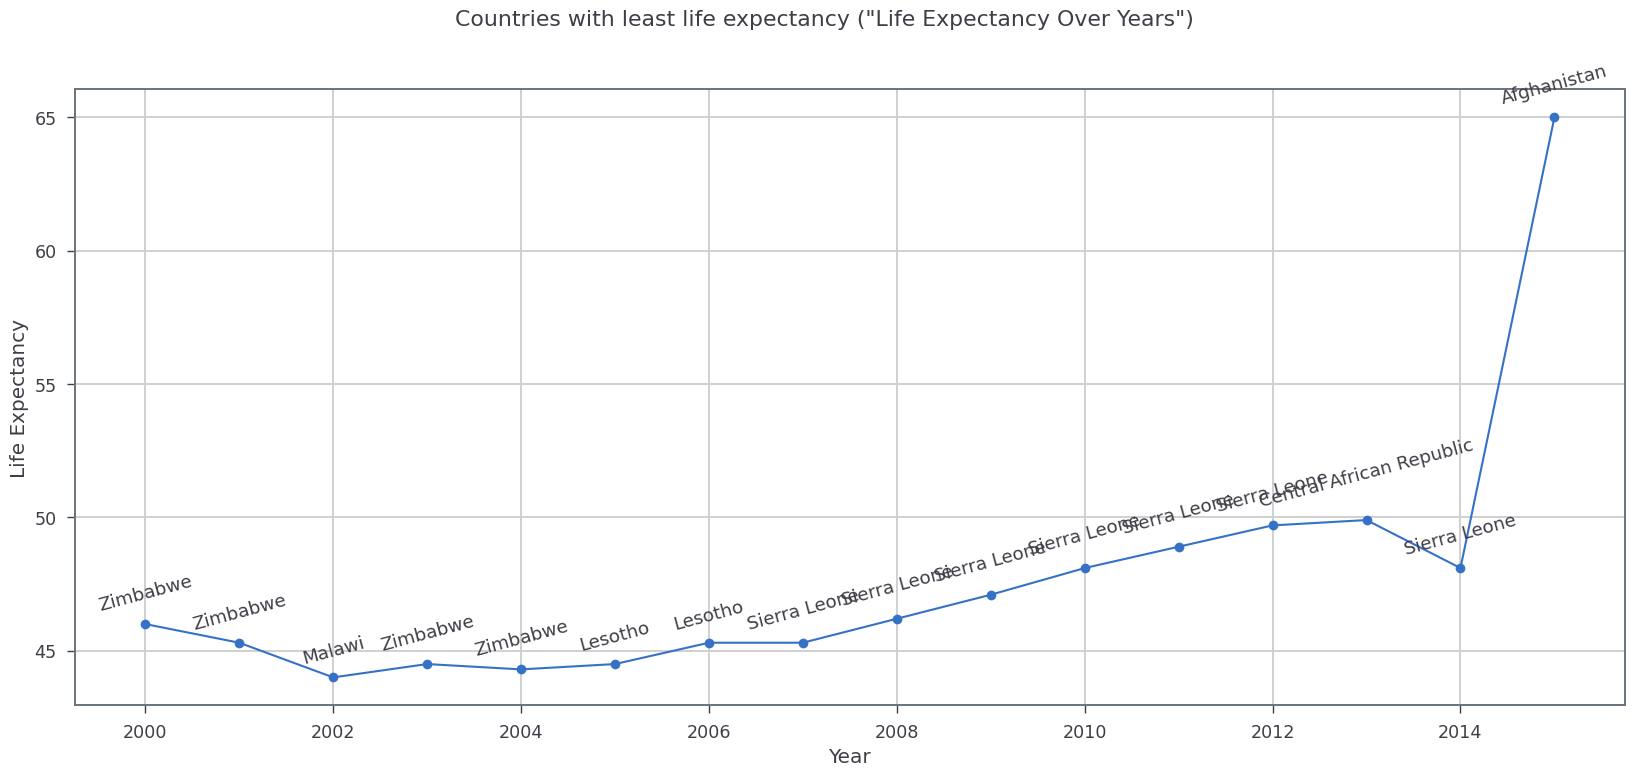

In [111]:
getLifeExpectancyCountryPerYear(True)

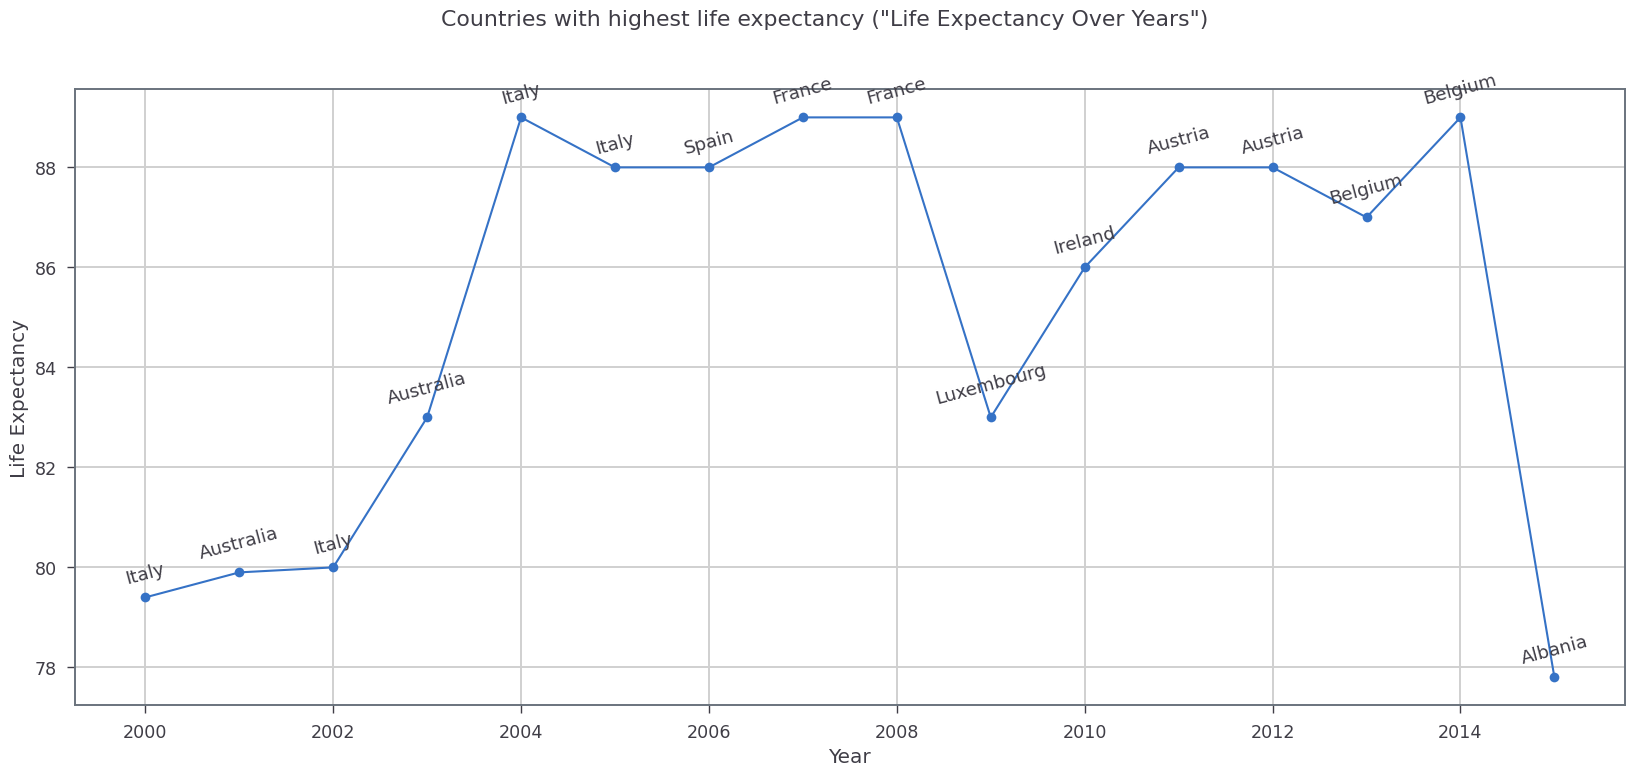

In [112]:
getLifeExpectancyCountryPerYear(False)

### Hypotheses for Anova

**Null Hypothesis (H0):** The null hypothesis states that there is no association between the categorical variables being studied. In other words, it assumes that the variables are independent.

**Alternative Hypothesis (H1):** The alternative hypothesis contradicts the null hypothesis and suggests that there is a statistically significant association between the categorical variables. It implies that the variables are dependent on each other.

For example, if you are conducting a chi-square test to analyze the relationship between two categorical variables such as gender and voting preference (e.g., Democrat, Republican, Independent), the null and alternative hypotheses would be:



In [113]:
def anova(feature):
  # Assuming 'categorical_feature' is your categorical feature and 'life_expectancy' is your target column
  groups = [data[data[feature] == group]['Life expectancy'] for group in data[feature].unique()]
  f_statistic, p_value = f_oneway(*groups)
  if p_value < 0.05:
      print(f"The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : {p_value}")
  else:
      print(f"The categorical feature is not significant in predicting life expectancy (p-value >= 0.05),P-value : {p_value}")

In [114]:
# def chi2_contingency_test(feature1):
#   # Assuming 'categorical_feature' is your categorical feature and 'life_expectancy' is your target column
#   crosstab = pd.crosstab(data[feature1], data['Life expectancy'])
#   chi2, p, dof, expected = chi2_contingency(crosstab)
#   if p < 0.05:
#       print(f"The categorical {feature} is significant in predicting life expectancy (p-value < 0.05)")
#   else:
#       print(f"The categorical {feature} is not significant in predicting life expectancy (p-value >= 0.05)")
#   num_obs = crosstab.sum().sum()
#   cramers_v = np.sqrt(chi2 / (num_obs * (min(crosstab.shape) - 1)))

#   print(f'cramers_v : {cramers_v}, P-value : {p}')


# Kruskal-Wallis Test

In [115]:
anova('Year')

The categorical feature is not significant in predicting life expectancy (p-value >= 0.05),P-value : 0.5527148285584812


In [116]:
anova('Country')

The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 0.0


In [117]:
anova('Status')

The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 3.922853419427268e-80


#### Observation
 - Status shows prominant significance in predicting Life expectancy
 - Where as Country(High Cardinality) and Year shows less significance in predecting life expectancy.

### Null Value Handling

In [118]:
data = pd.read_csv('/content/Life Expectancy Data.csv')
data.rename(columns={column:column.strip() for column in data.columns},inplace=True)

In [119]:
new_data = data[columns_to_keep]

In [120]:
null_values_Series =  pd.Series(new_data.isna().sum() / new_data.shape[0])

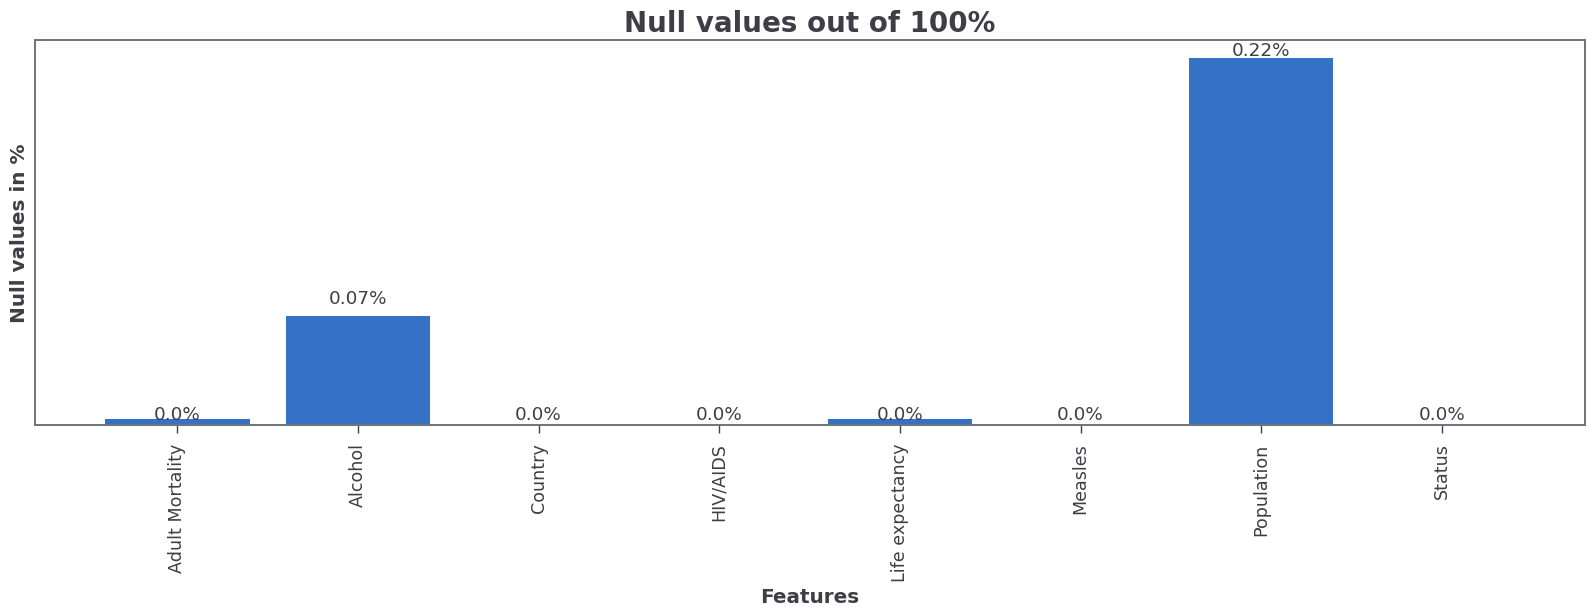

In [121]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(null_values_Series.index,null_values_Series.values)
for i, value in enumerate(null_values_Series.values):
    value = np.round(value,2)
    ax.text(i,value+0.001, f'{str(value)}%', ha='center', va='bottom')

ax.set_title('Null values out of 100%',fontweight='bold',fontsize=20)

ax.set_xlabel('Features',fontweight='bold')
ax.set_ylabel('Null values in %',fontweight='bold')

ax.set_xticks(null_values_Series.index)
ax.set_xticklabels(null_values_Series.index, rotation=90)

ax.set_yticks([])
ax.grid(False)
plt.show()


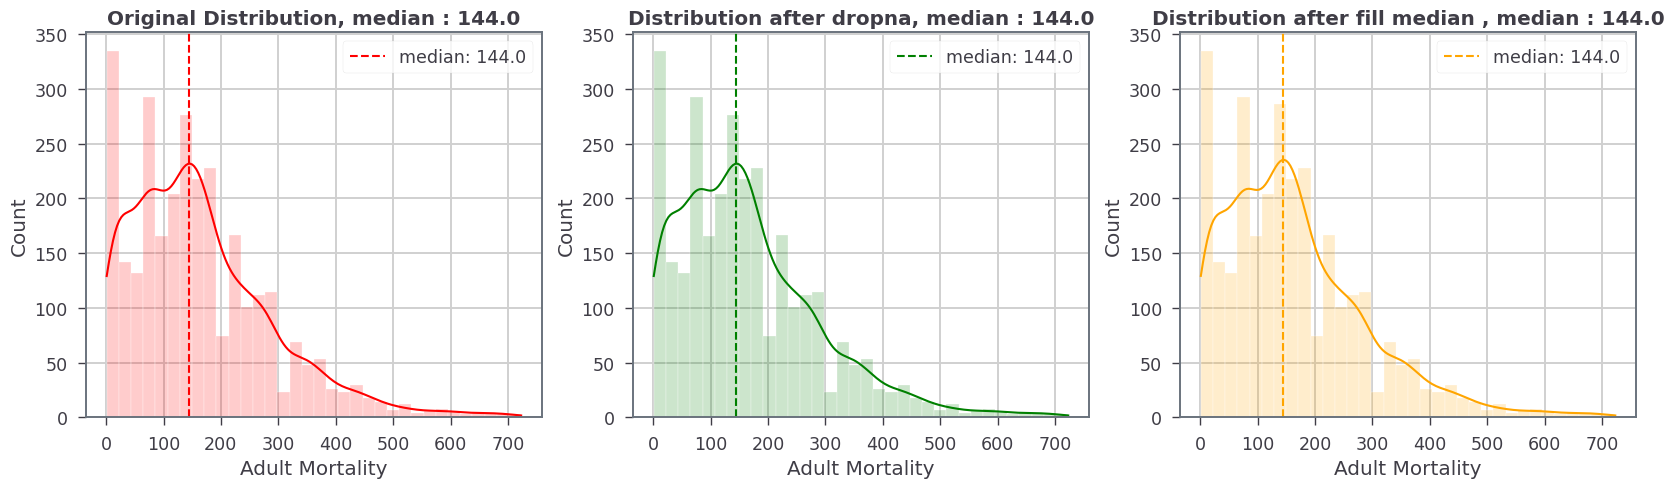

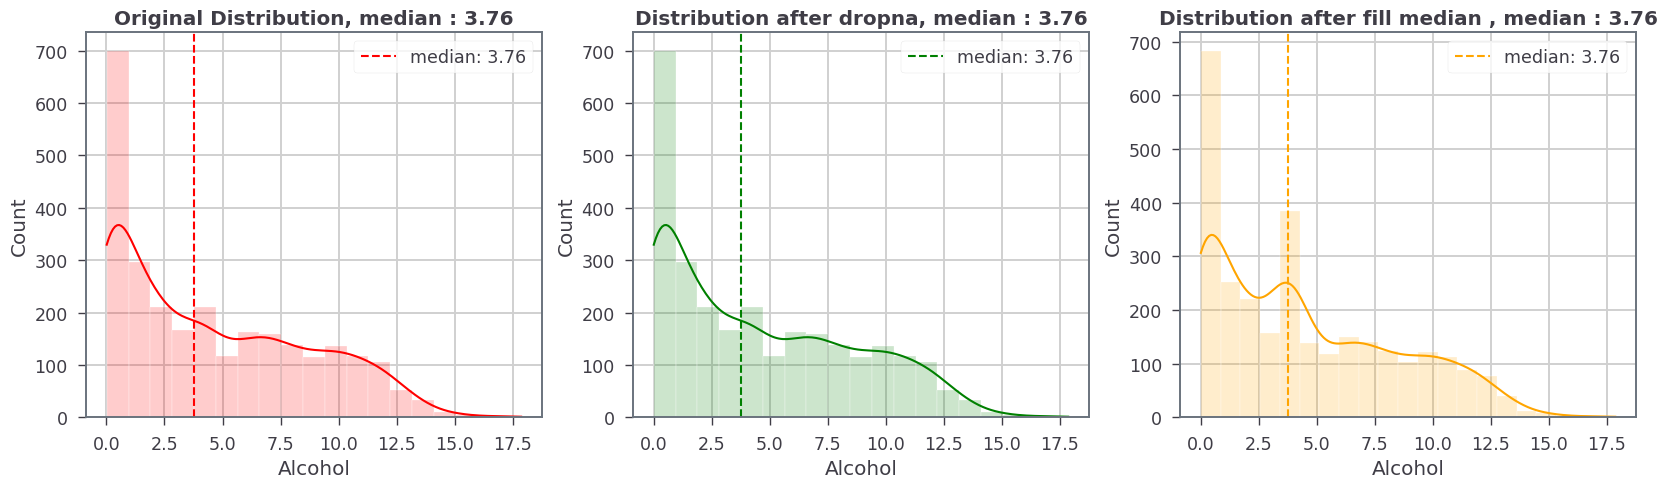

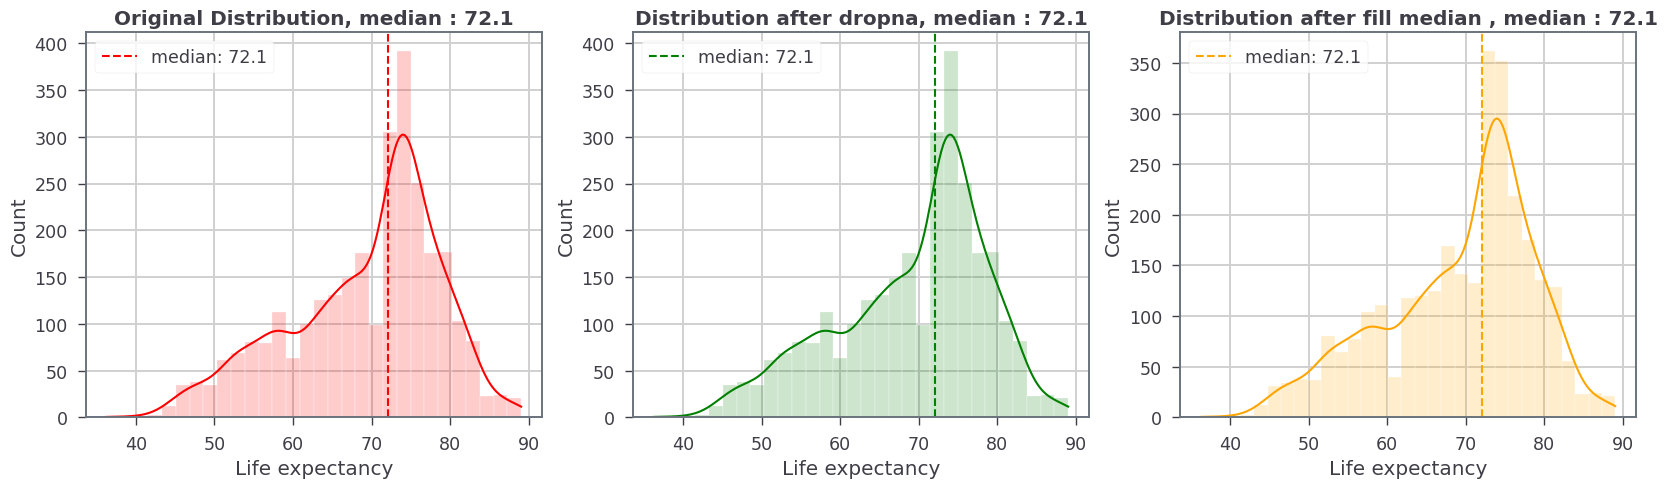

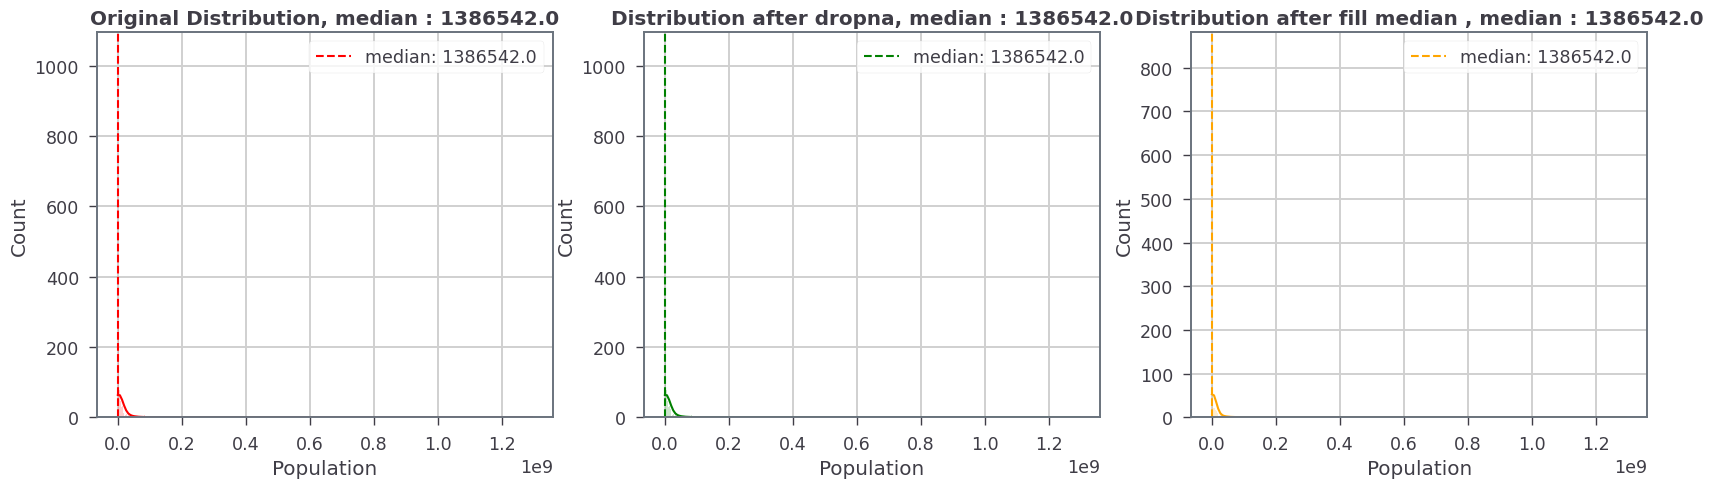

In [122]:
for key,value in null_values_Series.items():
  if value > 0:
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    median = np.round(new_data[key].median(),2)
    ax[0].set_title(f'Original Distribution, median : {median}',fontweight='bold')
    ax[0].axvline(median,color='red',ls='--',label=f'median: {median}')
    sns.histplot(new_data[key],kde=True,alpha=0.2,color='red',ax=ax[0])
    ax[0].legend()

    median = np.round(new_data[key].dropna().median(),2)
    ax[1].set_title(f'Distribution after dropna, median : {median}',fontweight='bold')
    ax[1].axvline(median,color='green',ls='--',label=f'median: {median}')
    sns.histplot(new_data[key].dropna(),kde=True,alpha=0.2,color='green',ax=ax[1])
    ax[1].legend()

    median = np.round(new_data[key].median(),2)
    ax[2].set_title(f'Distribution after fill median , median : {median}',fontweight='bold')
    ax[2].axvline(median,color='orange',ls='--',label=f'median: {median}')
    sns.histplot(new_data[key].fillna(median),kde=True,alpha=0.2,color='orange',ax=ax[2])
    ax[2].legend()

    plt.show()
    print('\n')

#### Observation
  - We can either drop or fill the null values with median
  - we saw above both techniques don't affect much on distribution
  - we can go with median imputation as the mull value is less than 0.5% of total observations

### Outliers

Adult Mortality  Alcohol  HIV/AIDS  Life expectancy  Measles  Population
0               263.0     0.01       0.1             65.0     1154  33736494.0
1               271.0     0.01       0.1             59.9      492    327582.0
2               268.0     0.01       0.1             59.9      430  31731688.0
3               272.0     0.01       0.1             59.5     2787   3696958.0
4               275.0     0.01       0.1             59.2     3013   2978599.0
...               ...      ...       ...              ...      ...         ...
2933            723.0     4.36      33.6             44.3       31  12777511.0
2934            715.0     4.06      36.7             44.5      998  12633897.0
2935             73.0     4.43      39.8             44.8      304    125525.0
2936            686.0     1.72      42.1             45.3      529  12366165.0
2937            665.0     1.68      43.5             46.0     1483  12222251.0

[2938 rows x 6 columns]

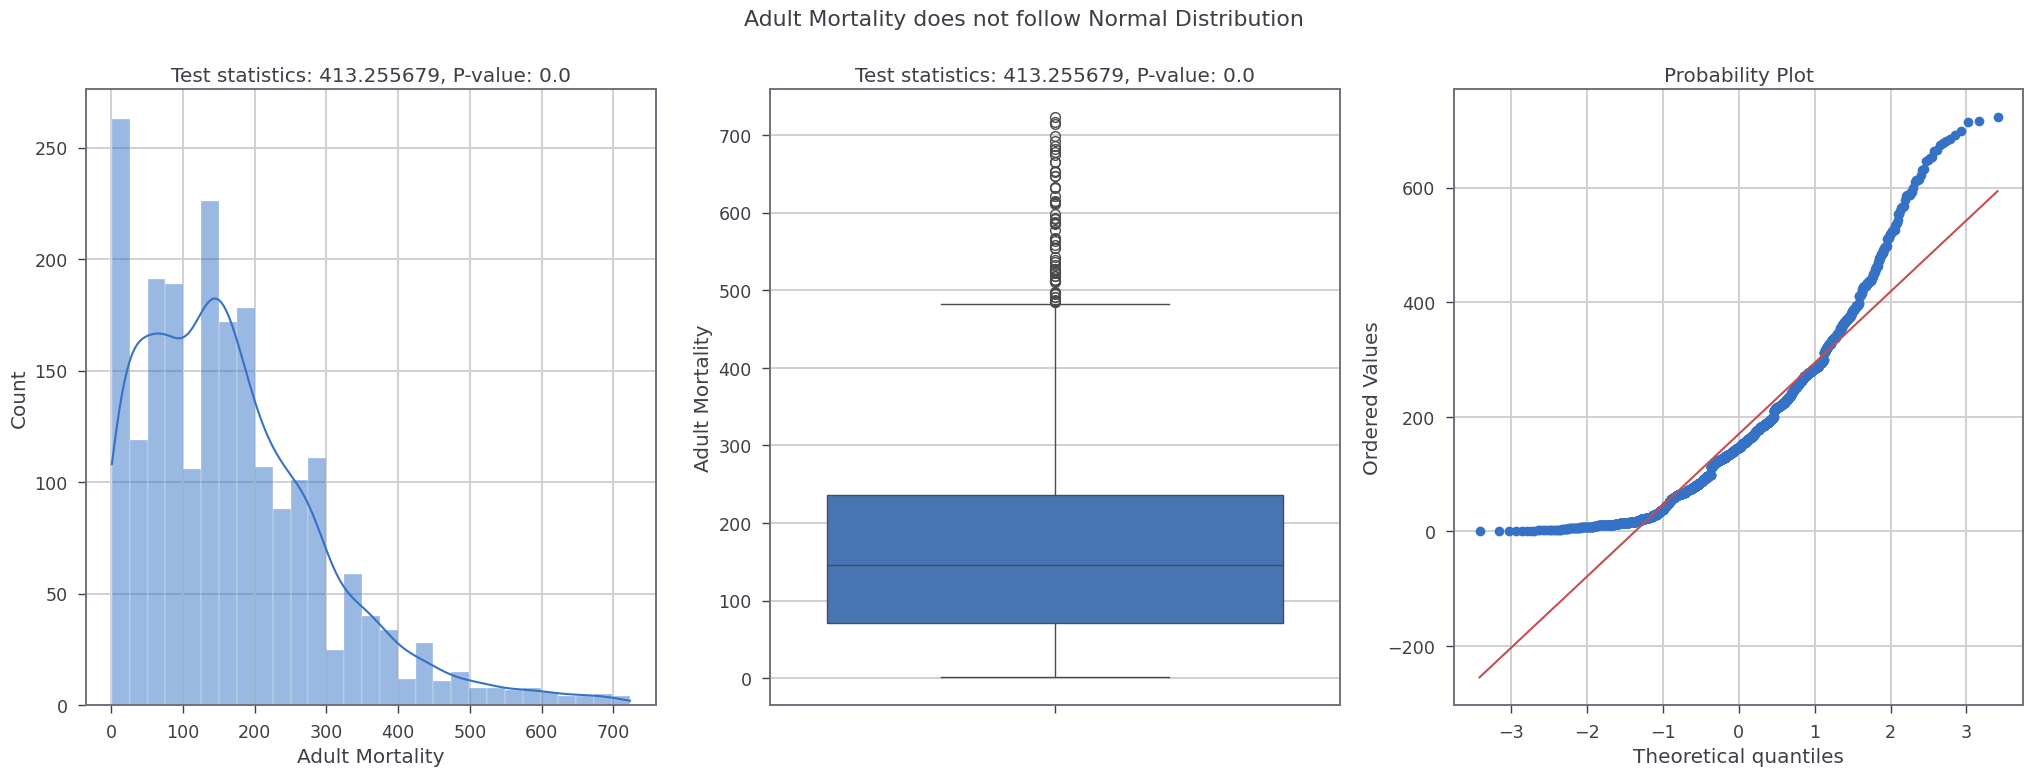

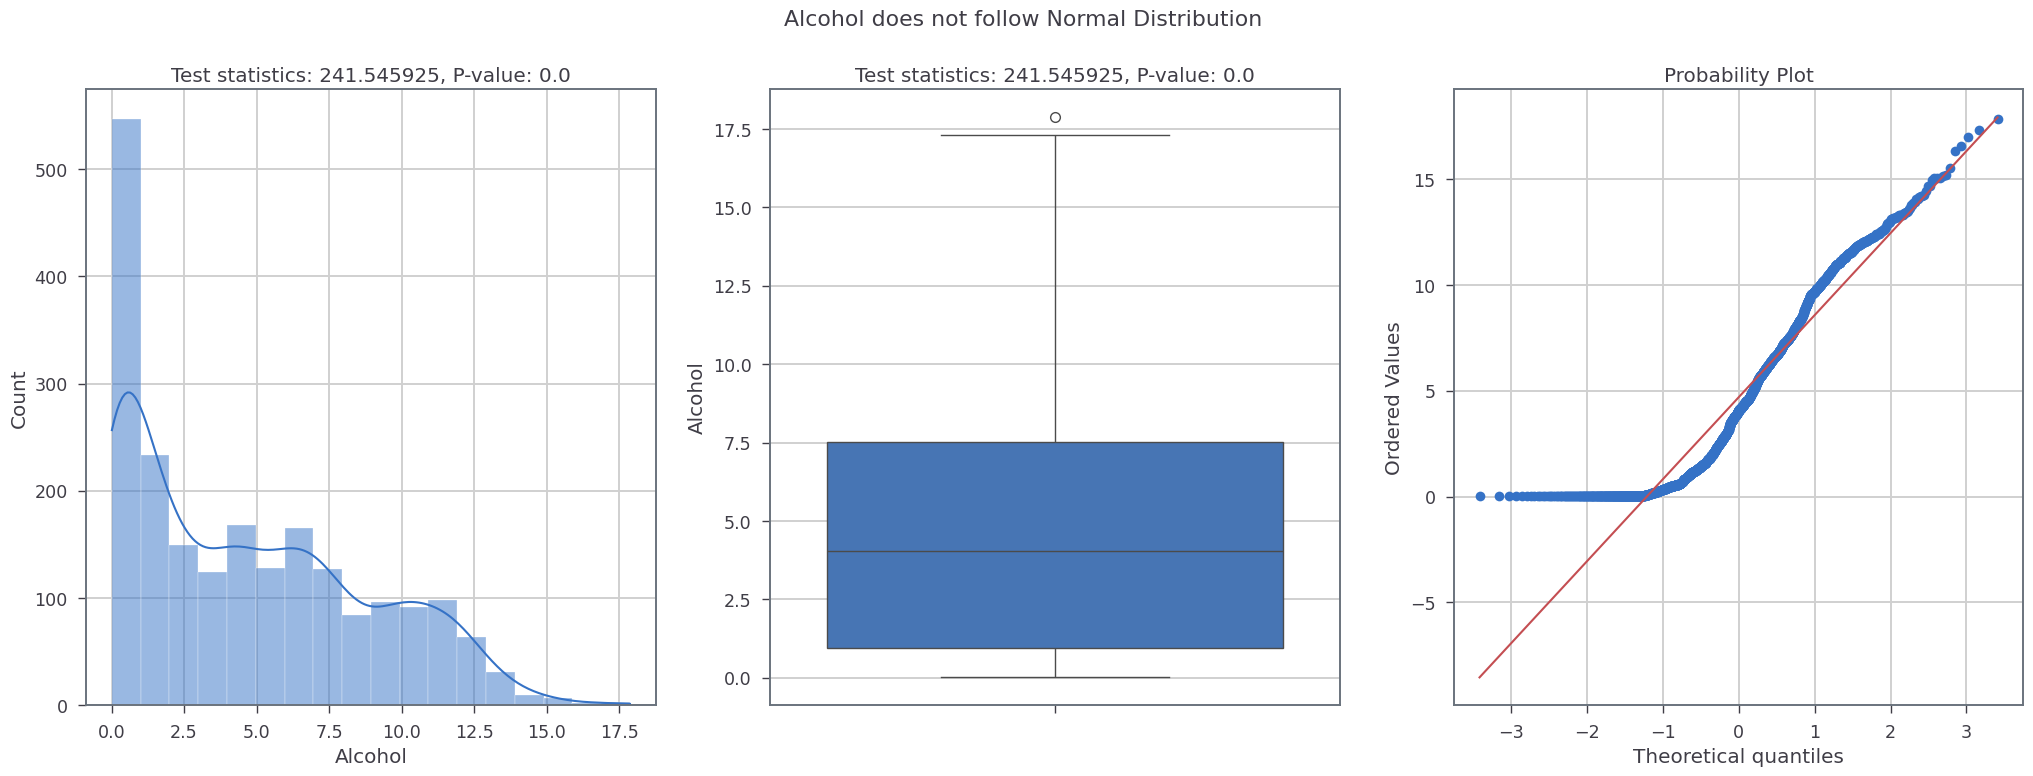

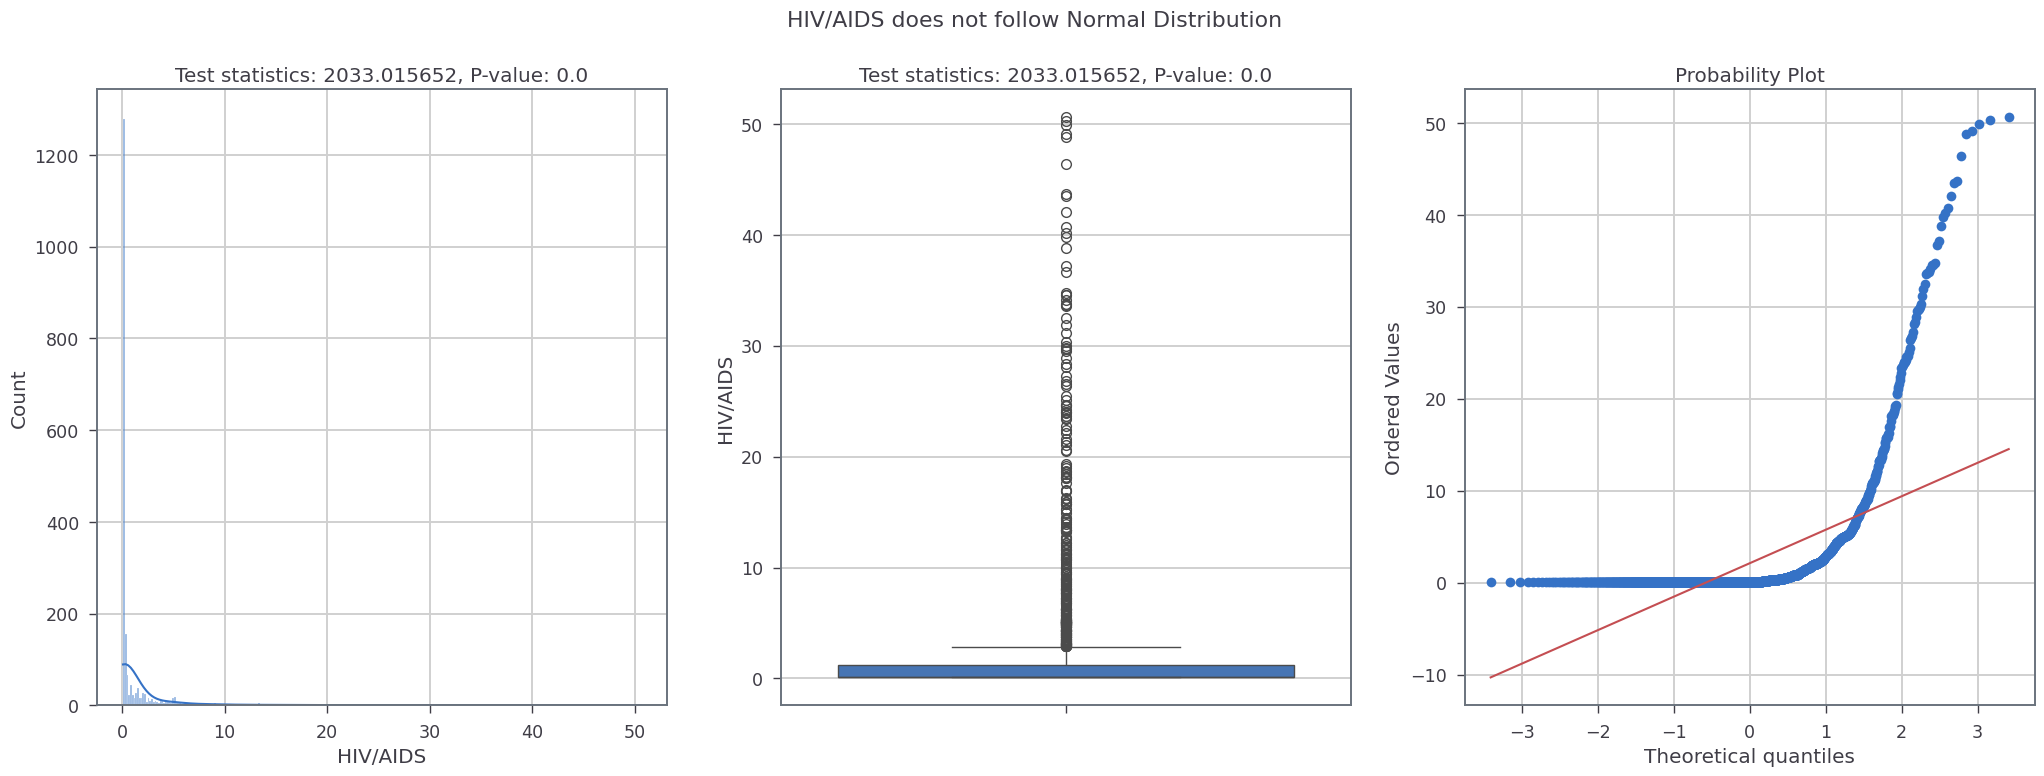

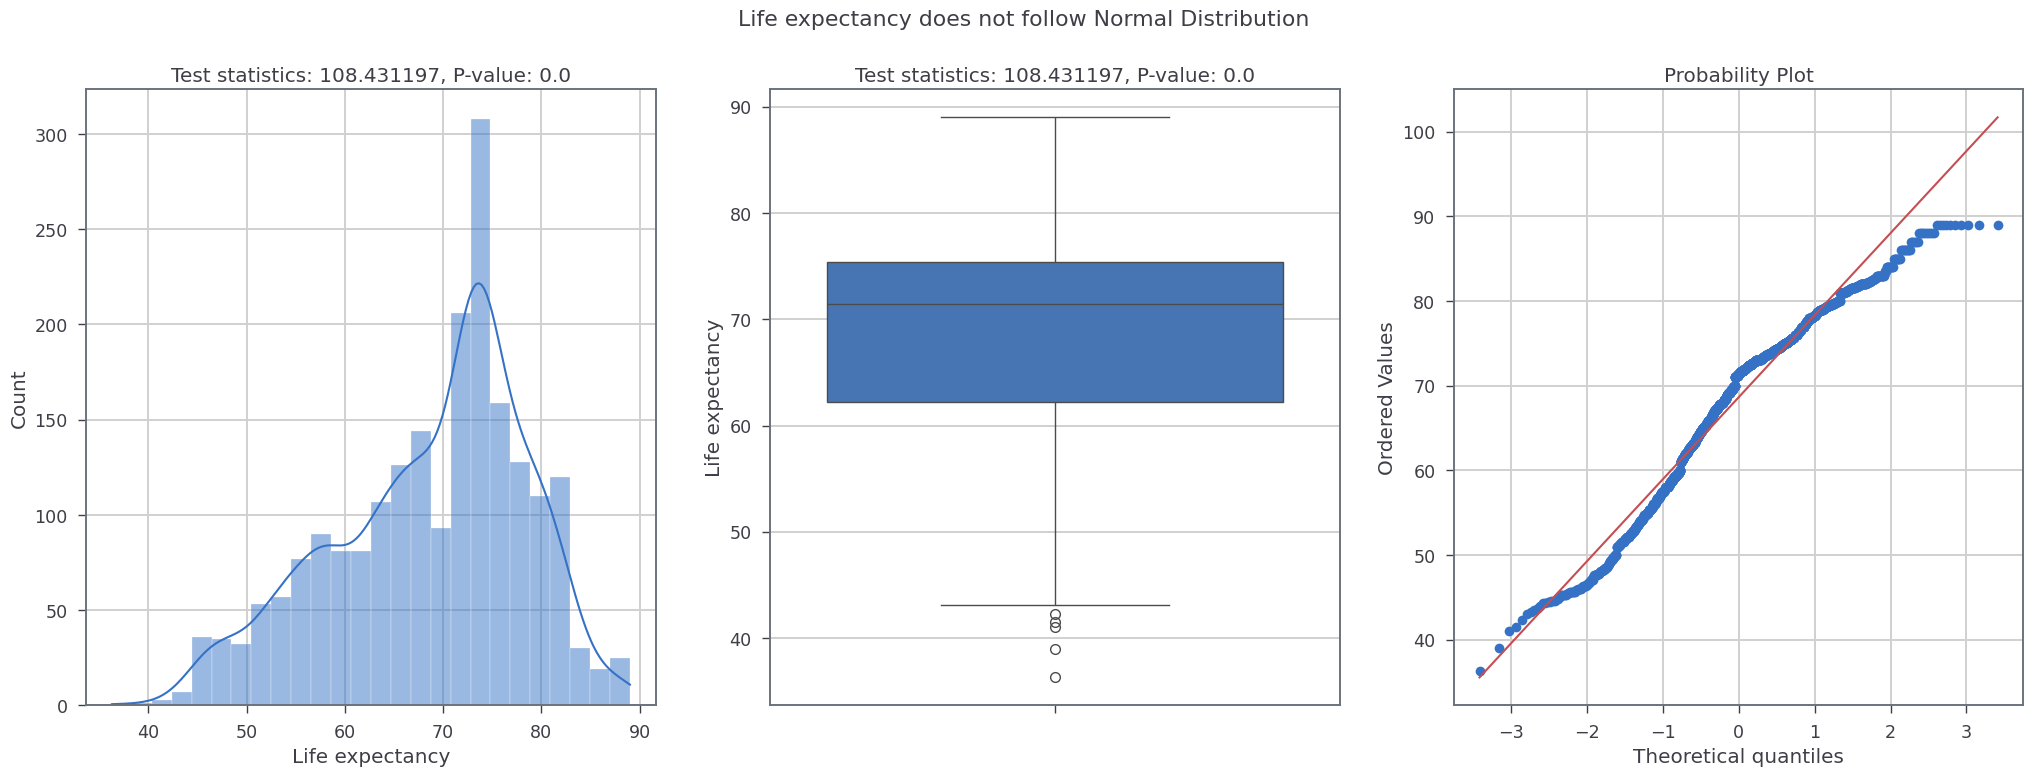

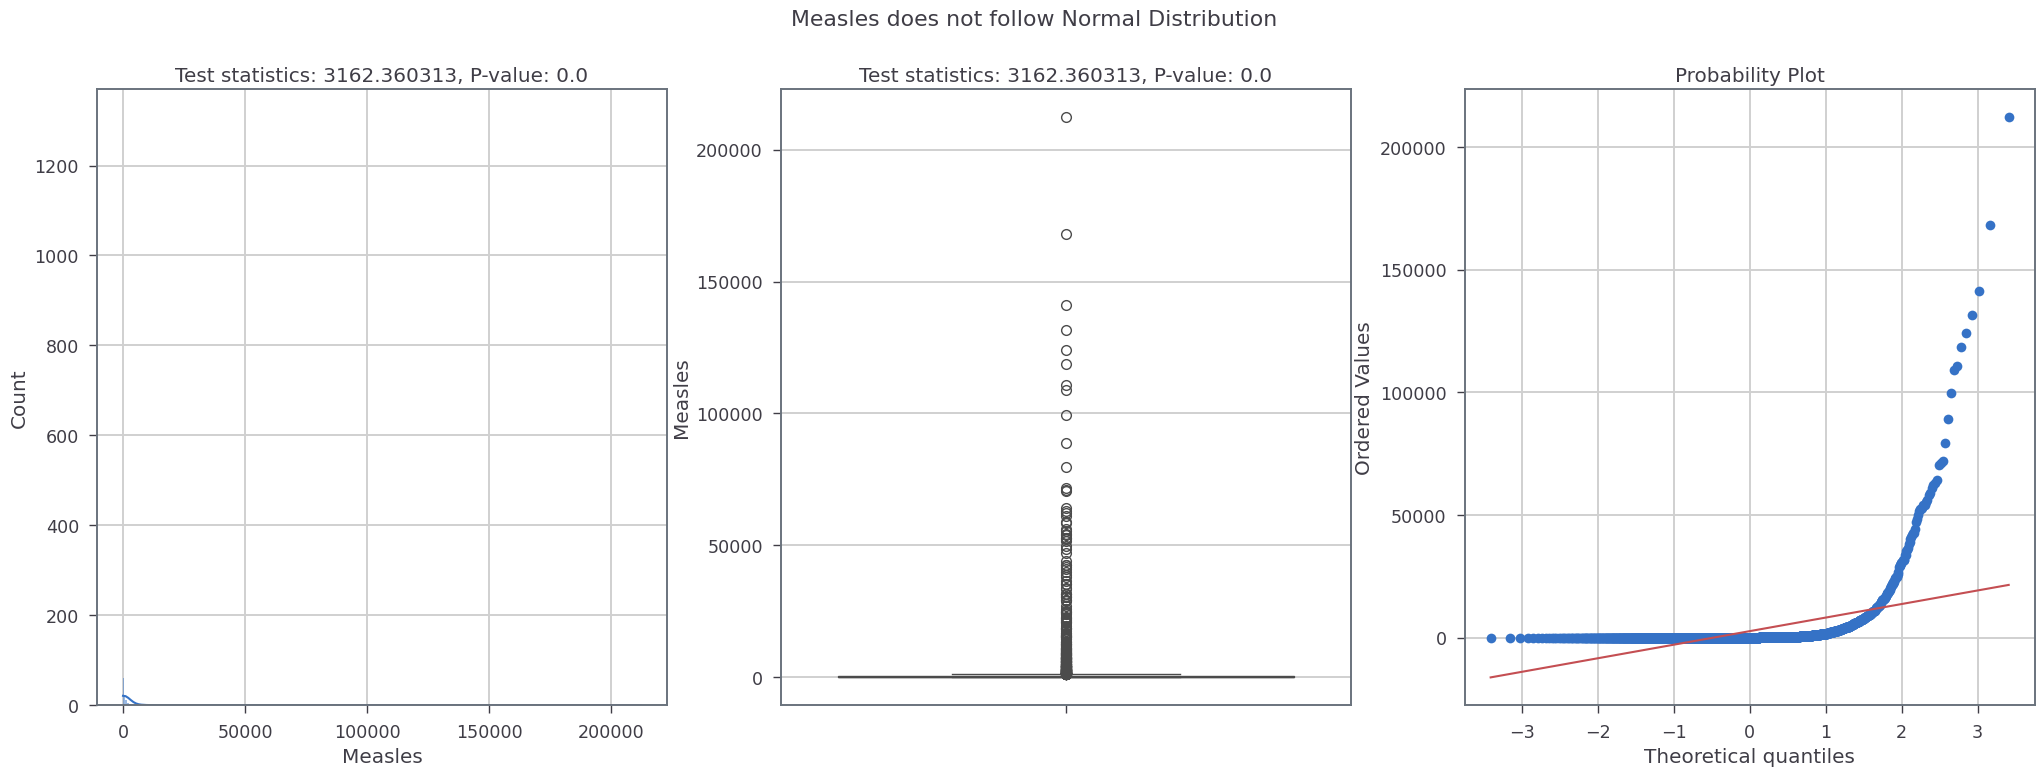

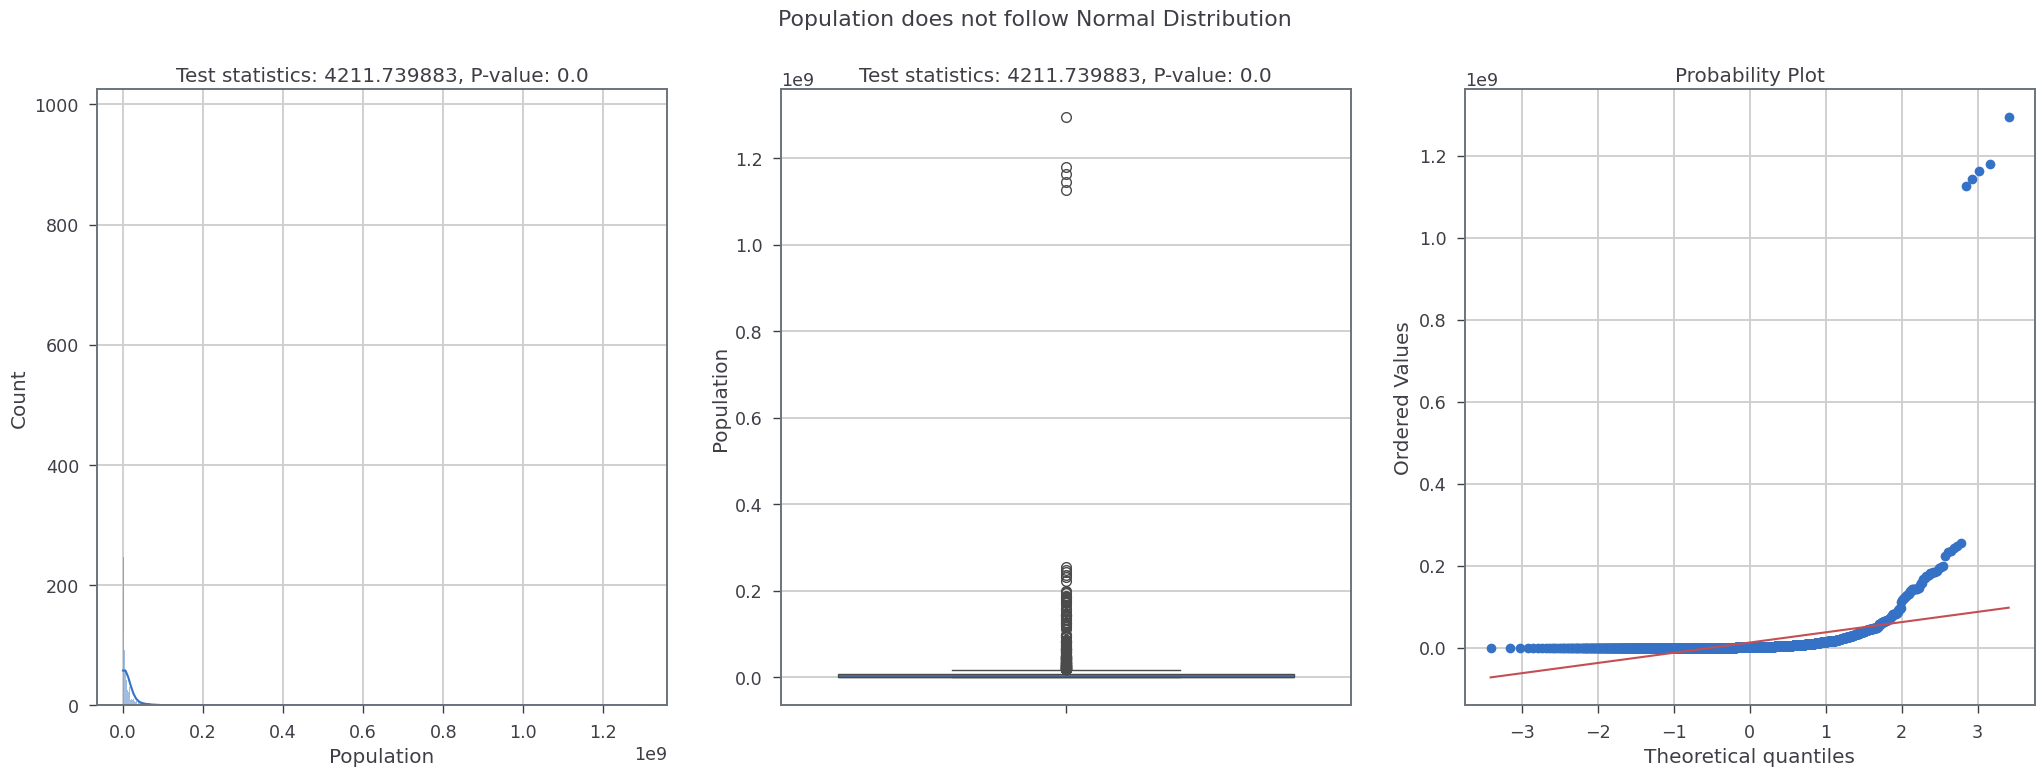

In [140]:
for feature in new_data.select_dtypes(exclude='object').columns:
  plotNormalityTest(feature,new_data.select_dtypes(exclude='object'))

In [ ]:
# plain of action
# 1) find the outliers above lower_bound and upper_bound
# 3) check if there is any insights we can get from these outliers (keep it / remove it ?)
# 2) check the sample size of outliers if they are less than 5% or not

228.0

In [143]:
new_data['Adult Mortality'].quantile(0.50)

144.0

In [142]:
new_data['Adult Mortality'].quantile(0.25)

74.0

In [157]:
def fiveNumberSummary(feature=None,data=None):
 data = pd.Series(sorted(data[feature]))
 third_quantile =  data.quantile(0.75)
 first_quantile =  data.quantile(0.25)
 IQR = third_quantile - first_quantile
 lower_bound = 1 - 1.5 * IQR
 upper_bound = 1 + 1.5 * IQR
 return lower_bound,upper_bound

In [160]:
lower_bound,upper_bound = fiveNumberSummary('Adult Mortality',new_data)

In [184]:
outlier_mortality_data = new_data.loc[(new_data['Adult Mortality'] > upper_bound)]

outlier_population_in_per = outlier_mortality_data.shape[0] /new_data.shape[0] * 100

print(f'{np.round(outlier_population_in_per,2)}% i.e {outlier_mortality_data.shape[0]} out of {new_data.shape[0]}  of data belong to outlier in Adult Mortality.')

23.93% i.e 703 out of 2938  of data belong to outlier in Adult Mortality.


In [188]:
outlier_mortality_data['Adult Mortality'].min(),outlier_mortality_data['Adult Mortality'].max()

(233.0, 723.0)

In [123]:
# numeric_features = data.select_dtypes(exclude=['object']).columns

# fig,ax = plt.subplots(5,4,figsize=(20,25))

# for col,ax in zip(numeric_features,ax.flatten()):
#   sns.histplot(data[col], bins=30, kde=True, ax=ax, edgecolor='black', linewidth=1)

#     # Title for each subplot
#   ax.set_title(col, fontsize=14, fontweight='bold')

#     # Set axis labels
#   ax.set_xlabel('')
#   ax.set_ylabel('')

#     # Add vertical line at mean if desired
#   mean_value = data[col].mean()
#   ax.axvline(mean_value, linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#   ax.legend()


